## Notebook for making plots for Snowball Earth Modern Continents
### This notebook plots figures 2 and 3 from the JGR submission
### originally from Greta Shum, edited by Abby Swann
#### using NCAR's NPL 2023a python environment
### Nov 2025

In [1]:
# Python comments are done with the # symbol

# I/O
# to make plots show up below each code cell:
%matplotlib inline
import math
import time
import warnings
from datetime import date, timedelta

# nice maps:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime
import cmocean as cm
import intake
import IPython.core.display as di  # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)
# Plotting
# basic plotting ability:
import matplotlib as mpl
import matplotlib.cbook as cbook
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import netCDF4 as nc
# numpy is basically matlab for python. It is math tools.
import numpy as np
import numpy.ma as ma
import numpy.matlib
import pandas as pd
import seaborn as sns
# xarray is for dealing with netcdf files.
import xarray as xr
from cartopy.util import add_cyclic_point
from cftime import DatetimeNoLeap
# from cmcrameri import cm # removed by alss
# we may not need this anymore...
from IPython.display import HTML, display
from matplotlib import cm
# from numpy import NaN, nanmean, nanmedian
import bokeh.palettes
from matplotlib import colors
import matplotlib.ticker as mticker
from matplotlib.ticker import MaxNLocator
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib.patches import ConnectionPatch
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

warnings.filterwarnings('ignore')


# used to use this for maps, have switched to cartopy now, but I'll leave it here in case we want to try it also
#from mpl_toolkits.basemap import Basemap, cm

In [2]:
import warnings

warnings.filterwarnings('ignore')

## Run information

In [3]:
# Make dictionary for run names

run_name = {}
run_name = {
    'moderncam4b_010p10p30a' : '10 ppm, 0.1/0.3 albedo',
    'moderncam4b_010p20p40a' : '10 ppm, 0.2/0.4 albedo',
    'moderncam4b_010p30p50a' : '10 ppm, 0.3/0.5 albedo',

    'moderncam4b_025p20p40a' : '25 ppm, 0.2/0.4 albedo',

    'moderncam4b_050p10p30a' : '50 ppm, 0.1/0.3 albedo',
    'moderncam4b_050p15p35a' : '50 ppm, 0.15/0.35 albedo',
    'moderncam4b_050p20p40a' : '50 ppm, 0.2/0.4 albedo',
    'moderncam4b_050p25p45a' : '50 ppm, 0.25/0.45 albedo',
    'moderncam4b_050p30p50a' : '50 ppm, 0.3/0.5 albedo',

    'moderncam4b_100p20p40a' : '100 ppm, 0.2/0.4 albedo',
    'moderncam4b_100p30p50a' : '100 ppm, 0.3/0.5 albedo',

    'moderncam4b_200p10p30a' : '200 ppm, 0.1/0.3 albedo',
    'moderncam4b_200p20p40a' : '200 ppm, 0.2/0.4 albedo',
    'moderncam4b_200p30p50a' : '200 ppm, 0.3/0.5 albedo',
}

In [4]:
# Make dictionary for run names

run_longname = {}
run_longname = {
    'moderncam4b_010p10p30a' : '10 ppm CO$_2$, 0.1/0.3 bare-land albedo',
    'moderncam4b_010p20p40a' : '10 ppm CO$_2$, 0.2/0.4 bare-land albedo',
    'moderncam4b_010p30p50a' : '10 ppm CO$_2$, 0.3/0.5 bare-land albedo',

    'moderncam4b_025p20p40a' : '25 ppm CO$_2$, 0.2/0.4 bare-land albedo',

    'moderncam4b_050p10p30a' : '50 ppm CO$_2$, 0.1/0.3 bare-land albedo',
    'moderncam4b_050p15p35a' : '50 ppm CO$_2$, 0.15/0.35 bare-land albedo',
    'moderncam4b_050p20p40a' : '50 ppm CO$_2$, 0.2/0.4 bare-land albedo',
    'moderncam4b_050p25p45a' : '50 ppm CO$_2$, 0.25/0.45 bare-land albedo',
    'moderncam4b_050p30p50a' : '50 ppm CO$_2$, 0.3/0.5 bare-land albedo',

    'moderncam4b_100p20p40a' : '100 ppm CO$_2$, 0.2/0.4 bare-land albedo',
    'moderncam4b_100p30p50a' : '100 ppm CO$_2$, 0.3/0.5 bare-land albedo',

    'moderncam4b_200p10p30a' : '200 ppm CO$_2$, 0.1/0.3 bare-land albedo',
    'moderncam4b_200p20p40a' : '200 ppm CO$_2$, 0.2/0.4 bare-land albedo',
    'moderncam4b_200p30p50a' : '200 ppm CO$_2$, 0.3/0.5 bare-land albedo',
}

In [5]:
co2_colorlist = ['#99d8c9', '#66c2a4', '#41ae76', '#238b45','#005824']
alb_colorlist = ['#fdbe85', '#fd8d3c', '#d94701']

alb_color_dict = {0.3 :'#FFE47E',
                  0.25: '#FFCB72',
                  0.2: '#FFA553',
                  0.15: '#E06D23',
                  0.1: '#D94701'}
co2_color_dict = {10: '#99d8c9',
                  25: '#66c2a4',
                  50: '#41ae76',
                  100: '#238b45',
                  200: '#005824'}



In [6]:
# Make dictionary for runlist

runlist = [
    'moderncam4b_010p10p30a',
    'moderncam4b_010p20p40a',
    'moderncam4b_010p30p50a',
    'moderncam4b_025p20p40a',
    'moderncam4b_050p10p30a',
    'moderncam4b_050p15p35a',
    'moderncam4b_050p20p40a',
    'moderncam4b_050p25p45a',
    'moderncam4b_050p30p50a',
    'moderncam4b_100p20p40a',
    # 'moderncam4b_100p30p50a',
    'moderncam4b_200p10p30a',
    'moderncam4b_200p20p40a',
    'moderncam4b_200p30p50a',
]

In [7]:
# Make dicitonary for albedo and co2 labels

label_alb = {
    0.3 : '0.3/0.5',
    0.2 : '0.2/0.4',
    0.1 : '0.1/0.2',
}
label_co2 = {
    10 : '10 ppm',
    50 : '50 ppm',
    200 : '200 ppm'
}

## Define functions and constants

In [8]:
# constants

mmperm = 1000
sperday = 86400
gperkg = 1000


In [9]:
def area_grid(lat, lon):
    """
    Calculate the area of each grid cell
    Area is in square meters
    
    Input
    -----------
    lat: vector of latitude in degrees
    lon: vector of longitude in degrees
    
    Output
    -----------
    area: grid-cell area in square-meters with dimensions, [lat,lon]
    
    Notes
    -----------
    Based on the function in
    https://github.com/chadagreene/CDT/blob/master/cdt/cdtarea.m
    """
    from numpy import cos, deg2rad, gradient, meshgrid
    from xarray import DataArray

    xlon, ylat = meshgrid(lon, lat)
    R = earth_radius(ylat)

    dlat = deg2rad(gradient(ylat, axis=0))
    dlon = deg2rad(gradient(xlon, axis=1))

    dy = dlat * R
    dx = dlon * R * cos(deg2rad(ylat))

    area = dy * dx

    xda = DataArray(
        area,
        dims=["lat", "lon"],
        coords={"lat": lat, "lon": lon},
        attrs={
            "long_name": "area_per_pixel",
            "description": "area per pixel",
            "units": "m^2",
        },
    )
    return xda

In [10]:
def earth_radius(lat):
    '''
    calculate radius of Earth assuming oblate spheroid
    defined by WGS84
    
    Input
    ---------
    lat: vector or latitudes in degrees  
    
    Output
    ----------
    r: vector of radius in meters
    
    Notes
    -----------
    WGS84: https://earth-info.nga.mil/GandG/publications/tr8350.2/tr8350.2-a/Chapter%203.pdf
    '''
    from numpy import cos, deg2rad, sin

    # define oblate spheroid from WGS84
    a = 6378137
    b = 6356752.3142
    e2 = 1 - (b**2/a**2)
    
    # convert from geodecic to geocentric
    # see equation 3-110 in WGS84
    lat = deg2rad(lat)
    lat_gc = np.arctan( (1-e2)*np.tan(lat) )

    # radius equation
    # see equation 3-107 in WGS84
    r = (
        (a * (1 - e2)**0.5) 
         / (1 - (e2 * np.cos(lat_gc)**2))**0.5 
        )

    return r

In [11]:
def NEflux(ds_in,ds_out,area_grid):
    
    if len(np.shape(ds_in))>2:
        try:
            ntime = len(ds_in['time'])
        
        except:
            try:
                ntime = len(ds_in['month'])
            
            except:
                ntime=len(ds_in['year'])
    else:
        ntime = 1
    
    # then we have a time dimension... otherwise, no time... 


    lat = ds_in['lat']
    lon = ds_in['lon']

    Rtoa = ((ds_in - ds_out)*area_grid).values

    # create empty flux matrix to fill in
    flux = np.zeros([ntime,np.shape(lat)[0], np.shape(lon)[0]])

    # spaces between lats and lons
    dlat = np.array(np.diff(lat))
    dlat = np.append(dlat, dlat[-1])
    dlon = np.array(np.diff(lon))
    dlon = np.append(dlon, dlon[-1])


    # Loop over latitudes and sum energy
    for k in range(np.shape(lat)[0]):
        # sum energy of southern lats up to that lat
        for r in range(k):
            flux[:,k, :] = flux[:,k, :] + Rtoa[:,r, :]

    # calculate how much we overshot zero at the north pole
    imbal = flux[:,-1, :]
    imbal_mat = imbal[:,None,:] * np.ones([ntime, np.shape(lat)[0],np.shape(lon)[0],]) / np.size(lat)


    # modify Rtoa to account for discrete step sizes & overshoot
    Rtoa_mod = Rtoa - imbal_mat

    # re-calculate flux
    flux_mod = np.zeros([ntime,np.shape(lat)[0], np.shape(lon)[0]])
    for k in range(np.shape(lat)[0]):
        for r in range(k):
            flux_mod[:,k, :] = flux_mod[:,k, :] + Rtoa_mod[:,r, :]


    ds_NEflux = ds_in.copy()
    ds_NEflux = ds_NEflux.rename('NEflux')
    ds_NEflux = ds_NEflux.assign_attrs({'long_name':'Northwards Energy Transport'})
    ds_NEflux = ds_NEflux.assign_attrs({'units':'W'})
    ds_NEflux.values = flux_mod
    
    ds_NEflux_zonal = ds_NEflux.sum('lon')
        
    return ds_NEflux_zonal

In [12]:
#  Version 1.1
#   Made days_per_year more accurate, for consistent insolation calculations with orbital.py
#   also set the solar constant S0 to match the Trenberth et al. data we've been using in class
#  Brian Rose
#   March 10 2014
#  A collection of constants and function definitions to handle common
#  thermodynamic calculations for the atmosphere etc

import numpy as np

#  Define a bunch of useful physical and thermodynamic constants

a = 6.373E6      #  Radius of Earth, in m
Lhvap = 2.5E6    #  Latent heat of vaporization, in J / kg
cp = 1004.        #  specific heat at constant pressure for dry air, in J / kg / K
Rd = 287.         #  gas constant for dry air, in J / kg / K
kappa = Rd / cp
Rv = 461.5       #  gas constant for water vapor, in J / kg / K
cpv = 1875.       # specific heat at constant pressure for water vapor, in J / kg / K
Omega = 2 * np.pi / 24. /3600.  # Earth's rotation rate, in s**(-1)
g = 9.8          #  gravitational acceleration, in m / s**2
sigma = 5.67E-8  #  Stefan-Boltzmann constant for blackbody radiation, W / m**2 / K**4
S0 = 1365.2       #  solar constant, W / m**2
ps = 1000.       #  approximate surface pressure, mb or hPa

rho_w = 1000.    #  density of water, kg / m**3
cw = 4181.3      #  specific heat of liquid water, J / kg / K

tempCtoK = 273.15   # 0degC in kelvin
mb_to_Pa = 100.  # conversion factor from mb to Pa

#  Some useful general-purpose functions for atmosphere and ocean science


def PotentialTemperature(T,p):
    """Compute potential temperature for an air parcel.
    
    Input:  T is temperature in Kelvin
            p is pressure in mb or hPa
    Output: potential temperature in Kelvin."""
    
    inputCheck(T,p)
    theta = T*(ps/p)**kappa
    return theta

def TfromTHETA(theta,p):
    """Convert potential temperature to in-situ temperature.
    
    Input:  theta is potential temperature in Kelvin
            p is pressure in mb or hPa
    Output: absolute temperature in Kelvin."""
    
    inputCheck(theta,p)
    T = theta/((ps/p)**kappa)
    return T


def ClausiusClapeyron(T):
    """Compute saturation vapor pressure as function of temperature T.
    
    Input: T is temperature in Kelvin
    Output: saturation vapor pressure in mb or hPa
    
    Formula from Rogers and Yau "A Short Course in Cloud Physics" (Pergammon Press), p. 16
    claimed to be accurate to within 0.1% between -30degC and 35 degC
    Based on the paper by Bolton (1980, Monthly Weather Review)."""

    Tcel = T - tempCtoK
    es = 6.112 * np.exp(17.67*Tcel/(Tcel+243.5))
    return es
#  End of function ClausiusClapeyron(T)

def qsat(T,p):
    """Compute saturation specific humidity as function of temperature and pressure.

    Input:  T is temperature in Kelvin
            p is pressure in hPa or mb
    Output: saturation specific humidity (dimensionless)."""
    
    inputCheck(T,p)
    eps = Rd/Rv
    es = ClausiusClapeyron(T)
    q = eps * es / (p - (1 - eps) * es )
    return q
#  End of function qsat(T,p)



# This routine just checks for correct dimensions in the input arrays T and p
def inputCheck(T,p):
    if ( np.shape(T) != np.shape(p) ) and np.size(T)>1 and np.size(p)>1:
        raise ValueError('Inputs arrays must have same dimensions, or be scalar.')
#  End of function inputCheck(T,p)

In [13]:
##' Convert specific humidity to relative humidity
##'
##' converting specific humidity into relative humidity
##' NCEP surface flux data does not have RH
##' from Bolton 1980 The computation of Equivalent Potential Temperature 
##' \url{http://www.eol.ucar.edu/projects/ceop/dm/documents/refdata_report/eqns.html}
##' @title qair2rh
##' @param qair specific humidity, dimensionless (e.g. kg/kg) ratio of water mass / total air mass
##' @param temp degrees C
##' @param press pressure in mb
##' @return rh relative humidity, ratio of actual water mixing ratio to saturation mixing ratio
##' @export
##' @author David LeBauer
def qair2rh(qair, temp, press):
    temp = temp -273.15
    es =  6.112 * np.exp((17.67 * temp)/(temp + 243.5))
    e = qair * press / (0.378 * qair + 0.622)
    rh = e / es
    # rh[rh > 1] <- 1
    # rh[rh < 0] <- 0
    return rh


In [14]:
# version that uses Lv/Rv in estarT

def PETcalc_Lv(run, latent):
    print('calculating PET')
#     get necessary variables
    SHFLX = ds_atm[run]['SHFLX'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    LHFLX = ds_atm[run]['LHFLX'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    # T = ds_atm[run]['T'][:,-1,:,:].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    TREFHT = ds_atm[run]['TREFHT'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    QREFHT = ds_atm[run]['QREFHT'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    PS = ds_atm[run]['PS'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')

    RELHUM = ds_atm[run]['RELHUM'][:,-1,:,:].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    # RELHUM = (ds_atm[run]['QREFHT']/(qsat(ds_atm[run]['TREFHT'],ds_atm[run]['PS']*.01)*.01)).groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    # UU = ds_atm[run]['UU'][:,-1,:,:].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    # VV = ds_atm[run]['VV'][:,-1,:,:].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    U10 = ds_atm[run]['U10'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    
    # %--convert GCM units
    
    RH = RELHUM/100  # convert from percent to fraction
    # T = T - 273.15 # convert from K to C
    TREFHT = TREFHT - 273.15 # convert from K to C
    T = TREFHT

    LH = LHFLX # Wm-2 positive out of the land
    SH = SHFLX # Wm-2 positive out of the land
    ps = PS # units Pa
    # Umag = np.sqrt(UU + VV) # m/s, where UU = zonal mean squared, VV = meridional mean wind squared
    Umag = U10 # m/s
    
    # %------- Set constants
    # Lv = 2.45e6  # J/kg
    # Ls = 2.838e6 # J/kg
    # Lv = 2260e3 # J/kg
    # Ls = 2838e3 # J/kg
    latent = latent * 1e3 #convert from J/g to J/kg
        
    ######################### CHOOSE YOUR LATENT HEAT #########################
    # latent  = Ls
    rs =  0 # 40 # s/m ; matches Cook et al 2014, set to zero for ocean. Ra still exists for ocean. Drag coefficient does have roughness of the surface of the ocean (rs = 0, with no plants, ra depends on surface roughness). 
    epsilon = 0.622 # unitless
    cp = 4182 # J/kg/K
    R = 287 # J/kg/K
    Rv = 461 # J/kg/K

    # drag constant coeff
    k = 0.41 # unitless
    h = 0.000001 # was 0.5 # m Is 0.5 the standard for alflafa
#     need to make the conductance higher, you could eliminate the rs term from Jack's paper, and set rs to zero
    zom = 0.123*h # m
    zoh = 0.0123*h # m
    zh = 2 # m (by definition from CAM)
    zw = 10 # m
    d = 0 # m Could be 0
    ps = PS

    rhoa = PS/(R*(T + 273.15)) # kg/m3 , T should be in celsius (convert above)
    gamma = (ps*cp)/(epsilon*latent) #  Pa/K or Pa/C
    CH = k**2/(np.log((zw-d)/zom)*np.log((zh-d)/zoh)) # unitless !!! (basiclaly monin-obukhov) this comes from eqn A1 in Scheff's paper. 
    
    # estarT = 610.8*np.exp(17.27*T/(T+237.3)) # T in celsius, final unit in Pa
    # estarT = 610.8*np.exp((latent/Rv)*(1/273.15 - 1/(T + 273.15))) # T in celsius, final unit Pa
    estarT = 611.3*np.exp((latent/Rv)*((1/273.15) - (1/(T + 273.15)))) # T in celsius, final unit Pa

    DELTA = latent*estarT/Rv/((T+273.15)*(T+273.15)) # Pa/K, T should be in celsius
    # DELTA = (17.27 * 237.3*estarT)/(T + 237.3)**2

    # mmH2OperPa = 9.80665 # mmH2O/Pa
    sperday=60*60*24

    # PET = DELTA • (SH + LH) + ρa • cp • estar(Ta)  • (1 - RH) • CH * umag     1
    #       –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– • ––––
    #         DELTA + gamma • (1 + rs • CH • umag)                              Lv

    PET = sperday * (1/latent) * (DELTA * (SH + LH) + (rhoa * cp * estarT) * (1-RH) * (CH*Umag)) / (DELTA + gamma*(1+rs*CH*Umag)) # orig was * mmH2O/Pa, have removed
    # PET = sperday * (1/latent) * (DELTA * (SH + LH)) / (DELTA + gamma*(1+rs*CH*Umag)) # rad only

    return PET

In [15]:
# version that uses compounded constants in estarT:

def PETcalc(run, latent):
    print('calculating PET')
#     get necessary variables
    SHFLX = ds_atm[run]['SHFLX'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    LHFLX = ds_atm[run]['LHFLX'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    # T = ds_atm[run]['T'][:,-1,:,:].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    TREFHT = ds_atm[run]['TREFHT'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    QREFHT = ds_atm[run]['QREFHT'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    PS = ds_atm[run]['PS'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')

    RELHUM = ds_atm[run]['RELHUM'][:,-1,:,:].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    # RELHUM = (ds_atm[run]['QREFHT']/(qsat(ds_atm[run]['TREFHT'],ds_atm[run]['PS']*.01)*.01)).groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    # UU = ds_atm[run]['UU'][:,-1,:,:].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    # VV = ds_atm[run]['VV'][:,-1,:,:].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    U10 = ds_atm[run]['U10'].groupby(ds_atm[run]['LANDFRAC'].time.dt.year).mean('time')
    
    # %--convert GCM units
    
    RH = RELHUM/100  # convert from percent to fraction
    # T = T - 273.15 # convert from K to C
    T = TREFHT - 273.15 # convert from K to C

    LH = LHFLX # Wm-2 positive out of the land
    SH = SHFLX # Wm-2 positive out of the land
    ps = PS # units Pa
    # Umag = np.sqrt(UU + VV) # m/s, where UU = zonal mean squared, VV = meridional mean wind squared
    Umag = U10 # m/s
    
    # %------- Set constants
    # Lv = 2260e3 # J/kg
    # Ls = 2838e3 # J/kg
    latent = latent * 1e3 #convert from J/g to J/kg
        
    rs = 0 #40 # s/m ; matches Cook et al 2014, set to zero for ocean. Ra still exists for ocean. Drag coefficient does have roughness of the surface of the ocean (rs = 0, with no plants, ra depends on surface roughness). 
    epsilon = 0.622 # unitless
    cp = 4182 # J/kg/K
    R = 287 # J/kg/K
    Rv = 461 # J/kg/K

    # drag constant coeff
    k = 0.41 # unitless, von Karman constant
    h = .1# 0.05 # was 0.5 # m Is 0.5 the standard for alflafa
#     need to make the conductance higher, you could eliminate the rs term from Jack's paper, and set rs to zero
    zom =  0.123*h #.1 # m, momentum roughness length
    zoh = 0.0123*h #.01 #  # m, scalar roughness length
    zh = 2 # m (by definition from CAM)
    zw = 10 # m # height of the wind speed measurments
    d = 0 #0.01 # m Could be 0, zero-plane displacement
    ps = PS

    rhoa = PS/(R*(T + 273.15)) # kg/m3 , T should be in celsius (convert above)
    # rhoa = 1
    gamma = (ps*cp)/(epsilon*latent) #  Pa/K or Pa/C
    CH = k**2/(np.log((zw-d)/zom)*np.log((zh-d)/zoh)) # unitless !!! (basiclaly monin-obukhov) this comes from eqn A1 in Scheff's paper.
    
    estarT = 610.8*np.exp((17.27*T)/(T+237.3))  # T in celsius, final unit in Pa, Scheff 2014 eqn 6 
    # estarT = 610.8*np.exp((latent/Rv)*(1/273.15 - 1/(T + 273.15)))  # T in celsius, final unit Pa
    # estarT = 611.3*np.exp((latent/Rv)*((1/273.15) - (1/(T + 273.15))))  # T in celsius, final unit Pa

    # DELTA = latent*estarT/Rv/((T+273.15)*(T+273.15)) # Pa/K, T should be in celsius
    DELTA = (17.27 * 237.3*estarT)/(T + 237.3)**2  # Scheff 2014 Eqn 7

    mmH2OperPa = 9.80665 # mmH2O/Pa
    sperday=60*60*24
    kgperm3 = 1000 #kg/m3
    mmperm = 1000 #mm/m

    # PET = DELTA • (SH + LH) + ρa • cp • estar(Ta)  • (1 - RH) • CH * umag     1
    #       –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– • ––––
    #         DELTA + gamma • (1 + rs • CH • umag)                              Lv

    # PET = sperday * (1/latent) * (DELTA * (SH + LH) + (rhoa * cp * estarT) * (1-RH) * (CH*Umag)) / (DELTA + gamma*(1+rs*CH*Umag))# * mmH2OperPa#, have removed
    # PET = sperday * (1/latent) * (DELTA * (SH + LH)) / (DELTA + gamma*(1+rs*CH*Umag)) # rad only

    PET = ((DELTA * (SH + LH)) + ((rhoa * cp * estarT) * (1-RH) * (CH*Umag))) / (DELTA + gamma*(1 + rs * CH * Umag)) # W/m2
    PET = PET * (1/latent) * (1/kgperm3) * mmperm * sperday #* mmH2OperPa

    return PET

In [16]:
import pop_tools  # https://github.com/NCAR/pop-tools

In [17]:
def pop_add_cyclic(ds):
    
    nj = ds.TLAT.shape[0]
    ni = ds.TLONG.shape[1]

    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = ds.TLONG.data
    tlat = ds.TLAT.data
    
    tlon = np.where(np.greater_equal(tlon, min(tlon[:,0])), tlon-360., tlon)    
    lon  = np.concatenate((tlon, tlon + 360.), 1)
    lon = lon[:, xL:xR]

    if ni == 320:
        lon[367:-3, 0] = lon[367:-3, 0] + 360.        
    lon = lon - 360.
    
    lon = np.hstack((lon, lon[:, 0:1] + 360.))
    if ni == 320:
        lon[367:, -1] = lon[367:, -1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:, 0] = lon[:, 0] - 1e-8

    #-- periodicity
    lat = np.concatenate((tlat, tlat), 1)
    lat = lat[:, xL:xR]
    lat = np.hstack((lat, lat[:,0:1]))

    TLAT = xr.DataArray(lat, dims=('nlat', 'nlon'))
    TLONG = xr.DataArray(lon, dims=('nlat', 'nlon'))
    
    dso = xr.Dataset({'TLAT': TLAT, 'TLONG': TLONG})

    # copy vars
    varlist = [v for v in ds.data_vars if v not in ['TLAT', 'TLONG']]
    for v in varlist:
        v_dims = ds[v].dims
        if not ('nlat' in v_dims and 'nlon' in v_dims):
            dso[v] = ds[v]
        else:
            # determine and sort other dimensions
            other_dims = set(v_dims) - {'nlat', 'nlon'}
            other_dims = tuple([d for d in v_dims if d in other_dims])
            lon_dim = ds[v].dims.index('nlon')
            field = ds[v].data
            field = np.concatenate((field, field), lon_dim)
            field = field[..., :, xL:xR]
            field = np.concatenate((field, field[..., :, 0:1]), lon_dim)       
            dso[v] = xr.DataArray(field, dims=other_dims+('nlat', 'nlon'), 
                                  attrs=ds[v].attrs)


    # copy coords
    for v, da in ds.coords.items():
        if not ('nlat' in da.dims and 'nlon' in da.dims):
            dso = dso.assign_coords(**{v: da})
                
            
    return dso

In [18]:
def ice2lndgrid(icefield,lnd):
    tmp=icefield
    lnd=lnd.swap_dims({'lat':'nj','lon':'ni'})    
    tmp['lat']=lnd['lat']
    tmp['lon']=lnd['lon']
    tmp=tmp.swap_dims({'nj':'lat','ni':'lon'})
    return tmp

In [19]:
def cice_add_cyclic(ds):
    
    nj = ds.TLAT.shape[0]
    ni = ds.TLONG.shape[1]

    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = ds.TLONG.data
    tlat = ds.TLAT.data
    
    tlon = np.where(np.greater_equal(tlon, min(tlon[:,0])), tlon-360., tlon)    
    lon  = np.concatenate((tlon, tlon + 360.), 1)
    lon = xr.DataArray(lon[:, xL:xR])

    if ni == 320:
        lon[367:-3, 0].values = lon[367:-3, 0] + 360.
    lon = lon - 360.
    
    lon = np.hstack((lon, lon[:, 0:1] + 360.))
    if ni == 320:
        lon[367:, -1] = lon[367:, -1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:, 0] = lon[:, 0] - 1e-8

    #-- periodicity
    lat = np.concatenate((tlat, tlat), 1)
    lat = lat[:, xL:xR]
    lat = np.hstack((lat, lat[:,0:1]))

    TLAT = xr.DataArray(lat, dims=('nj', 'ni'))
    TLON = xr.DataArray(lon, dims=('nj', 'ni'))
    
    dso = xr.Dataset(coords={'TLAT': TLAT, 'TLON': TLON})

    # copy vars
    varlist = [v for v in ds.data_vars if v not in ['TLAT', 'TLON']]
    for v in varlist:
        v_dims = ds[v].dims
        if not ('nj' in v_dims and 'ni' in v_dims):
            dso[v] = ds[v]
        else:
            # determine and sort other dimensions
            other_dims = set(v_dims) - {'nj', 'ni'}
            other_dims = tuple([d for d in v_dims if d in other_dims])
            lon_dim = ds[v].dims.index('ni')
            field = ds[v].data
            field = np.concatenate((field, field), lon_dim)
            field = field[..., :, xL:xR]
            field = np.concatenate((field, field[..., :, 0:1]), lon_dim)       
            dso[v] = xr.DataArray(field, dims=other_dims+('nj', 'ni'),
                                  attrs=ds[v].attrs)


    # copy coords
    for v, da in ds.coords.items():
        if not ('nj' in da.dims and 'ni' in da.dims):
            dso = dso.assign_coords(**{v: da})
                
            
    return dso

## Load data

In [20]:
runlist_a = runlist

In [21]:
runlist_b = ['moderncam4b_010p10p30b',
 'moderncam4b_010p20p40b',
 'moderncam4b_010p30p50b',
 'moderncam4b_025p20p40b',
 # 'moderncam4b_050p10p30b',
 'moderncam4b_050p15p35b',
 'moderncam4b_050p20p40b',
 'moderncam4b_050p25p45b',
 'moderncam4b_050p30p50b',
 'moderncam4b_100p20p40b',
 'moderncam4b_200p10p30b',
 'moderncam4b_200p20p40b',
 'moderncam4b_200p30p50b']
runlist_b

['moderncam4b_010p10p30b',
 'moderncam4b_010p20p40b',
 'moderncam4b_010p30p50b',
 'moderncam4b_025p20p40b',
 'moderncam4b_050p15p35b',
 'moderncam4b_050p20p40b',
 'moderncam4b_050p25p45b',
 'moderncam4b_050p30p50b',
 'moderncam4b_100p20p40b',
 'moderncam4b_200p10p30b',
 'moderncam4b_200p20p40b',
 'moderncam4b_200p30p50b']

In [22]:
# original location of the data
# ls /glade/campaign/univ/uwas0107
# /glade/campaign/univ/uwas0107/snowball_experiments/archive/

# new data location, change directory as appropriate here if using data downloaded from dryad
datapath = '/glade/campaign/univ/uwas0155/snowball/archive/'

In [23]:
# files_atm_a[run]

In [24]:
# this is the list of variables to keep
atmosvars=['FLUT',
           'FSUTOA',
           'FSNTOA',
           'FSDS',
           'FSNS',
           'FSNT',
           'SOLIN',
           'TS',
           'TREFHT',
           'TSMX',
           'U10',
           'PS',
           'LHFLX',
           'SHFLX',
           'SNOWHLND',
           'SNOWHICE',
           'PRECC',
           'PRECL',
           'LANDFRAC',
           'QREFHT',
           'RELHUM',
           'lat','lon','ilev','time','gw']

In [25]:
# put one run into a dataset to get the list of variables
run=runlist_a[0]
testfiles = datapath +'%s/atm/hist/*cam.h0.*' % run
ds_test = xr.open_mfdataset(testfiles)


In [26]:
# make a list of varialbes to drop by getting the list of all variables 
# and removing the ones we want to keep
drop_vars_atm = list(set(list(ds_test.variables))-set(atmosvars))

# view list if needed
# drop_vars_atm

In [27]:
# pull in atmos

files_atm_a = {}
ds_atm_a = {}
for run in runlist_a:
    print('finding %s' % run)
    files_atm_a[run] = datapath +'%s/atm/hist/*cam.h0.*' % run
    print('loading %s' % run)
    ds_atm_a[run] = xr.open_mfdataset(files_atm_a[run],drop_variables = drop_vars_atm)
    # ds_atm_a[run] = ds_atm_a.isel(time=slice(-132,181))
    print('finished loading %s' % run)

finding moderncam4b_010p10p30a
loading moderncam4b_010p10p30a
finished loading moderncam4b_010p10p30a
finding moderncam4b_010p20p40a
loading moderncam4b_010p20p40a
finished loading moderncam4b_010p20p40a
finding moderncam4b_010p30p50a
loading moderncam4b_010p30p50a
finished loading moderncam4b_010p30p50a
finding moderncam4b_025p20p40a
loading moderncam4b_025p20p40a
finished loading moderncam4b_025p20p40a
finding moderncam4b_050p10p30a
loading moderncam4b_050p10p30a
finished loading moderncam4b_050p10p30a
finding moderncam4b_050p15p35a
loading moderncam4b_050p15p35a
finished loading moderncam4b_050p15p35a
finding moderncam4b_050p20p40a
loading moderncam4b_050p20p40a
finished loading moderncam4b_050p20p40a
finding moderncam4b_050p25p45a
loading moderncam4b_050p25p45a
finished loading moderncam4b_050p25p45a
finding moderncam4b_050p30p50a
loading moderncam4b_050p30p50a
finished loading moderncam4b_050p30p50a
finding moderncam4b_100p20p40a
loading moderncam4b_100p20p40a
finished loading mod

In [28]:
# check that we only got a limited set of variables
# ds_atm_a[run]


Shift time by 15 days so that it falls within the correct month 

In [29]:
from datetime import timedelta
for run in runlist_a:
    time_index_shifted = ds_atm_a[run].time.get_index('time') - timedelta(days=15)
    ds_atm_a[run]['time'] = time_index_shifted
    print(run, len(ds_atm_a[run].time))

moderncam4b_010p10p30a 180
moderncam4b_010p20p40a 180
moderncam4b_010p30p50a 180
moderncam4b_025p20p40a 180
moderncam4b_050p10p30a 180
moderncam4b_050p15p35a 180
moderncam4b_050p20p40a 180
moderncam4b_050p25p45a 180
moderncam4b_050p30p50a 180
moderncam4b_100p20p40a 180
moderncam4b_200p10p30a 180
moderncam4b_200p20p40a 180
moderncam4b_200p30p50a 180


In [30]:
ds_atm = ds_atm_a

In [31]:
# check the times
# ds_atm_a['moderncam4b_200p30p50a'].time

In [32]:
# for run in runlist_a:
#     ds_atm_a[run] = ds_atm_a[run].isel(time=slice(-132,181))

In [33]:
runlist

['moderncam4b_010p10p30a',
 'moderncam4b_010p20p40a',
 'moderncam4b_010p30p50a',
 'moderncam4b_025p20p40a',
 'moderncam4b_050p10p30a',
 'moderncam4b_050p15p35a',
 'moderncam4b_050p20p40a',
 'moderncam4b_050p25p45a',
 'moderncam4b_050p30p50a',
 'moderncam4b_100p20p40a',
 'moderncam4b_200p10p30a',
 'moderncam4b_200p20p40a',
 'moderncam4b_200p30p50a']

In [34]:
# list of land variables to keep
landvars=['MML_snow','time','lat','lon','landfrac','landmask']

In [35]:
# put one run into a dataset to get the list of variables
run=runlist_a[0]
testfiles = datapath +'%s/lnd/hist/*clm2.h0.*' % run
ds_test = xr.open_mfdataset(testfiles)


In [36]:
# make a list of varialbes to drop by getting the list of all variables 
# and removing the ones we want to keep
drop_vars_lnd = list(set(list(ds_test.variables))-set(landvars))

# view list if needed
# drop_vars_lnd

In [37]:
# pull in land


files_lnd_a = {}
ds_lnd_a = {}
for run in ['moderncam4b_010p30p50a',
            'moderncam4b_050p20p40a',
            'moderncam4b_200p10p30a',
           ]:#runlist:
    print('finding %s' % run)
    files_lnd_a[run] = datapath +'%s/lnd/hist/*clm2.h0.*' % run
    print('loading %s' % run)
    
    try:
        ds_lnd_a[run] = xr.open_mfdataset(files_lnd_a[run],drop_variables=drop_vars_lnd)
    except:
        raise 'Error loading file %s' % files_lnd_a
    print('finished loading %s' % run)

finding moderncam4b_010p30p50a
loading moderncam4b_010p30p50a
finished loading moderncam4b_010p30p50a
finding moderncam4b_050p20p40a
loading moderncam4b_050p20p40a
finished loading moderncam4b_050p20p40a
finding moderncam4b_200p10p30a
loading moderncam4b_200p10p30a
finished loading moderncam4b_200p10p30a


In [38]:
# shift dates by 15 days
from datetime import timedelta
for run in ['moderncam4b_010p30p50a',
            'moderncam4b_050p20p40a',
            'moderncam4b_200p10p30a',
           ]:#runlist:
    time_index_shifted = ds_lnd_a[run].time.get_index('time') - timedelta(days=15)
    ds_lnd_a[run]['time'] = time_index_shifted
    print(run, len(ds_lnd_a[run].time))

moderncam4b_010p30p50a 180
moderncam4b_050p20p40a 180
moderncam4b_200p10p30a 180


In [39]:
for run in ['moderncam4b_010p30p50a',
            'moderncam4b_050p20p40a',
            'moderncam4b_200p10p30a',
           ]:#runlist::
    ds_lnd_a[run] = ds_lnd_a[run].isel(time=slice(-132,181))

In [40]:
ds_lnd=ds_lnd_a

In [41]:
icevars=['vsnon','flat_ai','rain','snow','time','lat','lon','landfrac','landmask']

In [42]:
# put one run into a dataset to get the list of variables
run=runlist_a[0]
testfiles = datapath +'%s/ice/hist/*.h.*' % run
ds_test = xr.open_mfdataset(testfiles)


In [43]:
# make a list of varialbes to drop by getting the list of all variables 
# and removing the ones we want to keep
drop_vars_ice = list(set(list(ds_test.variables))-set(icevars))

# view list if needed
# drop_vars_ice

In [44]:
# pull in ice
files_ice_a = {}
ds_ice_a = {}
for run in runlist:
    # ['moderncam4b_010p30p50a',
           #  'moderncam4b_050p20p40a',
           #  'moderncam4b_200p10p30a',
           # ]
    print('finding %s' % run)
    files_ice_a[run] = datapath +'%s/ice/hist/*.h.*' % run
    print('loading %s' % run)
    
    try:
        ds_ice_a[run] = xr.open_mfdataset(files_ice_a[run],drop_variables=drop_vars_ice)
    except:
        raise 'Error loading file %s' % files_ice_a
    print('finished loading %s' % run)

finding moderncam4b_010p10p30a
loading moderncam4b_010p10p30a
finished loading moderncam4b_010p10p30a
finding moderncam4b_010p20p40a
loading moderncam4b_010p20p40a
finished loading moderncam4b_010p20p40a
finding moderncam4b_010p30p50a
loading moderncam4b_010p30p50a
finished loading moderncam4b_010p30p50a
finding moderncam4b_025p20p40a
loading moderncam4b_025p20p40a
finished loading moderncam4b_025p20p40a
finding moderncam4b_050p10p30a
loading moderncam4b_050p10p30a
finished loading moderncam4b_050p10p30a
finding moderncam4b_050p15p35a
loading moderncam4b_050p15p35a
finished loading moderncam4b_050p15p35a
finding moderncam4b_050p20p40a
loading moderncam4b_050p20p40a
finished loading moderncam4b_050p20p40a
finding moderncam4b_050p25p45a
loading moderncam4b_050p25p45a
finished loading moderncam4b_050p25p45a
finding moderncam4b_050p30p50a
loading moderncam4b_050p30p50a
finished loading moderncam4b_050p30p50a
finding moderncam4b_100p20p40a
loading moderncam4b_100p20p40a
finished loading mod

In [45]:
# shift time by 15 days
from datetime import timedelta
for run in runlist:
# ['moderncam4b_010p30p50a',
           #  'moderncam4b_050p20p40a',
           #  'moderncam4b_200p10p30a',
           # ]:#runlist:
    time_index_shifted = ds_ice_a[run].time.get_index('time') - timedelta(days=15)
    ds_ice_a[run]['time'] = time_index_shifted
    print(run, len(ds_ice_a[run].time))

# time slice
for run in runlist:
# ['moderncam4b_010p30p50a',
#             'moderncam4b_050p20p40a',
#             'moderncam4b_200p10p30a',
#            ]:
    ds_ice_a[run] = ds_ice_a[run].isel(time=slice(-132,181))

moderncam4b_010p10p30a 180
moderncam4b_010p20p40a 180
moderncam4b_010p30p50a 180
moderncam4b_025p20p40a 180
moderncam4b_050p10p30a 180
moderncam4b_050p15p35a 180
moderncam4b_050p20p40a 180
moderncam4b_050p25p45a 180
moderncam4b_050p30p50a 180
moderncam4b_100p20p40a 180
moderncam4b_200p10p30a 180
moderncam4b_200p20p40a 180
moderncam4b_200p30p50a 180


In [46]:
# check times
# ds_ice_a[runlist[2]].time

In [47]:
ds_ice = ds_ice_a

In [48]:
# build grid for plotting cice
ds_cice = pop_tools.get_grid('POP_gx1v7')
dso = pop_add_cyclic(ds_cice)

In [49]:
from copy import copy
ncfile = ds_atm[runlist_a[0]]
a = 6.371e6 #Radius of earth in m

latd = ncfile['lat'][:] # using bare file for lats,lons
lond = ncfile['lon'][:]
latr = latd * np.pi / 180
lonr = lond * np.pi / 180
    
deltalatd = latd.diff('lat')
deltalatr = latr.diff('lat')
deltalond = lond.diff('lon')
deltalonr = lonr.diff('lon')

gridcell_area = copy(ncfile)
darea = np.zeros([latd.shape[0],lond.shape[0]])
    
for i in range(len(latr)):
#     print(i)
    lon1=lond[1]
    lon2=lond[2]
    if i==0:
        lat1=-90
        lat2=latd[0]+deltalatd[0]/2
    elif i==len(latr)-1:
        lat1=latd[i]-deltalatd[0]/2 
        lat2=90
    else:
        lat1=latd[i]-deltalatd[0]/2
        lat2=latd[i]+deltalatd[0]/2
#         print('oh lordy..... :o ')
            
            
#       darea[i,:] = np.abs(a**2 * math.cos(math.pi*lat1/180) * deltalonr[0] * deltalatr[0])
    darea[i,:] = np.abs(a**2 * math.cos(latr[i]) * deltalonr[0] * deltalatr[0])
#     darea_land[i,:] = np.abs(a**2 * math.cos(latr[i]) * deltalonr[0] * deltalatr[0])*ncfile['landmask'] # *landfraction <<-- need to multiply by land fraction for each gridcell
        ## dA = a^2 cos (lat) dlat dlon

total_area = np.sum(np.sum(darea,1),0)
gridcell_area['area'] = (['lat','lon'],darea)
gridcell_area['area'].attrs["units"]='m**2'

print(total_area)

510017987825639.9


In [50]:
area_grid = gridcell_area['area']

In [51]:
def display_cmap(cmap):
    plt.imshow(np.linspace(0, 100, 256)[None, :],  aspect=25, interpolation='nearest', cmap=cmap) 
    plt.axis('off')

In [52]:
from IPython.display import Image

# Figure 2
Caption:

Figure 2. Climatology of Coldest Snowball Simulation first row) Annual maximum surface temperature (warmest month) in the coldest simulated case: 10 ppm CO2, 0.3/0.5 bare-land albedo. Red areas indicate locations with seasonal melting, suggesting the possiblity of ice-surface refugia. second row) Annual minimum snow height (monthly mean) from the same case. Brown areas indicate places where snow accumulation is below the threshold for surface-albedo change during that month. Note that ocean areas without snow accumulation would nonetheless be covered by sea glaciers. third row) Annual mean potential evaporation minus precipitation.

In [53]:
def mapdata(map, run):   
    Lv = 2260 # J/g
    # Ls = 2830 # J/g
    Ls = 2848
    # Latent_heat = Lv
    gperkg = 1000 # or JperkJ
    mmperm = 1000
    sperday = 60*60*24
    dperyear = 365
    rhoice = 900
    if map == 'TSMX':
        var = 'TSMX'
        mapdata = ds_atm[run][var].groupby(ds_atm[run][var].time.dt.year).max().mean('year')-273
    elif map == 'SNOW':
        ice = ds_ice[run].groupby(ds_ice[run]['vsnon'].time.dt.month).mean('time').min('month')
        lnd = ds_lnd[run].groupby(ds_lnd[run]['MML_snow'].time.dt.month).mean('time').min('month')
        tmp=(330*ice['vsnon']).squeeze()
        tmp=ice2lndgrid(tmp,lnd)
        pi = tmp
        ps = lnd['MML_snow']
        mapdata = pi, ps
    elif map == 'PE-P':
        ice = ((-ds_ice[run]['flat_ai'].mean('time')/(Ls*1200)*sperday)-(10*(ds_ice[run]['rain']+ds_ice[run]['snow'])).mean('time'))
        lnd = ds_lnd[runlist[2]].groupby(ds_lnd[runlist[2]]['MML_snow'].time.dt.month).mean('time').min('month')
        tmp=(ice).squeeze()
        tmp=ice2lndgrid(tmp,lnd)
        pi = tmp
        # ps = lnd
        # mapdata = pi, ps
        # PET Calculation:
        PET = PETcalc(run, Lv).where(ds_atm[run]['TS'].mean('time') > 273.15, PETcalc(run, Ls))
        P = (ds_atm[run]['PRECC']+ds_atm[run]['PRECL']).groupby(ds_atm[run]['PRECL'].time.dt.year).mean('time')* mmperm * sperday # mm/da
        # E = (((ds_atm[run]['LHFLX']/(Lv*gperkg)).where(ds_atm[run]['TS'] > 273.15, (ds_atm[run]['LHFLX']/(Ls*gperkg)))).mean('time') * sperday )  #mm/d
        E = ((ds_atm[run]['LHFLX']/(Ls*gperkg)).mean('time'))*sperday  #W/m2
        mapdata = pi, (E - P).mean('year').where(ds_atm[run]['LANDFRAC'].mean('time') < 1, (PET - P).mean('year'))
        
    return mapdata

In [54]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors 

ncolors = 256

# TSMX colormap
cmin_ts = -50.0
cmax_ts = 20.0
cmid_ts = -2.0
c_diverge_point_normalized_ts = (cmid_ts - cmin_ts) / (cmax_ts - cmin_ts)
palette_cutoff_ts = round(c_diverge_point_normalized_ts * ncolors)
map_colors_ts = bokeh.palettes.diverging_palette(
    plt.cm.Blues_r(np.linspace(0, 0.7, 256)),
    plt.cm.Reds(np.linspace(0.7, 0.1, 256)),
    n=ncolors,
    midpoint=c_diverge_point_normalized_ts
)
cmap_ts = colors.LinearSegmentedColormap.from_list('plot_cmap', map_colors_ts)

# SNOW colormap
cmin_snow = 0.
cmax_snow = 50.
cmid_snow = 10.
c_diverge_point_normalized_snow = (cmid_snow - cmin_snow) / (cmax_snow - cmin_snow)
palette_cutoff_snow = round(c_diverge_point_normalized_snow * ncolors)
map_colors_snow = bokeh.palettes.diverging_palette(
    # bokeh.palettes.cividis(256),
    plt.cm.BrBG(np.linspace(.1, 0.2, 256)),#bokeh.palettes.Blues[ncolors],
    plt.cm.Blues(np.linspace(0.7, 0.1, 256)),
    n=ncolors,
    midpoint=c_diverge_point_normalized_snow,
)
cmap_snow = colors.LinearSegmentedColormap.from_list('plot_cmap', map_colors_snow)
levels_snow = MaxNLocator(nbins=51).tick_values(cmin_snow, cmax_snow)

# # PE-P
# Ls = 2848
# cmin_pe = -.1
# cmax_pe = .1
# norm_pe = SymLogNorm(linthresh=0.0001, linscale=0.001, vmin=cmin_pe, vmax=cmax_pe)
# cmap_pe = sns.diverging_palette(220, 20, as_cmap=True)

cmin = -0.1
cmax = 0.1
cmid = 0
c_diverge_point_normalized = (cmid - cmin) / (cmax - cmin)
palette_cutoff = round(c_diverge_point_normalized * ncolors)
map_colors = bokeh.palettes.diverging_palette(
    plt.cm.Blues_r(np.linspace(0, 0.7, 256)),#bokeh.palettes.Blues[ncolors],
    plt.cm.Oranges(np.linspace(0.7, 0.1, 256)),
    n=ncolors,
    midpoint=c_diverge_point_normalized,
)
# cmap_pe = sns.diverging_palette(220, 20, as_cmap=True)
cmap_pe = colors.LinearSegmentedColormap.from_list('plot_cmap', map_colors)
# levels_1c = MaxNLocator(nbins=31).tick_values(cmin, cmax)
# boundaries_1c = MaxNLocator(nbins=31).tick_values(cmin, cmax)
# norm_1c = colors.BoundaryNorm(boundaries_1c, plot_cmap.N, clip=True)
# norm_1c = colors.SymLogNorm(linthresh=0.0001, linscale=0.001, vmin=cmin_pe, vmax=cmax_pe)
norm_1c = colors.SymLogNorm(linthresh=0.0001, linscale=0.001, vmin=cmin, vmax=cmax)


calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET


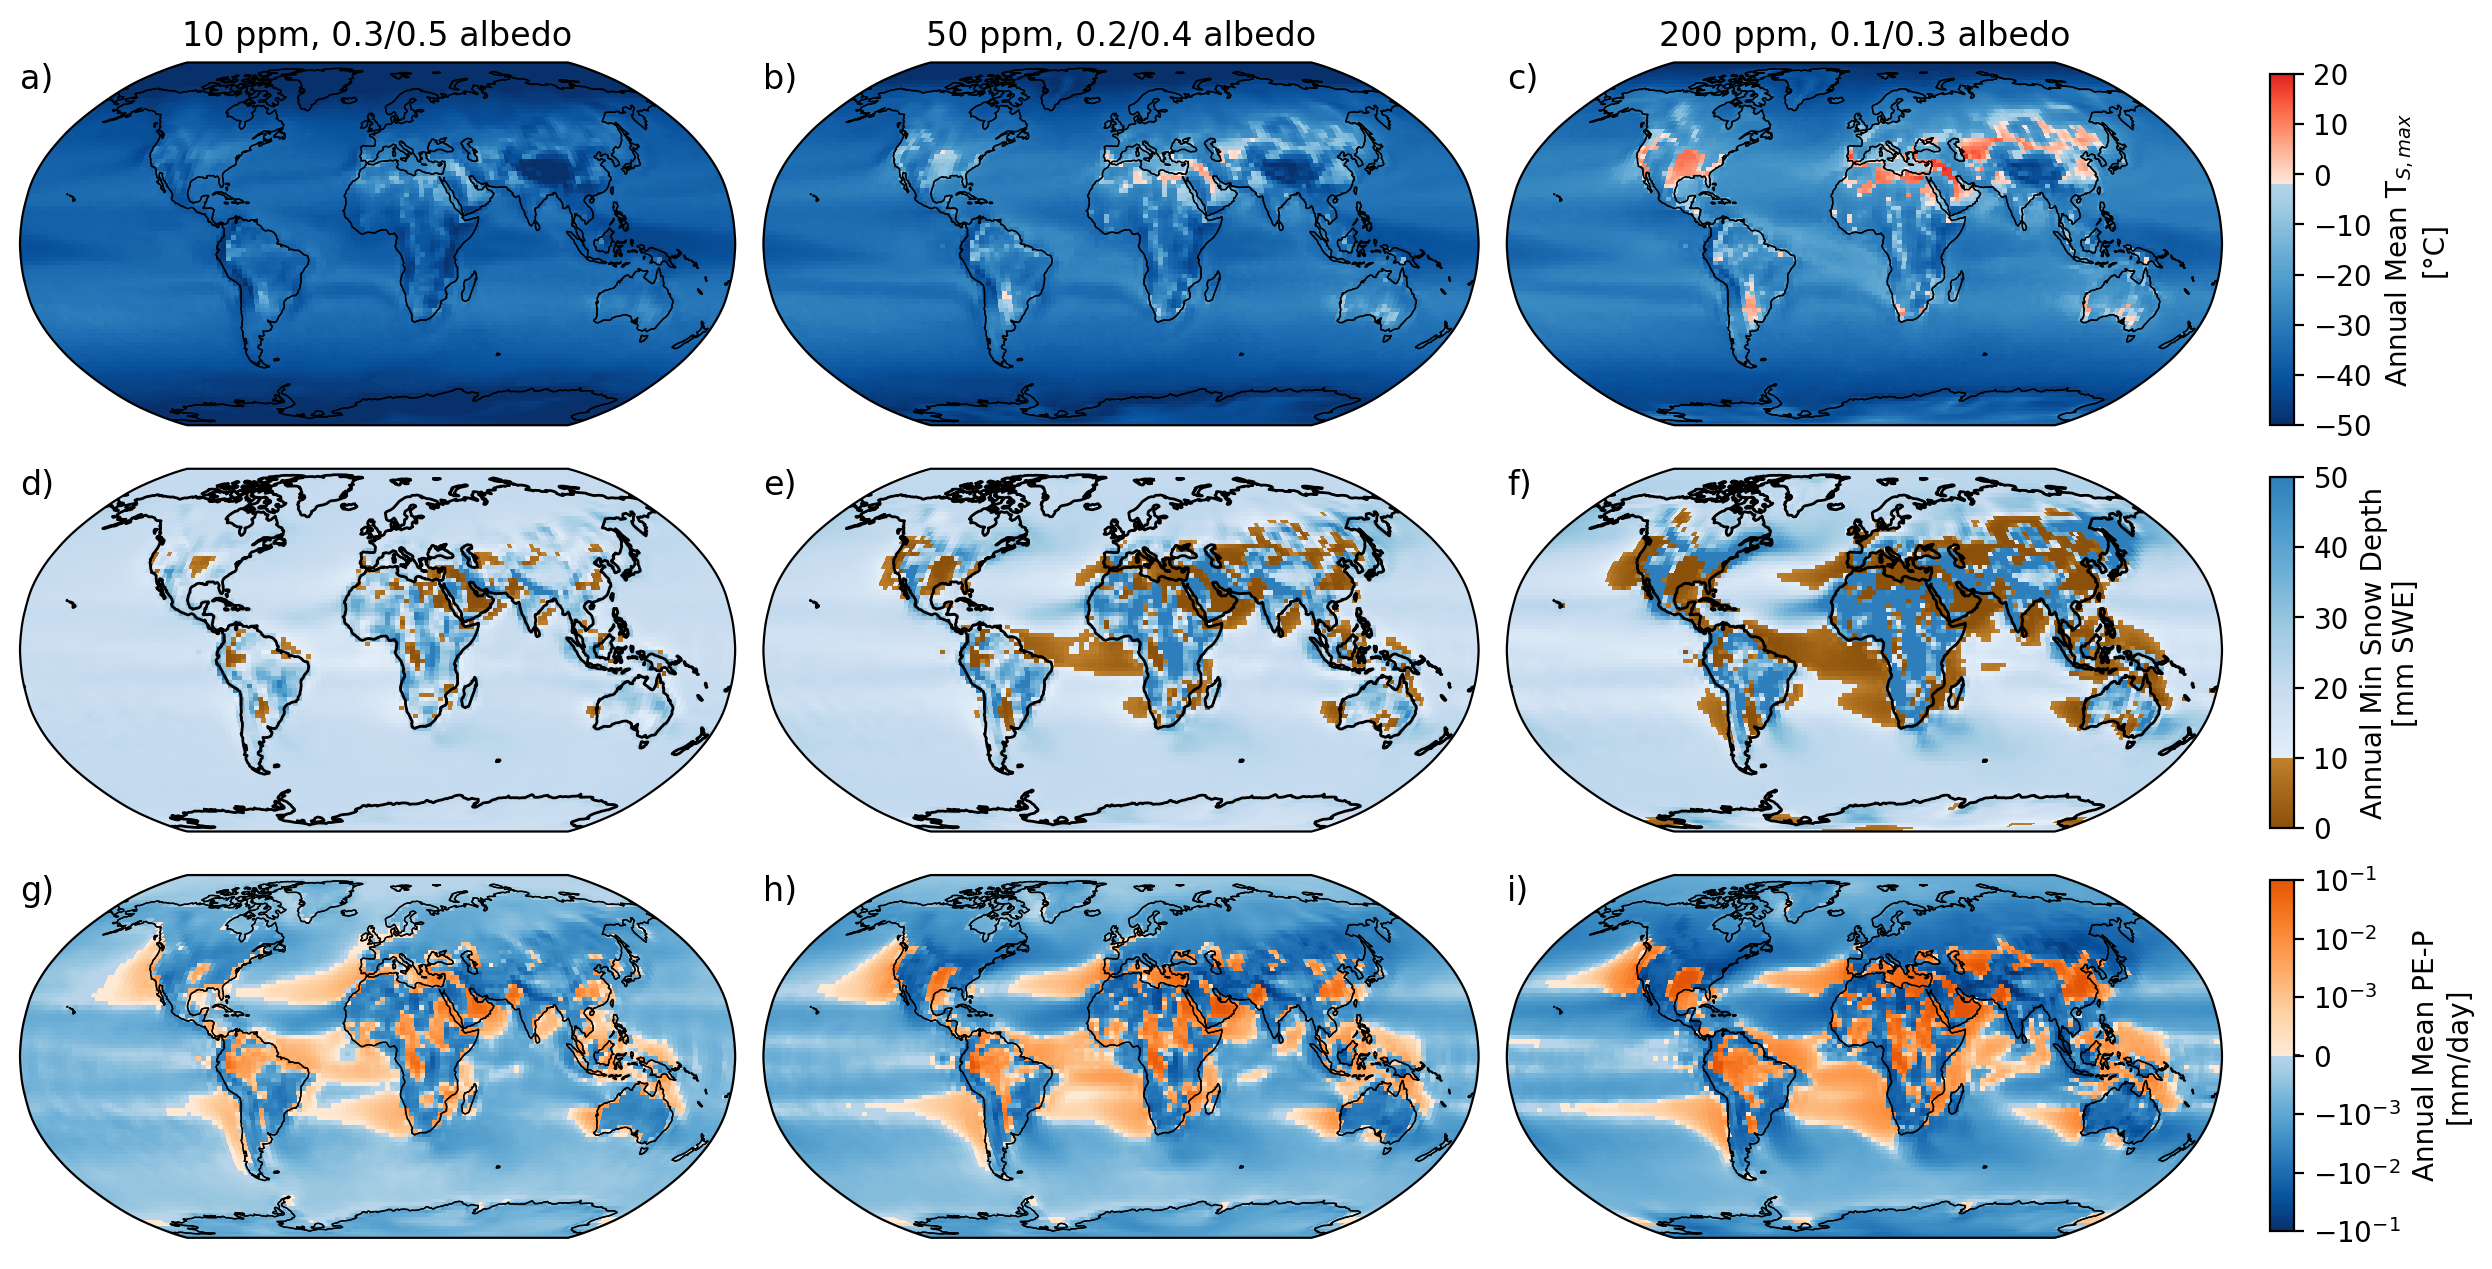

In [55]:
from matplotlib.gridspec import GridSpec
import string

runs = ['moderncam4b_010p30p50a','moderncam4b_050p20p40a','moderncam4b_200p10p30a']
maps = ['TSMX', 'SNOW', 'PE-P']


nr=3
nc=3
fig, axes = plt.subplots(nr, nc, 
                         figsize=(12, 6.5),
                         dpi=200,
                         constrained_layout = True,
                         subplot_kw={'projection': ccrs.Robinson()})
runs = ['moderncam4b_010p30p50a', 'moderncam4b_050p20p40a', 'moderncam4b_200p10p30a']

# Loop through each run and create subplots
for i, run in enumerate(runs): # columns
    # Create subplot indices based on the current run
    row_index = i // 3
    col_index = i % 3

    mapdata_1a = mapdata('TSMX', run)
    p0 = axes[row_index, col_index].pcolormesh(mapdata_1a.lon, mapdata_1a.lat, mapdata_1a,
                                               cmap=cmap_ts, vmin=-50, vmax=20,
                                               transform=ccrs.PlateCarree(), 
                                               # add_colorbar = False
                                              )
    axes[row_index, col_index].coastlines(linewidth=0.5)

    mapdata_1b_i = mapdata('SNOW', run)[0]
    mapdata_1b_s = mapdata('SNOW', run)[1]
    p11 = axes[row_index + 1, col_index].pcolormesh(mapdata_1b_i.lon, mapdata_1b_i.lat, mapdata_1b_i,
                                                   vmin=cmin_snow,vmax=cmax_snow,
                                                    # levels=levels_snow,
                                                   cmap = cmap_snow,transform=ccrs.PlateCarree(),
                                                    # add_colorbar=False
                                                   )
    p12 = axes[row_index + 1, col_index].pcolormesh(mapdata_1b_s.lon, mapdata_1b_s.lat, mapdata_1b_s,
                                                   vmin=cmin_snow,vmax=cmax_snow,
                                                    # levels=levels_snow,
                                                   cmap = cmap_snow,transform=ccrs.PlateCarree(),
                                                    # add_colorbar=False
                                                   )
    axes[row_index + 1, col_index].coastlines(linewidth=1)

    mapdata_1c_l = mapdata('PE-P', run)[1]
    mapdata_1c_i = mapdata('PE-P', run)[0]
    p21 = axes[row_index + 2, col_index].pcolormesh(mapdata_1c_l.lon, mapdata_1c_l.lat, mapdata_1c_l,
                                                    # vmin=-0.2, vmax=0.2,
                                                    norm=norm_1c,
                                                    cmap=cmap_pe, transform=ccrs.PlateCarree())
    p22 = axes[row_index + 2, col_index].pcolormesh(mapdata_1c_i.lon, mapdata_1c_i.lat, mapdata_1c_i,
                                                    # vmin=-0.2, vmax=0.2,
                                                    norm=norm_1c,
                                                    cmap=cmap_pe, transform=ccrs.PlateCarree())
    axes[row_index + 2, col_index].coastlines(linewidth=0.5)


    

    # axs[i].set_global()
    # axs[i].coastlines(linewidth=0.5)
for aic in range(nc):
    for air in range(nr):
        axes[air,aic].set_global()
        axes[air,aic].coastlines(linewidth=0.5)

# axes[0,0].set_title('Max. Surface TS')
# axes[0,1].set_title('Min Snow Height')
# axes[0,2].set_title('Mean PE-P')
# p.axes.set_global()
# p.axes.coastlines(linewidth=0.5)

# Add titles to each column
for i in range(nc):
    axes[0, i].set_title(f'{run_name[runs[i]]}',fontsize=12)


# adjust subplots
plt.tight_layout()

# add colorbar axes and colorbars
fig.subplots_adjust(right=0.93)
cbar_ax_0 = fig.add_axes([0.95, 0.66, 0.01, 0.27])
fig.colorbar(p0, cax=cbar_ax_0, label='Annual Mean T$_{S, max}$\n[°C]', ticks = np.linspace(-50, 20, 8))
cbar_ax_1 = fig.add_axes([0.95, 0.35, 0.01, 0.27])
fig.colorbar(p12, cax=cbar_ax_1, label='Annual Min Snow Depth\n[mm SWE]', ticks = np.linspace(0, 50, 6))
cbar_ax_2 = fig.add_axes([0.95, 0.04, 0.01, 0.27])
fig.colorbar(p22, cax=cbar_ax_2, label='Annual Mean PE-P\n[mm/day]', ticks = [-.1, -.01, -.001, 0, .001, .01, .1])
fig.colorbar(p22, cax=cbar_ax_2, label='Annual Mean PE-P\n[mm/day]', ticks = [-.1, -.01, -.001, 0, .001, .01, .1])

# # Add labels to each subplot
axes[0,0].text(0, 1, 'a)', ha='left', va='top', transform=axes[0,0].transAxes,fontsize=12)
axes[0,1].text(0, 1, 'b)', ha='left', va='top', transform=axes[0,1].transAxes,fontsize=12)
axes[0,2].text(0, 1, 'c)', ha='left', va='top', transform=axes[0,2].transAxes,fontsize=12)
axes[1,0].text(0, 1, 'd)', ha='left', va='top', transform=axes[1,0].transAxes,fontsize=12)
axes[1,1].text(0, 1, 'e)', ha='left', va='top', transform=axes[1,1].transAxes,fontsize=12)
axes[1,2].text(0, 1, 'f)', ha='left', va='top', transform=axes[1,2].transAxes,fontsize=12)
axes[2,0].text(0, 1, 'g)', ha='left', va='top', transform=axes[2,0].transAxes,fontsize=12)
axes[2,1].text(0, 1, 'h)', ha='left', va='top', transform=axes[2,1].transAxes,fontsize=12)
axes[2,2].text(0, 1, 'i)', ha='left', va='top', transform=axes[2,2].transAxes,fontsize=12)



# Save the combined plot
filepath = 'JGRfigures/fig2_combined_log'
fig.savefig(filepath + '.png', dpi=300, facecolor=None, edgecolor=None, bbox_inches='tight', transparent=True, pad_inches=0.01)


plt.show();plt.close()

calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET
calculating PET


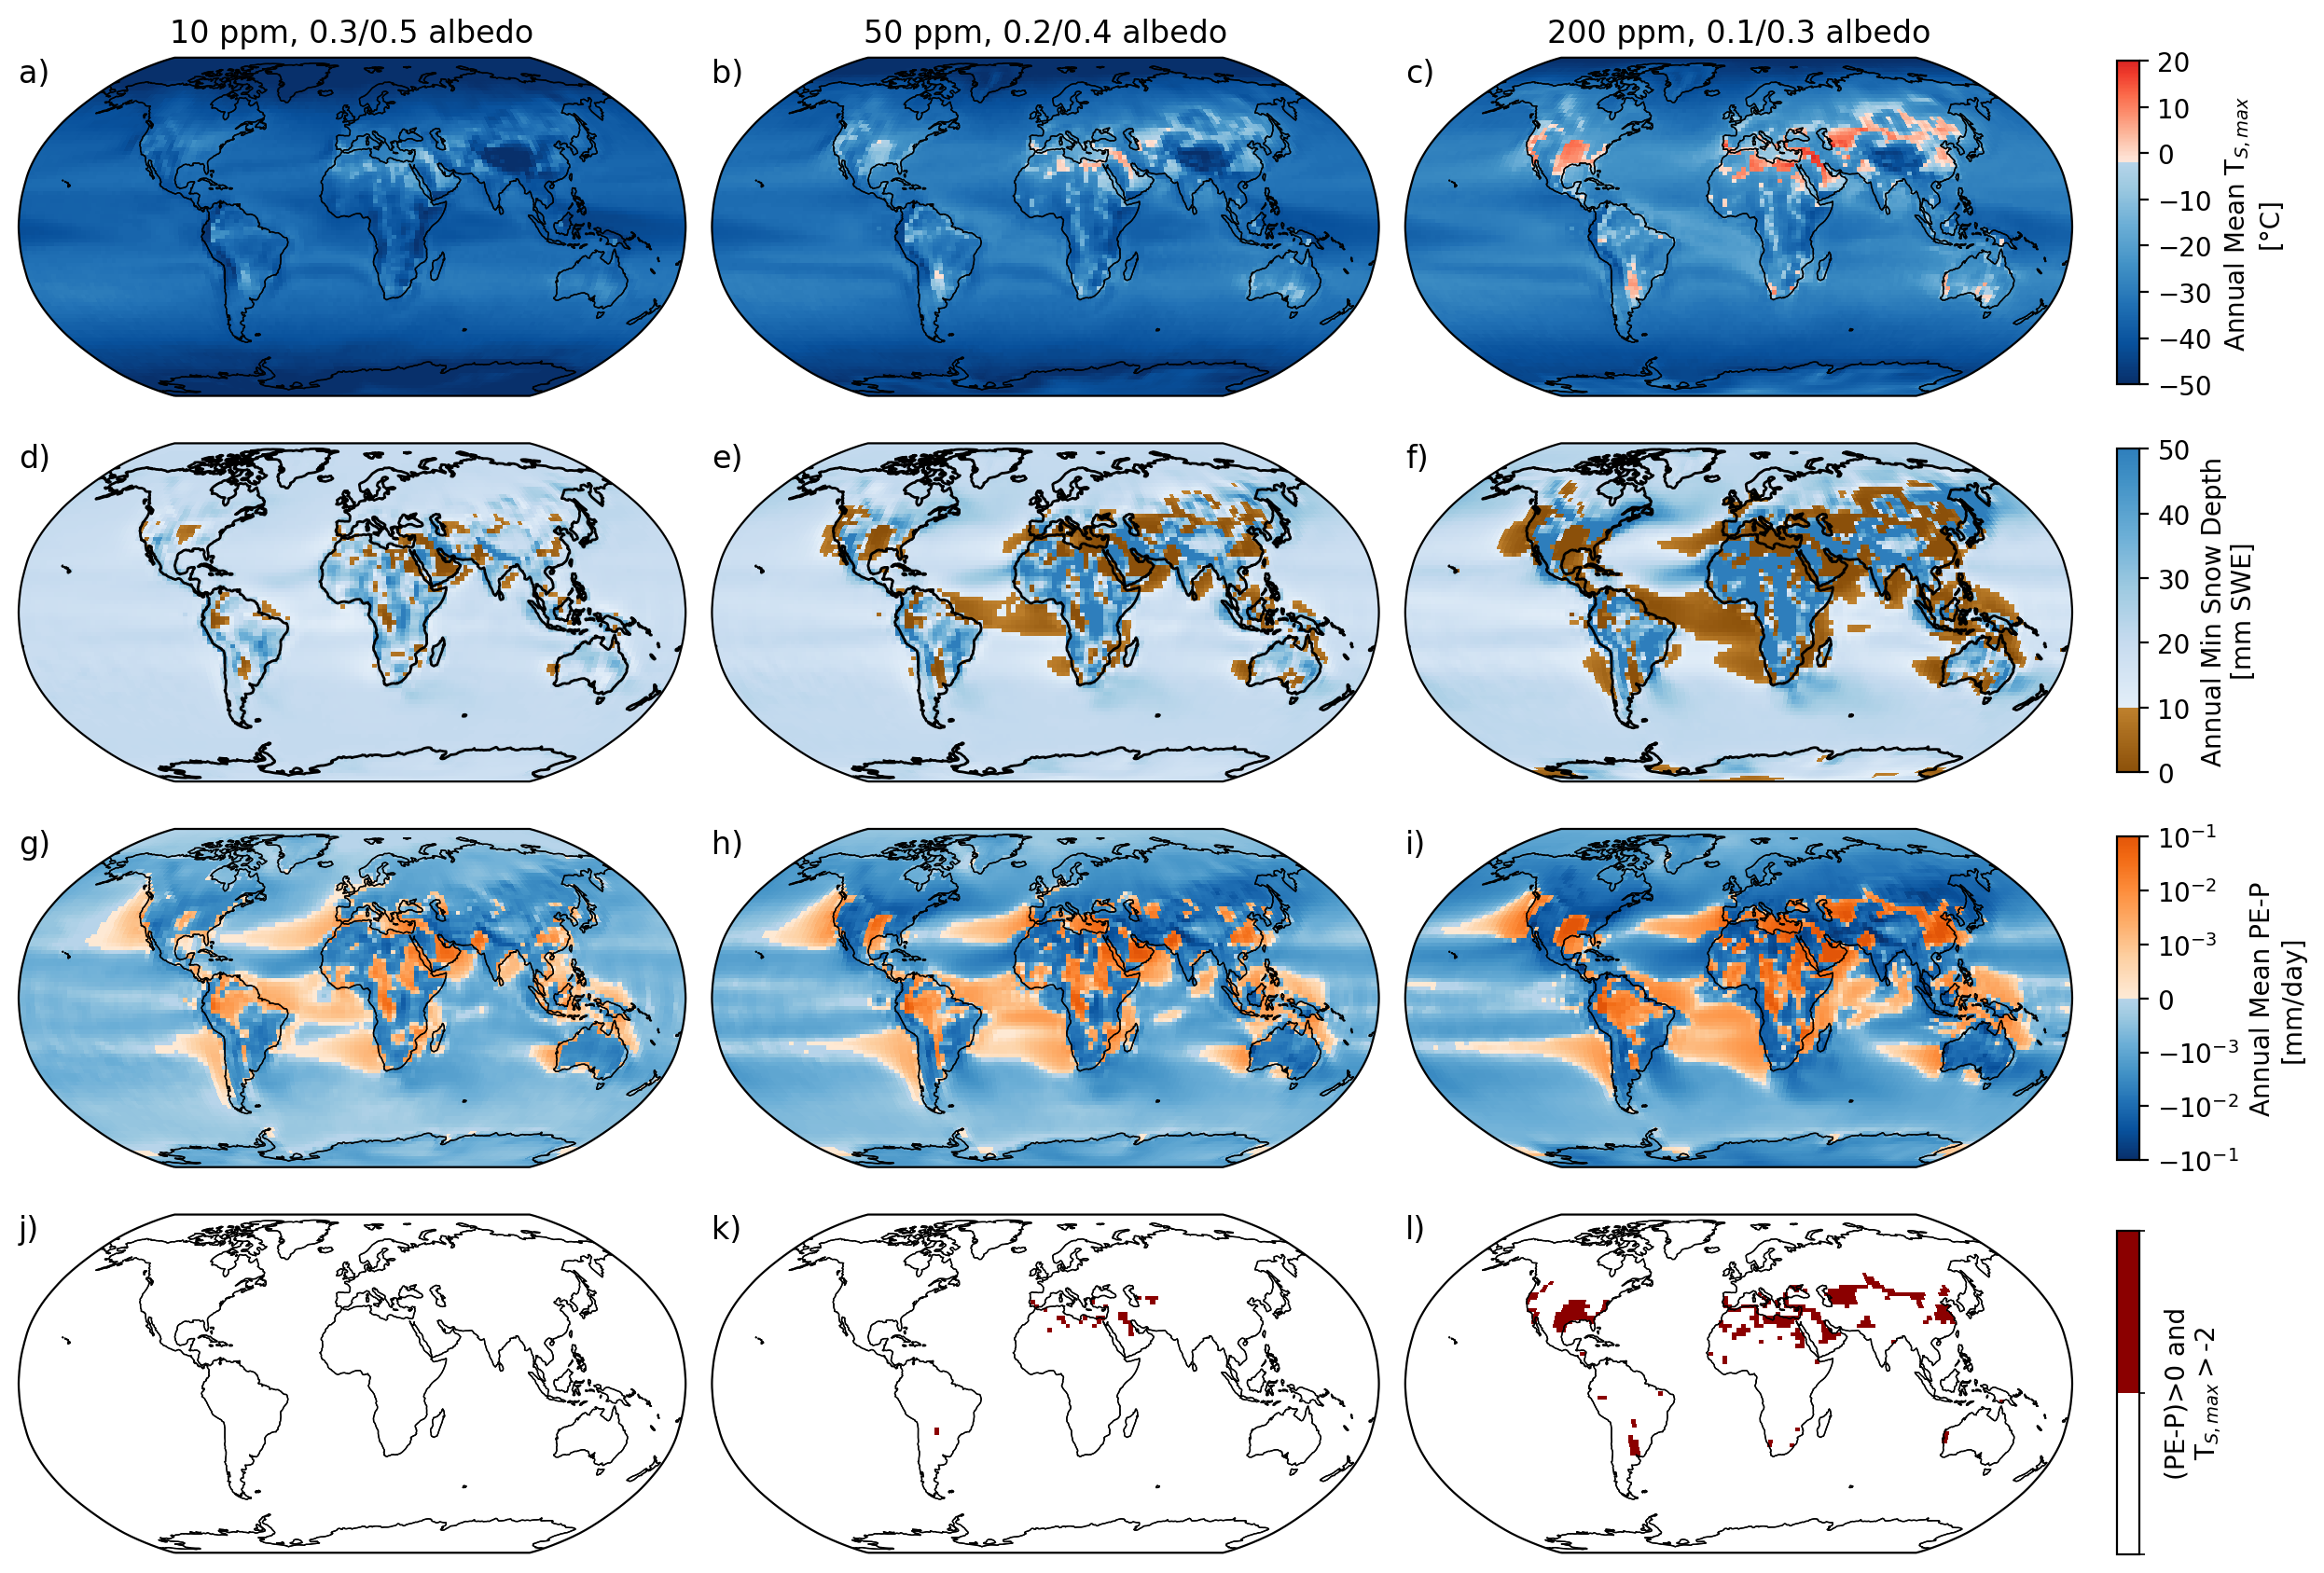

In [56]:
from matplotlib.gridspec import GridSpec
import string

runs = ['moderncam4b_010p30p50a','moderncam4b_050p20p40a','moderncam4b_200p10p30a']
# maps = ['TSMX', 'SNOW', 'PE-P']


nr=4
nc=3
fig, axes = plt.subplots(nr, nc, 
                         figsize=(12, 4*6.5/3),
                         dpi=200,
                         constrained_layout = True,
                         subplot_kw={'projection': ccrs.Robinson()})
runs = ['moderncam4b_010p30p50a', 'moderncam4b_050p20p40a', 'moderncam4b_200p10p30a']

# Loop through each run and create subplots
for i, run in enumerate(runs): # columns
    # Create subplot indices based on the current run
    row_index = i // 3
    col_index = i % 3

    mapdata_1a = mapdata('TSMX', run)
    p0 = axes[row_index, col_index].pcolormesh(mapdata_1a.lon, mapdata_1a.lat, mapdata_1a,
                                               cmap=cmap_ts, vmin=-50, vmax=20,
                                               transform=ccrs.PlateCarree(), 
                                               # add_colorbar = False
                                              )
    axes[row_index, col_index].coastlines(linewidth=0.5)

    mapdata_1b_i = mapdata('SNOW', run)[0]
    mapdata_1b_s = mapdata('SNOW', run)[1]
    p11 = axes[row_index + 1, col_index].pcolormesh(mapdata_1b_i.lon, mapdata_1b_i.lat, mapdata_1b_i,
                                                   vmin=cmin_snow,vmax=cmax_snow,
                                                    # levels=levels_snow,
                                                   cmap = cmap_snow,transform=ccrs.PlateCarree(),
                                                    # add_colorbar=False
                                                   )
    p12 = axes[row_index + 1, col_index].pcolormesh(mapdata_1b_s.lon, mapdata_1b_s.lat, mapdata_1b_s,
                                                   vmin=cmin_snow,vmax=cmax_snow,
                                                    # levels=levels_snow,
                                                   cmap = cmap_snow,transform=ccrs.PlateCarree(),
                                                    # add_colorbar=False
                                                   )
    axes[row_index + 1, col_index].coastlines(linewidth=1)

    mapdata_1c_l = mapdata('PE-P', run)[1]
    mapdata_1c_i = mapdata('PE-P', run)[0]
    p21 = axes[row_index + 2, col_index].pcolormesh(mapdata_1c_l.lon, mapdata_1c_l.lat, mapdata_1c_l,
                                                    # vmin=-0.2, vmax=0.2,
                                                    norm=norm_1c,
                                                    cmap=cmap_pe, transform=ccrs.PlateCarree())
    p22 = axes[row_index + 2, col_index].pcolormesh(mapdata_1c_i.lon, mapdata_1c_i.lat, mapdata_1c_i,
                                                    # vmin=-0.2, vmax=0.2,
                                                    norm=norm_1c,
                                                    cmap=cmap_pe, transform=ccrs.PlateCarree())
    axes[row_index + 2, col_index].coastlines(linewidth=0.5)


    
    # add a fourth row
    mapdata_1d_l=mapdata_1c_l.where(mapdata_1a>-2)
    mapdata_1d_i=mapdata_1c_i.where(mapdata_1a>-2)
    cmapRed = colors.ListedColormap(['white', 'darkred'])
    bounds=[-100,0,100]
    norm_1d= colors.BoundaryNorm(bounds, cmapRed.N)
    p31 = axes[row_index + 3, col_index].pcolormesh(mapdata_1d_l.lon, mapdata_1d_l.lat, mapdata_1d_l,
                                                    # vmin=0, vmax=0.0001,
                                                    norm=norm_1d,
                                                    cmap=cmapRed, transform=ccrs.PlateCarree())
    p32 = axes[row_index + 3, col_index].pcolormesh(mapdata_1d_i.lon, mapdata_1d_i.lat, mapdata_1d_i,
                                                    # vmin=0, vmax=0.0001,
                                                    norm=norm_1d,
                                                    cmap=cmapRed, transform=ccrs.PlateCarree())
    axes[row_index + 3, col_index].coastlines(linewidth=0.5)
 

    # axs[i].set_global()
    # axs[i].coastlines(linewidth=0.5)
for aic in range(nc):
    for air in range(nr):
        axes[air,aic].set_global()
        axes[air,aic].coastlines(linewidth=0.5)

# axes[0,0].set_title('Max. Surface TS')
# axes[0,1].set_title('Min Snow Height')
# axes[0,2].set_title('Mean PE-P')
# p.axes.set_global()
# p.axes.coastlines(linewidth=0.5)

# Add titles to each column
for i in range(nc):
    axes[0, i].set_title(f'{run_name[runs[i]]}',fontsize=12)


# adjust subplots
plt.tight_layout()

# add colorbar axes and colorbars
fig.subplots_adjust(right=0.93)
cbar_ax_0 = fig.add_axes([0.95, 0.75, 0.01, 0.20])
fig.colorbar(p0, cax=cbar_ax_0, label='Annual Mean T$_{S, max}$\n[°C]', ticks = np.linspace(-50, 20, 8))
cbar_ax_1 = fig.add_axes([0.95, 0.51, 0.01, 0.20])
fig.colorbar(p12, cax=cbar_ax_1, label='Annual Min Snow Depth\n[mm SWE]', ticks = np.linspace(0, 50, 6))
cbar_ax_2 = fig.add_axes([0.95, 0.27, 0.01, 0.20])
fig.colorbar(p22, cax=cbar_ax_2, label='Annual Mean PE-P\n[mm/day]', ticks = [-.1, -.01, -.001, 0, .001, .01, .1])
fig.colorbar(p22, cax=cbar_ax_2, label='Annual Mean PE-P\n[mm/day]', ticks = [-.1, -.01, -.001, 0, .001, .01, .1])
cbar_ax_3 = fig.add_axes([0.95, 0.026, 0.01, 0.20])
fig.colorbar(p32, cax=cbar_ax_3, label='(PE-P)>0 and\nT$_{S, max}>$-2', ticks = [])
fig.colorbar(p32, cax=cbar_ax_3, label='(PE-P)>0 and\nT$_{S, max}>$-2', ticks = [])



# # Add labels to each subplot
axes[0,0].text(0, 1, 'a)', ha='left', va='top', transform=axes[0,0].transAxes,fontsize=12)
axes[0,1].text(0, 1, 'b)', ha='left', va='top', transform=axes[0,1].transAxes,fontsize=12)
axes[0,2].text(0, 1, 'c)', ha='left', va='top', transform=axes[0,2].transAxes,fontsize=12)
axes[1,0].text(0, 1, 'd)', ha='left', va='top', transform=axes[1,0].transAxes,fontsize=12)
axes[1,1].text(0, 1, 'e)', ha='left', va='top', transform=axes[1,1].transAxes,fontsize=12)
axes[1,2].text(0, 1, 'f)', ha='left', va='top', transform=axes[1,2].transAxes,fontsize=12)
axes[2,0].text(0, 1, 'g)', ha='left', va='top', transform=axes[2,0].transAxes,fontsize=12)
axes[2,1].text(0, 1, 'h)', ha='left', va='top', transform=axes[2,1].transAxes,fontsize=12)
axes[2,2].text(0, 1, 'i)', ha='left', va='top', transform=axes[2,2].transAxes,fontsize=12)
axes[3,0].text(0, 1, 'j)', ha='left', va='top', transform=axes[3,0].transAxes,fontsize=12)
axes[3,1].text(0, 1, 'k)', ha='left', va='top', transform=axes[3,1].transAxes,fontsize=12)
axes[3,2].text(0, 1, 'l)', ha='left', va='top', transform=axes[3,2].transAxes,fontsize=12)


# Save the combined plot
filepath = 'JGRfigures/fig2_4 rows'
fig.savefig(filepath + '.png', dpi=300, facecolor=None, edgecolor=None, bbox_inches='tight', transparent=True, pad_inches=0.01)


plt.show();plt.close()

In [58]:
print(mapdata_1c_l)


<xarray.DataArray (lat: 96, lon: 144)>
dask.array<where, shape=(96, 144), dtype=float64, chunksize=(96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5


In [ ]:
## blank plot to adjust layout
fig, axes = plt.subplots(3, 3, 
                         figsize=(12, 6.5),
                         dpi=200,
                         constrained_layout = True,
                         subplot_kw={'projection': ccrs.Robinson()})

# Add titles to each column
for i in range(3):
    axes[0, i].set_title(f'{run_name[runs[i]]}',fontsize=12)


# fig.tight_layout()
# fig.subplots_adjust(top=0.95)

# plt.subplots_adjust(hspace=0.01)#,wspace=0.05)

# adjust subplots
plt.tight_layout()

# add colorbar axes and colorbars
fig.subplots_adjust(right=0.93)
cbar_ax_0 = fig.add_axes([0.95, 0.66, 0.01, 0.27])
fig.colorbar(p0, cax=cbar_ax_0, label='Annual Mean T$_{S, max}$\n[°C]', ticks = np.linspace(-50, 20, 8))
cbar_ax_1 = fig.add_axes([0.95, 0.35, 0.01, 0.27])
fig.colorbar(p12, cax=cbar_ax_1, label='Annual Min Snow Depth\n[mm SWE]', ticks = np.linspace(0, 50, 6))
cbar_ax_2 = fig.add_axes([0.95, 0.04, 0.01, 0.27])
fig.colorbar(p22, cax=cbar_ax_2, label='Annual Mean PE-P\n[mm/day]', ticks = [-.1, -.01, -.001, 0, .001, .01, .1])



# # Define labels
# labels = list(string.ascii_lowercase)[:len(axes)]

# # Add labels to each subplot
# for i, ax in enumerate(axes):
#     ax.text(0, 1, f'{labels[i]})', ha='left', va='top', transform=ax.transAxes)

axes[0,0].text(0, 1, 'a)', ha='left', va='top', transform=axes[0,0].transAxes,fontsize=12)
axes[0,1].text(0, 1, 'b)', ha='left', va='top', transform=axes[0,1].transAxes,fontsize=12)
axes[0,2].text(0, 1, 'c)', ha='left', va='top', transform=axes[0,2].transAxes,fontsize=12)
axes[1,0].text(0, 1, 'd)', ha='left', va='top', transform=axes[1,0].transAxes,fontsize=12)
axes[1,1].text(0, 1, 'e)', ha='left', va='top', transform=axes[1,1].transAxes,fontsize=12)
axes[1,2].text(0, 1, 'f)', ha='left', va='top', transform=axes[1,2].transAxes,fontsize=12)
axes[2,0].text(0, 1, 'g)', ha='left', va='top', transform=axes[2,0].transAxes,fontsize=12)
axes[2,1].text(0, 1, 'h)', ha='left', va='top', transform=axes[2,1].transAxes,fontsize=12)
axes[2,2].text(0, 1, 'i)', ha='left', va='top', transform=axes[2,2].transAxes,fontsize=12)





plt.show();plt.close()

In [ ]:
## blank plot to adjust layout
fig, axes = plt.subplots(4, 3, 
                         figsize=(12, 4*6.5/3),
                         dpi=200,
                         constrained_layout = True,
                         subplot_kw={'projection': ccrs.Robinson()})

# Add titles to each column
for i in range(3):
    axes[0, i].set_title(f'{run_name[runs[i]]}',fontsize=12)


# fig.tight_layout()
# fig.subplots_adjust(top=0.95)

# plt.subplots_adjust(hspace=0.01)#,wspace=0.05)

# adjust subplots
plt.tight_layout()

# add colorbar axes and colorbars
fig.subplots_adjust(right=0.93)
cbar_ax_0 = fig.add_axes([0.95, 0.75, 0.01, 0.20])
fig.colorbar(p0, cax=cbar_ax_0, label='Annual Mean T$_{S, max}$\n[°C]', ticks = np.linspace(-50, 20, 8))
cbar_ax_1 = fig.add_axes([0.95, 0.51, 0.01, 0.20])
fig.colorbar(p12, cax=cbar_ax_1, label='Annual Min Snow Depth\n[mm SWE]', ticks = np.linspace(0, 50, 6))
cbar_ax_2 = fig.add_axes([0.95, 0.27, 0.01, 0.20])
fig.colorbar(p22, cax=cbar_ax_2, label='Annual Mean PE-P\n[mm/day]', ticks = [-.1, -.01, -.001, 0, .001, .01, .1])
fig.colorbar(p22, cax=cbar_ax_2, label='Annual Mean PE-P\n[mm/day]', ticks = [-.1, -.01, -.001, 0, .001, .01, .1])
cbar_ax_3 = fig.add_axes([0.95, 0.026, 0.01, 0.20])
fig.colorbar(p32, cax=cbar_ax_3, label='(PE-P)>0 and T$_{S, max}>$-2', ticks = [])
fig.colorbar(p32, cax=cbar_ax_3, label='(PE-P)>0 and T$_{S, max}>$-2', ticks = [])


# # Define labels
# labels = list(string.ascii_lowercase)[:len(axes)]

# # Add labels to each subplot
# for i, ax in enumerate(axes):
#     ax.text(0, 1, f'{labels[i]})', ha='left', va='top', transform=ax.transAxes)

axes[0,0].text(0, 1, 'a)', ha='left', va='top', transform=axes[0,0].transAxes,fontsize=12)
axes[0,1].text(0, 1, 'b)', ha='left', va='top', transform=axes[0,1].transAxes,fontsize=12)
axes[0,2].text(0, 1, 'c)', ha='left', va='top', transform=axes[0,2].transAxes,fontsize=12)
axes[1,0].text(0, 1, 'd)', ha='left', va='top', transform=axes[1,0].transAxes,fontsize=12)
axes[1,1].text(0, 1, 'e)', ha='left', va='top', transform=axes[1,1].transAxes,fontsize=12)
axes[1,2].text(0, 1, 'f)', ha='left', va='top', transform=axes[1,2].transAxes,fontsize=12)
axes[2,0].text(0, 1, 'g)', ha='left', va='top', transform=axes[2,0].transAxes,fontsize=12)
axes[2,1].text(0, 1, 'h)', ha='left', va='top', transform=axes[2,1].transAxes,fontsize=12)
axes[2,2].text(0, 1, 'i)', ha='left', va='top', transform=axes[2,2].transAxes,fontsize=12)
axes[3,0].text(0, 1, 'j)', ha='left', va='top', transform=axes[2,0].transAxes,fontsize=12)
axes[3,1].text(0, 1, 'k)', ha='left', va='top', transform=axes[2,1].transAxes,fontsize=12)
axes[3,2].text(0, 1, 'l)', ha='left', va='top', transform=axes[2,2].transAxes,fontsize=12)





plt.show();plt.close()

# Assessment of CO2 Radiative Forcing

In [53]:
runlist

['moderncam4b_010p10p30a',
 'moderncam4b_010p20p40a',
 'moderncam4b_010p30p50a',
 'moderncam4b_025p20p40a',
 'moderncam4b_050p10p30a',
 'moderncam4b_050p15p35a',
 'moderncam4b_050p20p40a',
 'moderncam4b_050p25p45a',
 'moderncam4b_050p30p50a',
 'moderncam4b_100p20p40a',
 'moderncam4b_200p10p30a',
 'moderncam4b_200p20p40a',
 'moderncam4b_200p30p50a']

In [54]:
rad_runlist = ['moderncam4b_050p20p40a_port_base',
               'moderncam4b_050p20p40a_port_p20p40alb_case',
               'moderncam4b_050p20p40a_port_0.2xco2_case',
               'moderncam4b_050p20p40a_port_0.5xco2_case',
               'moderncam4b_050p20p40a_port_2.0xco2_case',
               'moderncam4b_050p20p40a_port_4.0xco2_case',
               'moderncam4b_050p20p40a_port_p10p30alb_case',
               'moderncam4b_050p20p40a_port_p15p35alb_case',
               'moderncam4b_050p20p40a_port_p25p45alb_case',
               'moderncam4b_050p20p40a_port_p30p50alb_case',
              ]

rad_runname = {
    'moderncam4b_050p20p40a_port_base': 'base: 50 ppm, 0.2/0.4 alb',
    'moderncam4b_050p20p40a_port_p20p40alb_case': '50 ppm, 0.2/0.4 alb',
    'moderncam4b_050p20p40a_port_0.2xco2_case': '10 ppm, 0.2/0.4 alb',
    'moderncam4b_050p20p40a_port_0.5xco2_case': '25 ppm, 0.2/0.4 alb',
    'moderncam4b_050p20p40a_port_2.0xco2_case': '100 ppm, 0.2/0.4 alb',
    'moderncam4b_050p20p40a_port_4.0xco2_case': '200 ppm, 0.2/0.4 alb',
    'moderncam4b_050p20p40a_port_p10p30alb_case': '50 ppm, 0.1/0.3 alb',
    'moderncam4b_050p20p40a_port_p15p35alb_case': '50 ppm, 0.15/0.35 alb',
    'moderncam4b_050p20p40a_port_p25p45alb_case': '50 ppm, 0.25/0.45 alb',
    'moderncam4b_050p20p40a_port_p30p50alb_case': '50 ppm, 0.3/0.5 alb',
}

In [55]:
## pull in rad forcing
files_rad = {}
ds_rad = {}
for run in rad_runlist:
    if run == 'moderncam4b_050p20p40a_port_0.5xco2_case':
        print('loading', rad_runname[run])
        print('skipping')
        pass
    else:
        print('loading', rad_runname[run])
        if run == 'moderncam4b_050p20p40a_port_base':
            files_rad[run] = datapath +'%s/atm/hist/%s.cam.h1.000*.nc' % (run, run)
        else:
            files_rad[run] = datapath +'%s/atm/hist/%s.cam.h1.*.nc' % (run, run)
        ds_rad[run] = xr.open_mfdataset(files_rad[run])
        print(rad_runname[run])

loading base: 50 ppm, 0.2/0.4 alb
base: 50 ppm, 0.2/0.4 alb
loading 50 ppm, 0.2/0.4 alb
50 ppm, 0.2/0.4 alb
loading 10 ppm, 0.2/0.4 alb
10 ppm, 0.2/0.4 alb
loading 25 ppm, 0.2/0.4 alb
skipping
loading 100 ppm, 0.2/0.4 alb
100 ppm, 0.2/0.4 alb
loading 200 ppm, 0.2/0.4 alb
200 ppm, 0.2/0.4 alb
loading 50 ppm, 0.1/0.3 alb
50 ppm, 0.1/0.3 alb
loading 50 ppm, 0.15/0.35 alb
50 ppm, 0.15/0.35 alb
loading 50 ppm, 0.25/0.45 alb
50 ppm, 0.25/0.45 alb
loading 50 ppm, 0.3/0.5 alb
50 ppm, 0.3/0.5 alb


In [56]:
# ds_rad[rad_runlist[1]]

### calculate TOA radiation using PORT runs

delta TOA between two runs is the radiative forcing

In [56]:


# FLNR-FSNR
TOA = {}
for run in rad_runlist:
    if run == 'moderncam4b_050p20p40a_port_0.5xco2_case':
        print('loading', rad_runname[run])
        print('skipping')
        pass
    else:
        FLNR = (ds_rad[run]['FLNR'][-240:].mean('time')*(area_grid/area_grid.sum(('lat','lon')))).sum(('lat','lon'))
        FSNR = (ds_rad[run]['FSNR'][-240:].mean('time')*(area_grid/area_grid.sum(('lat','lon')))).sum(('lat','lon'))
        
        TOA[run] = (FLNR - FSNR).values
TOA


loading 25 ppm, 0.2/0.4 alb
skipping


{'moderncam4b_050p20p40a_port_base': array(13.95492291),
 'moderncam4b_050p20p40a_port_p20p40alb_case': array(10.80177409),
 'moderncam4b_050p20p40a_port_0.2xco2_case': array(16.70670383),
 'moderncam4b_050p20p40a_port_2.0xco2_case': array(12.76457509),
 'moderncam4b_050p20p40a_port_4.0xco2_case': array(11.54438904),
 'moderncam4b_050p20p40a_port_p10p30alb_case': array(8.79076492),
 'moderncam4b_050p20p40a_port_p15p35alb_case': array(9.79135066),
 'moderncam4b_050p20p40a_port_p25p45alb_case': array(11.82235091),
 'moderncam4b_050p20p40a_port_p30p50alb_case': array(12.8534128)}

In [57]:
# forgot to run 25 ppm port run, but ran it for the alternate case; the radtiative forcing is a factor of -1.0121447720493264x that of 50 to 100
factor = -1.0121447720493264

In [58]:
print('albedo forcing')
print('0.2/0.4 to 0.3/0.5', np.round(TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p30p50alb_case'],2))
print('0.2/0.4 to 0.25/0.45', np.round(TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p25p45alb_case'],2))
print('0.2/0.4 to 0.2/0.4', np.round(TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p20p40alb_case'],2))
print('0.2/0.4 to 0.15/0.35', np.round(TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p15p35alb_case'],2))
print('0.2/0.4 to 0.1/0.3', np.round(TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p10p30alb_case'],2))

print('co2 forcing')
print('50 to 10', np.round(TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_0.2xco2_case'],2))
print('50 to 25', np.round(factor*(TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_2.0xco2_case']),2))
print('50 to 50', np.round(TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_base'],2))
print('50 to 100', np.round(TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_2.0xco2_case'],2))
print('50 to 200', np.round(TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_4.0xco2_case'],2))


albedo forcing
0.2/0.4 to 0.3/0.5 -2.05
0.2/0.4 to 0.25/0.45 -1.02
0.2/0.4 to 0.2/0.4 0.0
0.2/0.4 to 0.15/0.35 1.01
0.2/0.4 to 0.1/0.3 2.01
co2 forcing
50 to 10 -2.75
50 to 25 -1.2
50 to 50 0.0
50 to 100 1.19
50 to 200 2.41


In [59]:
print('albedo forcing')
rad_forcing ={}

rad_forcing['p30p50'] = TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p30p50alb_case'] -(TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p30p50alb_case'])
print('p30p50 to p30p50 = ', np.round(rad_forcing['p30p50'],2))

rad_forcing['p25p45'] = TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p25p45alb_case'] -(TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p30p50alb_case'])
print('p30p50 to p25p45 = ', np.round(rad_forcing['p25p45'],2))

rad_forcing['p20p40'] = TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p20p40alb_case'] -(TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p30p50alb_case'])
print('p30p50 to p20p40 = ', np.round(rad_forcing['p20p40'],2))

rad_forcing['p15p35'] = TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p15p35alb_case'] -(TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p30p50alb_case'])
print('p30p50 to p15p35 = ', np.round(rad_forcing['p15p35'],2))

rad_forcing['p10p30'] = TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p10p30alb_case'] -(TOA['moderncam4b_050p20p40a_port_p20p40alb_case']-TOA['moderncam4b_050p20p40a_port_p30p50alb_case'])
print('p30p50 to p10p30 = ', np.round(rad_forcing['p10p30'],2))

print('co2 forcing')
rad_forcing['010'] = TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_0.2xco2_case']-(TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_0.2xco2_case'])
print('10 to 10 = ', np.round(rad_forcing['010'],2))

rad_forcing['025'] = ((factor*(TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_2.0xco2_case']))-(TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_0.2xco2_case']))
print('10 to 25 = ', np.round(rad_forcing['025'],2))

rad_forcing['050'] = TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_base']-(TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_0.2xco2_case'])
print('10 to 50 = ', np.round(rad_forcing['050'],2))

rad_forcing['100'] = TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_2.0xco2_case']-(TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_0.2xco2_case'])
print('10 to 100 = ', np.round(rad_forcing['100'],2))

rad_forcing['200'] = TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_4.0xco2_case']-(TOA['moderncam4b_050p20p40a_port_base']-TOA['moderncam4b_050p20p40a_port_0.2xco2_case'])
print('10 to 200 = ', np.round(rad_forcing['200'],2))

albedo forcing
p30p50 to p30p50 =  0.0
p30p50 to p25p45 =  1.03
p30p50 to p20p40 =  2.05
p30p50 to p15p35 =  3.06
p30p50 to p10p30 =  4.06
co2 forcing
10 to 10 =  0.0
10 to 25 =  1.55
10 to 50 =  2.75
10 to 100 =  3.94
10 to 200 =  5.16


### total radiative forcing is the sum of albedo and CO2 forcing

In [60]:
# create a dictionary of radiative forcing values for each run
rf = {}
for run in runlist:
    co2 = str(run)[12:15]
    alb = str(run)[15:21]
    rf[run] = rad_forcing[co2] + rad_forcing[alb]
for run in runlist:
    print(run_name[run], np.round(rf[run], 2))

10 ppm, 0.1/0.3 albedo 4.06
10 ppm, 0.2/0.4 albedo 2.05
10 ppm, 0.3/0.5 albedo 0.0
25 ppm, 0.2/0.4 albedo 3.6
50 ppm, 0.1/0.3 albedo 6.81
50 ppm, 0.15/0.35 albedo 5.81
50 ppm, 0.2/0.4 albedo 4.8
50 ppm, 0.25/0.45 albedo 3.78
50 ppm, 0.3/0.5 albedo 2.75
100 ppm, 0.2/0.4 albedo 5.99
200 ppm, 0.1/0.3 albedo 9.22
200 ppm, 0.2/0.4 albedo 7.21
200 ppm, 0.3/0.5 albedo 5.16


#### greenhouse effect

Following Pierrehumbert 2005 (https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2004JD005162)
Let's calculate the Greenhouse Effect as G = σT^4 - OLR

In [ ]:
# fig = plt.figure(figsize = (8,5),dpi = 200,)
for run in ['moderncam4b_200p10p30a',
            'moderncam4b_200p30p50a',
            'moderncam4b_050p10p30a',
            'moderncam4b_050p30p50a',
            'moderncam4b_010p30p50a',
            'moderncam4b_010p20p40a',
            'moderncam4b_010p10p30a',
            ]:
    OLR = ds_atm[run]['FLUT'].mean('lon').mean('time').values
    Ts = ds_atm[run]['TS'].mean('lon').mean('time').values
    
    G = (5.67e-8)*(Ts**4) - OLR
    print(run, (G*np.cos(np.deg2rad(ds_atm[run]['lat']))).mean('lat').values)

## Area for each mechanism of warming or PE change

In [67]:
land_area = (area_grid*ds_atm[run]['LANDFRAC'][0]).sum('lat').sum('lon')

In [71]:
# Mechanism:
# Land area that moves from snow-covered to non-snow-covered

run_ctl = 'moderncam4b_200p30p50a'
run_exp = 'moderncam4b_200p10p30a'
def snow_free(run):
    snow = ds_atm[run]['SNOWHLND'].groupby(ds_atm[run]['SNOWHLND'].time.dt.month).mean('time').min('month')  #mm
    snow_free_land = snow.where(snow<10,np.nan).where(ds_atm[run]['LANDFRAC'][0]>0,np.nan)
    snow_free_land_ones = xr.ones_like(snow_free_land).where(np.isfinite(snow_free_land),0)
    return snow_free_land_ones

def above_freezing(run):
    TSMX = ds_atm[run]['TSMX'].groupby(ds_atm[run]['TSMX'].time.dt.year).max('time').mean('year')  # K
    TSMX_warm_land = TSMX.where(TSMX>271.15,np.nan).where(ds_atm[run]['LANDFRAC'][0]>0,np.nan)
    TSMX_warm_land_ones = xr.ones_like(TSMX_warm_land).where(np.isfinite(TSMX_warm_land),0)
    return TSMX_warm_land_ones

In [74]:
# DIRECT WARMING: return area of land that went from cold to warm and from snow-free to snow-free
direct = area_grid.where(snow_free(run_ctl) == 1).where(snow_free(run_exp) == 1).where(above_freezing(run_ctl) == 0).where(above_freezing(run_exp) == 1)
print('DIRECT:', run_name[run_ctl],'to',run_name[run_exp], np.round((direct.sum('lat').sum('lon').values/land_area*100).values,2), '%')

DIRECT: 200 ppm, 0.3/0.5 albedo to 200 ppm, 0.1/0.3 albedo 5.58 %


In [75]:
# INDIRECT WARMING: return area of land that went from cold to warm and from snow-covered to snow-free
indirect = area_grid.where(snow_free(run_ctl) == 0).where(snow_free(run_exp) == 1).where(above_freezing(run_ctl) == 0).where(above_freezing(run_exp) == 1)
print('INDIRECT:', run_name[run_ctl],'to',run_name[run_exp], np.round((indirect.sum('lat').sum('lon').values/land_area*100).values,2), '%')

INDIRECT: 200 ppm, 0.3/0.5 albedo to 200 ppm, 0.1/0.3 albedo 6.26 %


In [76]:
# WARMED, ALWAYS SNOWY: return area of land that went from cold to warm and from snow-covered to snow-covered
warm_snow = area_grid.where(snow_free(run_ctl) == 0).where(snow_free(run_exp) == 0).where(above_freezing(run_ctl) == 0).where(above_freezing(run_exp) == 1)
print('WARM SNOW:', run_name[run_ctl],'to',run_name[run_exp], np.round((warm_snow.sum('lat').sum('lon').values/land_area*100).values,2), '%')

WARM SNOW: 200 ppm, 0.3/0.5 albedo to 200 ppm, 0.1/0.3 albedo 0.04 %


In [77]:
# WARMED AND GOT SNOWY: return area of land that went from cold to warm and from snow-covered to snow-covered
warm_FROM_snow = area_grid.where(snow_free(run_ctl) == 1).where(snow_free(run_exp) == 0).where(above_freezing(run_ctl) == 0).where(above_freezing(run_exp) == 1)
print('WARMED FROM SNOW:', run_name[run_ctl],'to',run_name[run_exp], np.round((warm_FROM_snow.sum('lat').sum('lon').values/land_area*100).values,2), '%')

WARMED FROM SNOW: 200 ppm, 0.3/0.5 albedo to 200 ppm, 0.1/0.3 albedo 0.0 %


In [78]:
# TOTAL WARMING: return area of land that went from cold to warm (regardless of snow)
total_warming = area_grid.where(above_freezing(run_ctl) == 0).where(above_freezing(run_exp) == 1)
print('TOTAL WARMING:', run_name[run_ctl],'to',run_name[run_exp], np.round((total_warming.sum('lat').sum('lon').values/land_area*100).values,2), '%')

TOTAL WARMING: 200 ppm, 0.3/0.5 albedo to 200 ppm, 0.1/0.3 albedo 11.87 %


In [79]:
((direct.sum('lat').sum('lon').values/land_area*100)/(total_warming.sum('lat').sum('lon').values/land_area*100)).values

array(0.47007268)

In [80]:
((indirect.sum('lat').sum('lon').values/land_area*100)/(total_warming.sum('lat').sum('lon').values/land_area*100)).values

array(0.52693707)

so all places that are warm by the end are in snow-free places (whether they were snow-free before or not)

In [81]:
# SNOW-FREE TO SNOW-FREE BUT ALWAYS COLD : return area of land that went from cold to warm and from snow-covered to snow-free
cold_snow = area_grid.where(snow_free(run_ctl) == 1).where(snow_free(run_exp) == 1).where(above_freezing(run_ctl) == 0).where(above_freezing(run_exp) == 0)
print('NEITHER:', run_name[run_ctl],'to',run_name[run_exp], np.round((cold_snow.sum('lat').sum('lon').values/land_area*100).values,2), '%')

NEITHER: 200 ppm, 0.3/0.5 albedo to 200 ppm, 0.1/0.3 albedo 3.06 %


In [82]:
# SNOW-FREE TO SNOW-COVERED : return area of land that went from snow-free to snow-covered
got_snowy = area_grid.where(snow_free(run_ctl) == 1).where(snow_free(run_exp) == 0)
print('GOT SNOWY:', run_name[run_ctl],'to',run_name[run_exp], np.round((got_snowy.sum('lat').sum('lon').values/land_area*100).values,2), '%')

GOT SNOWY: 200 ppm, 0.3/0.5 albedo to 200 ppm, 0.1/0.3 albedo 0.91 %


In [83]:
# COOLED: return area of land that went from snow-free to snow-covered
cooled = area_grid.where(above_freezing(run_ctl) == 1).where(above_freezing(run_exp) == 0)
print('COOLED:', run_name[run_ctl],'to',run_name[run_exp], np.round((cooled.sum('lat').sum('lon').values/land_area*100).values,2), '%')

COOLED: 200 ppm, 0.3/0.5 albedo to 200 ppm, 0.1/0.3 albedo 0.0 %


In [84]:
# GOT BARE: return area of land that went from snow-covered to snow-free
got_bare = area_grid.where(snow_free(run_ctl) == 0).where(snow_free(run_exp) == 1)
print('GOT BARE:', run_name[run_ctl],'to',run_name[run_exp], np.round((got_bare.sum('lat').sum('lon').values/land_area*100).values,2), '%')

GOT BARE: 200 ppm, 0.3/0.5 albedo to 200 ppm, 0.1/0.3 albedo 22.6 %


In [85]:
# Anywhere that was ever snow-covered and warm?
snowy_warm = area_grid.where(snow_free(run_ctl) == 0).where(above_freezing(run_ctl) == 1)
print('SNOWY WARM:', run_name[run_ctl], np.round((snowy_warm.sum('lat').sum('lon').values/land_area*100).values,2), '%')
snowy_warm = area_grid.where(snow_free(run_exp) == 0).where(above_freezing(run_exp) == 1)
print('SNOWY WARM:', run_name[run_exp], np.round((snowy_warm.sum('lat').sum('lon').values/land_area*100).values,2), '%')

SNOWY WARM: 200 ppm, 0.3/0.5 albedo 0.0 %
SNOWY WARM: 200 ppm, 0.1/0.3 albedo 0.04 %


# Figure 3 

plot of zonal profiles

In [156]:
def landarea_above_freezing_zonal(run):
    land = area_grid*gridcell_area['LANDFRAC'][0]
    land_warm = land.where(ds_atm[run]['TSMX'].groupby(ds_atm[run]['TS'].time.dt.year).max('time').mean('year') > 271.15)
    zonal_land_warm = land_warm.sum('lon')
    zonal_land_warm_km2 = (zonal_land_warm/(1000**2))
    return zonal_land_warm_km2

def oceanarea_above_freezing_zonal(run):
    ocean = area_grid*(1-gridcell_area['LANDFRAC'][0])
    ocean_warm = ocean.where(ds_atm[run]['TSMX'].groupby(ds_atm[run]['TS'].time.dt.year).max('time').mean('year') > 271.15)
    zonal_ocean_warm = np.sum(ocean_warm,1)
    zonal_ocean_warm_km2 = (zonal_ocean_warm/(1000**2))
    return zonal_ocean_warm_km2

def globearea_above_freezing_zonal(run):
    globe = area_grid
    globe_warm = globe.where(ds_atm[run]['TSMX'].groupby(ds_atm[run]['TS'].time.dt.year).max('time').mean('year') > 271.15)
    zonal_globe_warm = np.sum(globe_warm,1)
    zonal_globe_warm_km2 = (zonal_globe_warm/(1000**2))
    return zonal_globe_warm_km2

In [157]:
def landarea(run):
    # land = gridcell_area['area'].where(ds_atm[run]['LANDFRAC'][0,:,:] > 0.5 )
    land = area_grid*gridcell_area['LANDFRAC'][0]
    land_lat = land.sum('lon')
    return land_lat/(1000**2)  #km2

def oceanarea(run):
    # ocean = gridcell_area['area'].where(ds_atm[run]['LANDFRAC'][0,:,:] < 0.5 )
    ocean = gridcell_area['area']*(1-ds_atm[run]['LANDFRAC'][0,:,:]).values
    # area of warm land
    f_warm_ocean = np.sum(~np.isnan(ocean.where(ds_atm[run]['TS'].groupby(ds_atm[run]['TS'].time.dt.month).mean('time').max('month') > 273.15)),1)
    f_ocean = np.sum(ocean,1)
    return f_ocean/(1000**2) #km2

def globearea(run):
    globe = gridcell_area['area']
    # area of warm land
    f_warm_globe = np.sum(~np.isnan(globe.where(ds_atm[run]['TS'].groupby(ds_atm[run]['TS'].time.dt.month).mean('time').max('month') > 273.15)),1)
    f_globe = np.sum(globe,1)
    return f_globe/(1000**2) #km2

In [158]:
co2_colorlist = [
    '#a6bddb',
    '#74a9cf', 
    '#3690c0', '#0570b0','#034e7b']
alb_colorlist = [
    '#fdbb84', '#fc8d59', 
    '#ef6548', '#d7301f', '#990000']

In [160]:
land = landarea('moderncam4b_010p30p50a')
totalland = land/1e6

In [164]:
hex_colors = sns.color_palette("bwr", 10, as_cmap=False).as_hex()

In [168]:
# set colors for the runs
run_color = {'moderncam4b_010p10p30a': hex_colors[9],
             'moderncam4b_010p20p40a': hex_colors[7],
             'moderncam4b_010p30p50a': 'k',
             'moderncam4b_025p20p40a': sns.color_palette("viridis",10).as_hex()[9],
             
             'moderncam4b_050p10p30a': sns.color_palette("plasma",10).as_hex()[1],
             'moderncam4b_050p15p35a': sns.color_palette("plasma",10).as_hex()[3],
             'moderncam4b_050p20p40a': sns.color_palette("plasma", 10).as_hex()[5],
             'moderncam4b_050p25p45a': sns.color_palette("plasma", 10).as_hex()[7],
             'moderncam4b_050p30p50a': hex_colors[2],

             'moderncam4b_100p20p40a': sns.color_palette("viridis", 10).as_hex()[5],
             'moderncam4b_100p30p50a': hex_colors[1],

             'moderncam4b_200p10p30a': 'saddlebrown',
             'moderncam4b_200p20p40a': sns.color_palette("viridis", 10).as_hex()[2],
             'moderncam4b_200p30p50a': hex_colors[0],
            }

In [169]:
rad_forcing

{'p30p50': 0.0,
 'p25p45': 1.0310618884252847,
 'p20p40': 2.0516387056931222,
 'p15p35': 3.062062140360041,
 'p10p30': 4.062647881888296,
 '010': 0.0,
 '025': 1.5469766047354998,
 '050': 2.7517809239990925,
 '100': 3.9421287403734055,
 '200': 5.162314787477428}

In [170]:
# create a dictionary of radiative forcing values for each run
rf = {}
for run in runlist:
    co2 = str(run)[12:15]
    alb = str(run)[15:21]
    rf[run] = rad_forcing[co2] + rad_forcing[alb]
for run in runlist:
    print(run_name[run], np.round(rf[run], 2))

10 ppm, 0.1/0.3 albedo 4.06
10 ppm, 0.2/0.4 albedo 2.05
10 ppm, 0.3/0.5 albedo 0.0
25 ppm, 0.2/0.4 albedo 3.6
50 ppm, 0.1/0.3 albedo 6.81
50 ppm, 0.15/0.35 albedo 5.81
50 ppm, 0.2/0.4 albedo 4.8
50 ppm, 0.25/0.45 albedo 3.78
50 ppm, 0.3/0.5 albedo 2.75
100 ppm, 0.2/0.4 albedo 5.99
200 ppm, 0.1/0.3 albedo 9.22
200 ppm, 0.2/0.4 albedo 7.21
200 ppm, 0.3/0.5 albedo 5.16


In [171]:
# create text to use in legends
run_name_fig2a = {'moderncam4b_010p30p50a': '10 ppm, 0.4, baseline',
                  'moderncam4b_010p10p30a': '10 ppm, 0.2, Albedo RF = %s W/m$^2$' % np.round(rf['moderncam4b_010p10p30a'],2),
                  'moderncam4b_200p30p50a': '200 ppm, 0.4, CO$_2$ RF = %s W/m$^2$' % np.round(rf['moderncam4b_200p30p50a'],2),
                  'moderncam4b_200p10p30a': '200 ppm, 0.2, Albedo + CO$_2$ RF = %s W/m$^2$' % np.round(rf['moderncam4b_200p10p30a'],2)}


run_name_fig2b = {'moderncam4b_010p20p40a': 'Albedo RF = %s W/m$^2$' % np.round(rf['moderncam4b_010p20p40a'],2),
                  'moderncam4b_010p10p30a': 'Albedo RF = %s W/m$^2$' % np.round(rf['moderncam4b_010p10p30a'],2),
                  'moderncam4b_050p30p50a': 'CO$_2$ RF = %s W/m$^2$' % np.round(rf['moderncam4b_050p30p50a'],2),
                  'moderncam4b_200p30p50a': 'CO$_2$ RF = %s W/m$^2$' % np.round(rf['moderncam4b_200p30p50a'],2),
                  'moderncam4b_200p10p30a': 'CO$_2$ + Albedo RF = %s W/m$^2$' % np.round(rf['moderncam4b_200p10p30a'],2),
}


In [172]:
# for run in runlist:
#     warm_land = xr.where(ds_atm[run]['TS'].groupby(ds_atm[run].time.dt.year).mean('time').max('year')>271, x=area_grid, y=0)
#     pct_warm_land = (warm_land.sum(('lat','lon'))/area_grid.sum(('lat','lon')))*100
#     print(run, pct_warm_land.values)

In [173]:
totalland = land/1e6

a04_c010_warmland = landarea_above_freezing_zonal('moderncam4b_010p30p50a')/1e6
a02_c010_warmland = landarea_above_freezing_zonal('moderncam4b_010p10p30a')/1e6
a04_c200_warmland = landarea_above_freezing_zonal('moderncam4b_200p30p50a')/1e6
a02_c200_warmland = landarea_above_freezing_zonal('moderncam4b_200p10p30a')/1e6

a03_c200_warmland = landarea_above_freezing_zonal('moderncam4b_200p20p40a')/1e6
a03_c010_warmland = landarea_above_freezing_zonal('moderncam4b_010p20p40a')/1e6
a04_c050_warmland = landarea_above_freezing_zonal('moderncam4b_050p30p50a')/1e6


# difference in warm land between run and a04_c010, normalized by that runs RF
a03_c010_warmland_normalized = (((a03_c010_warmland-a04_c010_warmland)/totalland)*100/rf['moderncam4b_010p20p40a']) # delta albedo
a02_c010_warmland_normalized = (((a02_c010_warmland-a04_c010_warmland)/totalland)*100/rf['moderncam4b_010p10p30a']) # delta albedo
a04_c050_warmland_normalized = (((a04_c050_warmland-a04_c010_warmland)/totalland)*100/rf['moderncam4b_050p30p50a']) # delta CO2
a04_c200_warmland_normalized = (((a04_c200_warmland-a04_c010_warmland)/totalland)*100/rf['moderncam4b_200p30p50a']) # delta CO2
a02_c200_warmland_normalized = (((a02_c200_warmland-a04_c010_warmland)/totalland)*100/rf['moderncam4b_200p10p30a']) # delta albedo and delta CO2

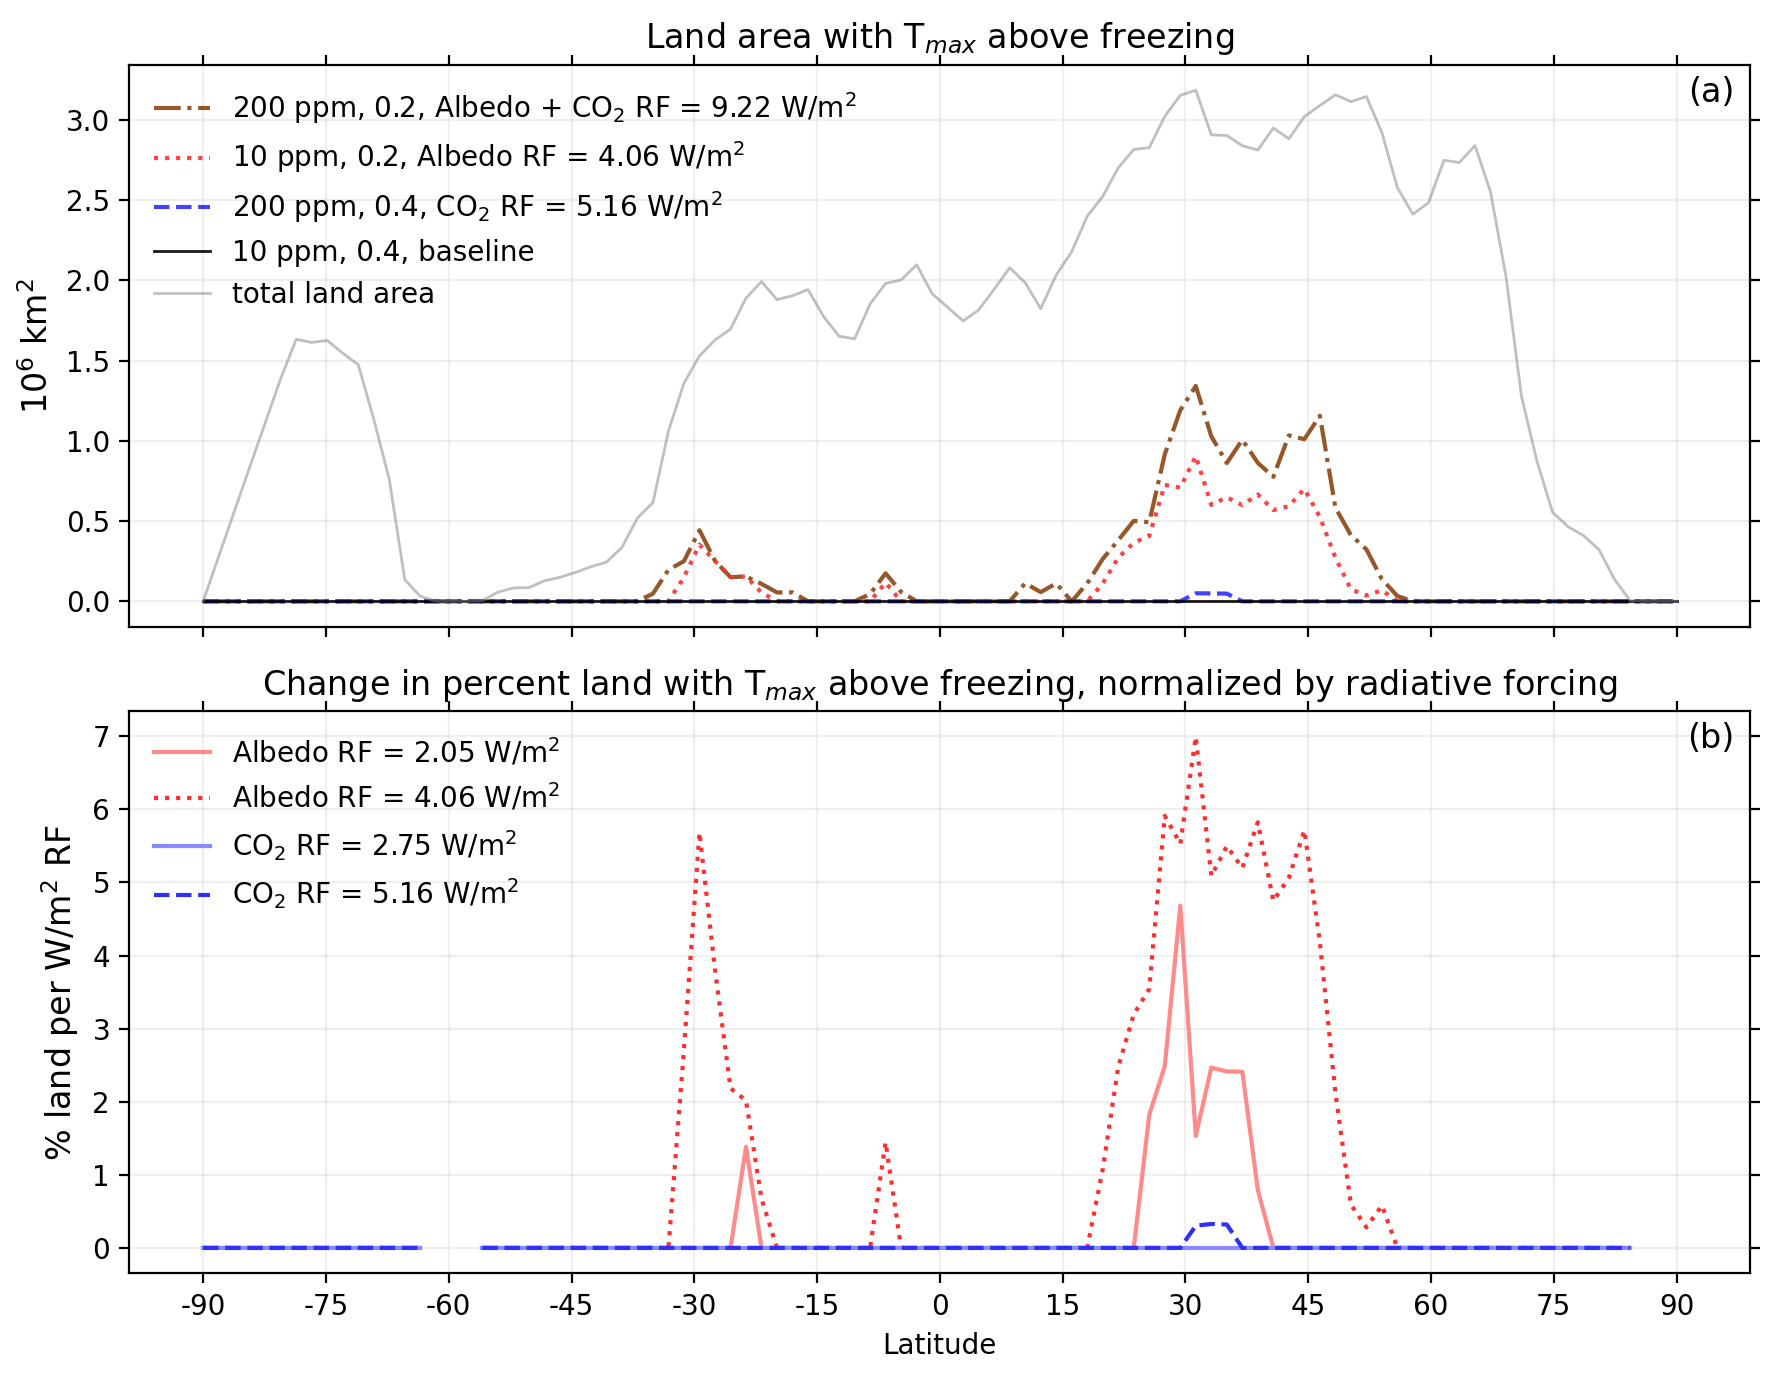

In [175]:
# combine these plots:

fig, (ax1, ax2) = plt.subplots(2,1, 
                               figsize = (9,7), 
                               sharex=True, dpi = 200)

### subplot a: land above freezing

a02_c200_warmland.plot(ax=ax1, x='lat', alpha=0.9, lw=1.5, ls='dashdot', 
                       color=run_color['moderncam4b_200p10p30a'], 
                       label=run_name_fig2a['moderncam4b_200p10p30a'])
a02_c010_warmland.plot(ax=ax1, x='lat', alpha=0.9, lw=1.5, ls='dotted', 
                       color=run_color['moderncam4b_010p10p30a'], 
                       label=run_name_fig2a['moderncam4b_010p10p30a'])
a04_c200_warmland.plot(ax=ax1, x='lat', alpha=0.9, lw=1.5, ls='dashed', 
                       color=run_color['moderncam4b_200p30p50a'], 
                       label=run_name_fig2a['moderncam4b_200p30p50a'])
a04_c010_warmland.plot(ax=ax1, x='lat', alpha=0.9, lw=1, ls='solid', 
                       color='k',label=run_name_fig2a['moderncam4b_010p30p50a'])
totalland.plot(ax = ax1, x = 'lat',  alpha = 0.5, lw = 1, color = 'grey',label = 'total land area',)


# subplot b: land above freezing normalized by radiative forcing

# a02_c200_warmland_normalized.plot(ax=ax2, x='lat', alpha=1, lw = 1.5, ls = 'dashdot', 
#                                   color = run_color['200co2_0.1alb_91tsi_bl99'],
#                                   label = run_name_fig2b['200co2_0.1alb_91tsi_bl99'],)
a03_c010_warmland_normalized.plot(ax=ax2, x='lat', alpha=1, lw = 1.5, ls = 'solid', 
                                  color = run_color['moderncam4b_010p20p40a'],
                                  label = run_name_fig2b['moderncam4b_010p20p40a'],)
a02_c010_warmland_normalized.plot(ax=ax2, x='lat', alpha=1, lw = 1.5, ls = 'dotted', 
                                  color = run_color['moderncam4b_010p10p30a'],
                                  label = run_name_fig2b['moderncam4b_010p10p30a'],)
a04_c050_warmland_normalized.plot(ax=ax2, x='lat', alpha=1, lw = 1.5, ls = 'solid', 
                                  color = run_color['moderncam4b_050p30p50a'],
                                  label = run_name_fig2b['moderncam4b_050p30p50a'],)
a04_c200_warmland_normalized.plot(ax=ax2, x='lat', alpha=1, lw = 1.5, ls = 'dashed', 
                                  color = run_color['moderncam4b_200p30p50a'],
                                  label = run_name_fig2b['moderncam4b_200p30p50a'],)

ax1.set_xticks(np.round(np.linspace(-90,90,13),1))
ax1.set_xticklabels((np.linspace(-90,90,13)).astype(int))
ax1.set_xlabel(None)
ax1.set_ylabel(r'$10^6$ km$^2$',fontsize=12)
ax1.set_title('')

ax1.text(.99, .98, 
        '(a)', ha='right', va='top', 
        transform=ax1.transAxes, fontsize=12)

ax2.set_xticks(np.round(np.linspace(-90,90,13),1))
ax2.set_xticklabels((np.linspace(-90,90,13)).astype(int))
ax2.set_ylabel(r'% land per W/m$^2$ RF',fontsize=12)
# ax2.set_ylim([-2,35])

ax1.set_title('Land area with T$_{max}$ above freezing', fontsize = 12)
ax2.set_title('Change in percent land with T$_{max}$ above freezing, normalized by radiative forcing', fontsize = 12)

ax2.text(.99, .98, 
        '(b)', ha='right', va='top', 
        transform=ax2.transAxes, fontsize=12)
# Add ticks on all sides of the box
ax1.tick_params(axis='both', which='both', direction='out', bottom=True, top=True, left=True, right=True)
ax2.tick_params(axis='both', which='both', direction='out', bottom=True, top=True, left=True, right=True)

# ax1.legend(loc=[1.01,0])
# ax2.legend(loc=[1.01,0])
ax2.set_xlabel('Latitude')
ax1.legend(loc='upper left',frameon=False)
ax2.legend(loc='upper left',frameon=False)
# plt.legend(loc=[-.5,0])

ax1.grid(True,alpha=0.2, zorder=0)
ax2.grid(True,alpha=0.2, zorder=0)

plt.tight_layout()

# Save the combined plot
filepath = 'JGRfigures/Fig3_combined'
fig.savefig(filepath + '.png', dpi=300, facecolor=None, edgecolor=None, bbox_inches='tight', transparent=True, pad_inches=0.01)

# Show the combined plot
plt.show()
plt.close()


In [83]:
print(a04_c050_warmland_normalized.values)

print(a04_c050_warmland.values)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. nan nan nan
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. nan nan nan]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Table 2

### Planetary Albedo

In [62]:
def calculate_planetary_albedo(run):
    albedo = (ds_atm[run]['FSUTOA']/ds_atm[run]['SOLIN'])
    # weights = area_grid

    FSUTOA_weighted = ds_atm[run]['FSUTOA']*np.cos(np.deg2rad(ds_atm[run]['FSUTOA'].lat))
    SOLIN_weighted = ds_atm[run]['SOLIN']*np.cos(np.deg2rad(ds_atm[run]['FSUTOA'].lat))
    # FSUTOA_weighted = (ds_atm[run]['FSUTOA']*area_grid)/(area_grid.sum('lat').sum('lon'))
    # SOLIN_weighted = (ds_atm[run]['SOLIN']*area_grid)/(area_grid.sum('lat').sum('lon'))
    FSUTOA_total = FSUTOA_weighted.sum('lat').sum('lon')
    SOLIN_total = SOLIN_weighted.sum('lat').sum('lon')
    albedo_weighted_mean = (FSUTOA_total/SOLIN_total).mean('time').values
    return albedo_weighted_mean

In [63]:
# Global average planetary albedo (using gw weights)
albedo_column={}
for run in runlist:
    albedo_column[run]=calculate_planetary_albedo(run)
    print(run_name[run], ':', albedo_column[run])
    

10 ppm, 0.1/0.3 albedo : 0.6611014844377388
10 ppm, 0.2/0.4 albedo : 0.6735713681864451
10 ppm, 0.3/0.5 albedo : 0.6854824070487372
25 ppm, 0.2/0.4 albedo : 0.6723549703699844
50 ppm, 0.1/0.3 albedo : 0.6586327741098479
50 ppm, 0.15/0.35 albedo : 0.6651355825980118
50 ppm, 0.2/0.4 albedo : 0.6713052070507802
50 ppm, 0.25/0.45 albedo : 0.6774227260655497
50 ppm, 0.3/0.5 albedo : 0.6833601217569103
100 ppm, 0.2/0.4 albedo : 0.6704083774603835
200 ppm, 0.1/0.3 albedo : 0.6567559788707806
200 ppm, 0.2/0.4 albedo : 0.6696309811786809
200 ppm, 0.3/0.5 albedo : 0.6817166557142648


In [64]:
# make into pandas dataframe, then save to csv

albedo_df=pd.DataFrame({'albedo_column':pd.Series(albedo_column)})

albedo_df.to_csv('JGRfigures/albedo_column.csv')

### Global mean surface temperature

In [66]:
def calculate_GMST(run):
    TS = ds_atm[run]['TS']
    weights = ds_atm[run]['gw'][0]/2
    # weights = area_grid
    TS_weighted = TS.weighted(weights)
    TS_weighted_mean = TS_weighted.mean(("lon", "lat")).mean('time').values
    return TS_weighted_mean

In [67]:
# Global average TS (using gw weights)
GMST_column={}
for run in runlist:
    GMST_column[run]= calculate_GMST(run)-273.15
    print(run_name[run], ':', GMST_column[run])
    

10 ppm, 0.1/0.3 albedo : -64.3550011976431
10 ppm, 0.2/0.4 albedo : -66.6943343201707
10 ppm, 0.3/0.5 albedo : -68.95817224175988
25 ppm, 0.2/0.4 albedo : -65.9755617489862
50 ppm, 0.1/0.3 albedo : -62.896781568869784
50 ppm, 0.15/0.35 albedo : -64.14247197342385
50 ppm, 0.2/0.4 albedo : -65.34103475596305
50 ppm, 0.25/0.45 albedo : -66.53575251999814
50 ppm, 0.3/0.5 albedo : -67.69338852938978
100 ppm, 0.2/0.4 albedo : -64.66963290005722
200 ppm, 0.1/0.3 albedo : -61.41834008407892
200 ppm, 0.2/0.4 albedo : -63.96122583508284
200 ppm, 0.3/0.5 albedo : -66.37384999927707


In [68]:
# make into pandas dataframe, then save to csv

GMST_df=pd.DataFrame({'GMST_column':pd.Series(GMST_column)})

GMST_df.to_csv('JGRfigures/GMST_column.csv')

### Radiative Forcing

In [69]:
# we made a dataarray of radiative forcing above
# called rf

RF_column=rf


# make into pandas dataframe, then save to csv

RF_df=pd.DataFrame({'RF_column':pd.Series(RF_column)})

RF_df.to_csv('JGRfigures/RF_column.csv')

### Change in percent land area reaching above freezing [%]

In [70]:
def percent_landarea_above_freezing_max(run):
    land = area_grid*gridcell_area['LANDFRAC'][0]
    land_warm = land.where(ds_atm[run]['TSMX'].groupby(ds_atm[run]['TSMX'].time.dt.year).max('time').mean('year') > 271.15)
    percent = area_grid.where(land_warm>0,0).sum('lon').sum('lat')/land.sum('lat').sum('lon')*100
    return percent

def percent_oceanarea_above_freezing_max(run):
    ocean = area_grid*(1-gridcell_area['LANDFRAC'][0])
    ocean_warm = ocean.where(ds_atm[run]['TSMX'].groupby(ds_atm[run]['TSMX'].time.dt.year).max('time').mean('year') > 271.15)
    percent = area_grid.where(ocean_warm>0,0).sum('lat').sum('lon')/ocean.sum('lat').sum('lon')*100
    return percent


In [71]:
# calculate percent land area above freezing during warmest month:
tmaxland_column={}
for run in runlist:
    tmaxland_column[run]=percent_landarea_above_freezing_max(run).values
    print(run_name[run], ':', tmaxland_column[run])
    # print(run, ':', np.round(percent_landarea_above_freezing_max(run).values,2))

10 ppm, 0.1/0.3 albedo : 7.051389323967127
10 ppm, 0.2/0.4 albedo : 0.8055607196203095
10 ppm, 0.3/0.5 albedo : 0.0
25 ppm, 0.2/0.4 albedo : 1.1054604763088505
50 ppm, 0.1/0.3 albedo : 9.793936506179628
50 ppm, 0.15/0.35 albedo : 4.38934624302448
50 ppm, 0.2/0.4 albedo : 1.652758299521222
50 ppm, 0.25/0.45 albedo : 0.40411668977502413
50 ppm, 0.3/0.5 albedo : 0.0
100 ppm, 0.2/0.4 albedo : 1.951514877374055
200 ppm, 0.1/0.3 albedo : 11.9731453769179
200 ppm, 0.2/0.4 albedo : 2.4703730441961236
200 ppm, 0.3/0.5 albedo : 0.0988298726794142


In [72]:
# make into pandas dataframe, then save to csv

tmaxland_df=pd.DataFrame({'tmaxland_column':pd.Series(tmaxland_column)})

tmaxland_df.to_csv('JGRfigures/tmaxland_column.csv')

In [73]:
# calculate percent ocean area above freezing during warmest month:
tmaxocean_column={}
for run in runlist:
    tmaxocean_column[run]=percent_oceanarea_above_freezing_max(run).values
    print(run_name[run], ':', tmaxocean_column[run])

10 ppm, 0.1/0.3 albedo : 0.6029428773036203
10 ppm, 0.2/0.4 albedo : 0.028514074853575537
10 ppm, 0.3/0.5 albedo : 0.0
25 ppm, 0.2/0.4 albedo : 0.09591852439755036
50 ppm, 0.1/0.3 albedo : 0.8312213797711054
50 ppm, 0.15/0.35 albedo : 0.3802275062554829
50 ppm, 0.2/0.4 albedo : 0.14831997492080579
50 ppm, 0.25/0.45 albedo : 0.028514074853575537
50 ppm, 0.3/0.5 albedo : 0.0
100 ppm, 0.2/0.4 albedo : 0.16159241223177703
200 ppm, 0.1/0.3 albedo : 1.1333972160109669
200 ppm, 0.2/0.4 albedo : 0.243535647345688
200 ppm, 0.3/0.5 albedo : 0.0


In [74]:
# make into pandas dataframe, then save to csv

tmaxocean_df=pd.DataFrame({'tmaxocean_column':pd.Series(tmaxocean_column)})

tmaxocean_df.to_csv('JGRfigures/tmaxocean_column.csv')

### land area with PE>P and Tmax>2C

In [142]:
# PET Calculation:
land_area_map = (area_grid*ds_atm[run]['LANDFRAC'][0])
total_land_area = (area_grid*ds_atm[run]['LANDFRAC'][0]).sum('lat').sum('lon')
print('dry warm land percent')

dry_land_percent_column={}
dry_warm_land_percent_column={}

Lv = 2260 # J/g
# Ls = 2830 # J/g
Ls = 2848
# Latent_heat = Lv
gperkg = 1000 # or JperkJ
mmperm = 1000
sperday = 60*60*24
dperyear = 365
rhoice = 900
rhowater = 1000

for run in runlist:
    P = (ds_atm[run]['PRECC']+ds_atm[run]['PRECL']).groupby(ds_atm[run]['PRECL'].time.dt.year).mean('time')* mmperm * sperday
    E = ((ds_atm[run]['LHFLX']/Lv).where(ds_atm[run]['TS'] > 273.15, (ds_atm[run]['LHFLX']/Ls))/gperkg).groupby(ds_atm[run]['LHFLX'].time.dt.year).mean('time') * sperday* rhoice/rhowater
    PET = PETcalc(run, Lv).where(ds_atm[run]['TS'].mean('time') > 273.15, PETcalc(run, Ls))
    
    dry = xr.where((PET>P).mean('year'),land_area_map,np.nan)
    dry_warm = dry.where(ds_atm[run]['TSMX'].groupby(ds_atm[run]['TSMX'].time.dt.year).max('time').mean('year') > 271.15)
    dry_warm_land = dry_warm.where(ds_atm[run]['LANDFRAC'][0]>0)
    dry_warm_land_area = area_grid.where(dry_warm_land>0,0)

    # save global areas
    dry_land_percent_column[run]=(dry.sum('lat').sum('lon')/land_area*100).values
    dry_warm_land_percent_column[run]=(dry_warm_land_area.sum('lat').sum('lon')/land_area*100).values
    print(run_name[run],' dry : ',dry_land_percent_column[run])
    print(run_name[run],' dry and warm: ',dry_warm_land_percent_column[run])


        # # PET Calculation:
        # PET = PETcalc(run, Lv).where(ds_atm[run]['TS'].mean('time') > 273.15, PETcalc(run, Ls))
        # P = (ds_atm[run]['PRECC']+ds_atm[run]['PRECL']).groupby(ds_atm[run]['PRECL'].time.dt.year).mean('time')* mmperm * sperday # mm/da
        # # E = (((ds_atm[run]['LHFLX']/(Lv*gperkg)).where(ds_atm[run]['TS'] > 273.15, (ds_atm[run]['LHFLX']/(Ls*gperkg)))).mean('time') * sperday )  #mm/d
        # E = ((ds_atm[run]['LHFLX']/(Ls*gperkg)).mean('time'))*sperday  #W/m2
        # mapdata = pi, (E - P).mean('year').where(ds_atm[run]['LANDFRAC'].mean('time') < 1, (PET - P).mean('year'))


dry warm land percent
calculating PET
calculating PET
10 ppm, 0.1/0.3 albedo  dry :  35.95113490003262
10 ppm, 0.1/0.3 albedo  dry and warm:  6.564170297780919
calculating PET
calculating PET
10 ppm, 0.2/0.4 albedo  dry :  30.67849047170821
10 ppm, 0.2/0.4 albedo  dry and warm:  0.8055607196203095
calculating PET
calculating PET
10 ppm, 0.3/0.5 albedo  dry :  24.452754168336856
10 ppm, 0.3/0.5 albedo  dry and warm:  0.0
calculating PET
calculating PET
25 ppm, 0.2/0.4 albedo  dry :  31.07867351449527
25 ppm, 0.2/0.4 albedo  dry and warm:  1.0389288395744263
calculating PET
calculating PET
50 ppm, 0.1/0.3 albedo  dry :  37.56705240298076
50 ppm, 0.1/0.3 albedo  dry and warm:  8.71776427726437
calculating PET
calculating PET
50 ppm, 0.15/0.35 albedo  dry :  34.42804311451267
50 ppm, 0.15/0.35 albedo  dry and warm:  4.269601125808826
calculating PET
calculating PET
50 ppm, 0.2/0.4 albedo  dry :  31.4701994308883
50 ppm, 0.2/0.4 albedo  dry and warm:  1.5532345649793402
calculating PET
calc

In [143]:
# make into pandas dataframe, then save to csv

dry_land_percent_df=pd.DataFrame({'dry_land_percent_column':pd.Series(dry_land_percent_column)})

dry_land_percent_df.to_csv('JGRfigures/dry_land_percent_column.csv')

# make into pandas dataframe, then save to csv

dry_warm_land_percent_df=pd.DataFrame({'dry_warm_land_percent_column':pd.Series(dry_warm_land_percent_column)})

dry_warm_land_percent_df.to_csv('JGRfigures/dry_warm_land_percent_column.csv')

### Assemble table

In [ ]:
# columns are : broadband, vis/nir, CO2, albedo, GMST, rf, land>-2C, land PE>P, land both, ocean>-2C



In [144]:
# Make dictionary for run names

co2_column = {}
co2_column = {
    'moderncam4b_010p10p30a' : '10',
    'moderncam4b_010p20p40a' : '10',
    'moderncam4b_010p30p50a' : '10',

    'moderncam4b_025p20p40a' : '25',

    'moderncam4b_050p10p30a' : '50',
    'moderncam4b_050p15p35a' : '50',
    'moderncam4b_050p20p40a' : '50',
    'moderncam4b_050p25p45a' : '50',
    'moderncam4b_050p30p50a' : '50',

    'moderncam4b_100p20p40a' : '100',
    'moderncam4b_100p30p50a' : '100',

    'moderncam4b_200p10p30a' : '200',
    'moderncam4b_200p20p40a' : '200',
    'moderncam4b_200p30p50a' : '200',
}

In [145]:
# Make dictionary for run names

albedoname_column = {}
albedoname_column = {
    'moderncam4b_010p10p30a' : '0.1/0.3',
    'moderncam4b_010p20p40a' : '0.2/0.4',
    'moderncam4b_010p30p50a' : '0.3/0.5',

    'moderncam4b_025p20p40a' : '0.2/0.4',

    'moderncam4b_050p10p30a' : '0.1/0.3',
    'moderncam4b_050p15p35a' : '0.15/0.35',
    'moderncam4b_050p20p40a' : '0.2/0.4',
    'moderncam4b_050p25p45a' : '0.25/0.45',
    'moderncam4b_050p30p50a' : '0.3/0.5',

    'moderncam4b_100p20p40a' : '0.2/0.4',
    'moderncam4b_100p30p50a' : '0.3/0.5',

    'moderncam4b_200p10p30a' : '0.1/0.3',
    'moderncam4b_200p20p40a' : '0.2/0.4',
    'moderncam4b_200p30p50a' : '0.3/0.5',
}

In [146]:
# Make dictionary for run names

broadband_column = {}
broadband_column = {
    'moderncam4b_010p10p30a' : '0.2',
    'moderncam4b_010p20p40a' : '0.3',
    'moderncam4b_010p30p50a' : '0.4',

    'moderncam4b_025p20p40a' : '0.3',

    'moderncam4b_050p10p30a' : '0.2',
    'moderncam4b_050p15p35a' : '0.25',
    'moderncam4b_050p20p40a' : '0.2/0.4',
    'moderncam4b_050p25p45a' : '0.35',
    'moderncam4b_050p30p50a' : '0.4',

    'moderncam4b_100p20p40a' : '0.3',
    'moderncam4b_100p30p50a' : '0.4',

    'moderncam4b_200p10p30a' : '0.2',
    'moderncam4b_200p20p40a' : '0.3',
    'moderncam4b_200p30p50a' : '0.4',
}

In [147]:
# merge dictionaries into a pandas dataframe


merged_table=pd.DataFrame({'Broadband solar':pd.Series(broadband_column),
                           'Visible/near-IR':pd.Series(albedoname_column),
                           'CO2 (ppm)':pd.Series(co2_column),
                           'Global average planetary albedo':pd.Series(albedo_column),
                           'Global mean surface temperature (C)':pd.Series(GMST_column),
                           'Radiative forcing (W m-2) relative to 10ppm, albedo 0.4':pd.Series(RF_column),
                           'Percent of land area with Tmax>-2C in warmest month':pd.Series(tmaxland_column),
                           'Percent of land area with PE>P in annual mean':pd.Series(dry_land_percent_column),
                           'Percent of land area with PE>P and Tmax>-2C':pd.Series(dry_warm_land_percent_column),
                           'Percent of ocean area with PE>P and Tmax>-2C':pd.Series(tmaxocean_column)                     
                          })



In [148]:
merged_table.to_csv('JGRfigures/merged_table.csv')

In [149]:
merged_table

Broadband solar Visible/near-IR CO2 (ppm)  \
moderncam4b_010p10p30a             0.2         0.1/0.3        10   
moderncam4b_010p20p40a             0.3         0.2/0.4        10   
moderncam4b_010p30p50a             0.4         0.3/0.5        10   
moderncam4b_025p20p40a             0.3         0.2/0.4        25   
moderncam4b_050p10p30a             0.2         0.1/0.3        50   
moderncam4b_050p15p35a            0.25       0.15/0.35        50   
moderncam4b_050p20p40a         0.2/0.4         0.2/0.4        50   
moderncam4b_050p25p45a            0.35       0.25/0.45        50   
moderncam4b_050p30p50a             0.4         0.3/0.5        50   
moderncam4b_100p20p40a             0.3         0.2/0.4       100   
moderncam4b_100p30p50a             0.4         0.3/0.5       100   
moderncam4b_200p10p30a             0.2         0.1/0.3       200   
moderncam4b_200p20p40a             0.3         0.2/0.4       200   
moderncam4b_200p30p50a             0.4         0.3/0.5       200   

                       Global average planetary albedo  \
moderncam4b_010p10p30a              0.6611014844377388   
moderncam4b_010p20p40a              0.6735713681864451   
moderncam4b_010p30p50a              0.6854824070487372   
moderncam4b_025p20p40a              0.6723549703699844   
moderncam4b_050p10p30a              0.6586327741098479   
moderncam4b_050p15p35a              0.6651355825980118   
moderncam4b_050p20p40a              0.6713052070507802   
moderncam4b_050p25p45a              0.6774227260655497   
moderncam4b_050p30p50a              0.6833601217569103   
moderncam4b_100p20p40a              0.6704083774603835   
moderncam4b_100p30p50a                             NaN   
moderncam4b_200p10p30a              0.6567559788707806   
moderncam4b_200p20p40a              0.6696309811786809   
moderncam4b_200p30p50a              0.6817166557142648   

                        Global mean surface temperature (C)  \
moderncam4b_010p10p30a                           -64.355001   
moderncam4b_010p20p40a                           -66.694334   
moderncam4b_010p30p50a                           -68.958172   
moderncam4b_025p20p40a                           -65.975562   
moderncam4b_050p10p30a                           -62.896782   
moderncam4b_050p15p35a                           -64.142472   
moderncam4b_050p20p40a                           -65.341035   
moderncam4b_050p25p45a                           -66.535753   
moderncam4b_050p30p50a                           -67.693389   
moderncam4b_100p20p40a                           -64.669633   
moderncam4b_100p30p50a                                  NaN   
moderncam4b_200p10p30a                           -61.418340   
moderncam4b_200p20p40a                           -63.961226   
moderncam4b_200p30p50a                           -66.373850   

                        Radiative forcing (W m-2) relative to 10ppm, albedo 0.4  \
moderncam4b_010p10p30a                                           4.062648         
moderncam4b_010p20p40a                                           2.051639         
moderncam4b_010p30p50a                                           0.000000         
moderncam4b_025p20p40a                                           3.598615         
moderncam4b_050p10p30a                                           6.814429         
moderncam4b_050p15p35a                                           5.813843         
moderncam4b_050p20p40a                                           4.803420         
moderncam4b_050p25p45a                                           3.782843         
moderncam4b_050p30p50a                                           2.751781         
moderncam4b_100p20p40a                                           5.993767         
moderncam4b_100p30p50a                                                NaN         
moderncam4b_200p10p30a                                           9.224963         
moderncam4b_200p20p40a                                           7.213953         
moderncam4b_200p30p50a 

In [95]:
# how to retrieve one row using run name
merged_table.loc[['moderncam4b_200p30p50a']]

Broadband solar Visible/near-IR CO2 (ppm)  \
moderncam4b_200p30p50a             0.4         0.3/0.5       200   

                       Global average planetary albedo  \
moderncam4b_200p30p50a              0.6817166557142648   

                        Global mean surface temperature (C)  \
moderncam4b_200p30p50a                            -66.37385   

                        Radiative forcing (W m-2) relative to 10ppm, albedo 0.4  \
moderncam4b_200p30p50a                                           5.162315         

                       Percent of land area with Tmax>-2C in warmest month  \
moderncam4b_200p30p50a                                 0.0988298726794142    

                       Percent of land area with PE>P in annual mean  \
moderncam4b_200p30p50a                        2.8468101197879654e-12   

                       Percent of land area with PE>P and Tmax>-2C  \
moderncam4b_200p30p50a                          0.0988298726794142   

                       Percent of ocean area with PE>P and Tmax>-2C  
moderncam4b_200p30p50a                                          0.0

In [152]:
printrunlist=['moderncam4b_010p30p50a',
              'moderncam4b_050p30p50a',
              'moderncam4b_200p30p50a',
              'moderncam4b_050p25p45a',
              'moderncam4b_010p20p40a',
              'moderncam4b_025p20p40a',
              'moderncam4b_050p20p40a',
              'moderncam4b_100p20p40a',
              'moderncam4b_200p20p40a',
              'moderncam4b_050p15p35a',
              'moderncam4b_010p10p30a',
              'moderncam4b_050p10p30a',
              'moderncam4b_200p10p30a']


# 0.4	0.3/0.5	10
# 0.4	0.3/0.5	50
# 0.4	0.3/0.5	200
# 0.35	0.25/0.45	50
# 0.3	0.2/0.4	10
# 0.3	0.2/0.4	25
# 0.3	0.2/0.4	50
# 0.3	0.2/0.4	100
# 0.3	0.2/0.4	200
# 0.25	0.15/0.35	50
# 0.2	0.1/0.3	10
# 0.2	0.1/0.3	50
# 0.2	0.1/0.3	200


In [153]:
merged_table_print=merged_table.loc[printrunlist]

merged_table_print.to_csv('JGRfigures/merged_table_print.csv')

In [154]:
merged_table_print

Broadband solar Visible/near-IR CO2 (ppm)  \
moderncam4b_010p30p50a             0.4         0.3/0.5        10   
moderncam4b_050p30p50a             0.4         0.3/0.5        50   
moderncam4b_200p30p50a             0.4         0.3/0.5       200   
moderncam4b_050p25p45a            0.35       0.25/0.45        50   
moderncam4b_010p20p40a             0.3         0.2/0.4        10   
moderncam4b_025p20p40a             0.3         0.2/0.4        25   
moderncam4b_050p20p40a         0.2/0.4         0.2/0.4        50   
moderncam4b_100p20p40a             0.3         0.2/0.4       100   
moderncam4b_200p20p40a             0.3         0.2/0.4       200   
moderncam4b_050p15p35a            0.25       0.15/0.35        50   
moderncam4b_010p10p30a             0.2         0.1/0.3        10   
moderncam4b_050p10p30a             0.2         0.1/0.3        50   
moderncam4b_200p10p30a             0.2         0.1/0.3       200   

                       Global average planetary albedo  \
moderncam4b_010p30p50a              0.6854824070487372   
moderncam4b_050p30p50a              0.6833601217569103   
moderncam4b_200p30p50a              0.6817166557142648   
moderncam4b_050p25p45a              0.6774227260655497   
moderncam4b_010p20p40a              0.6735713681864451   
moderncam4b_025p20p40a              0.6723549703699844   
moderncam4b_050p20p40a              0.6713052070507802   
moderncam4b_100p20p40a              0.6704083774603835   
moderncam4b_200p20p40a              0.6696309811786809   
moderncam4b_050p15p35a              0.6651355825980118   
moderncam4b_010p10p30a              0.6611014844377388   
moderncam4b_050p10p30a              0.6586327741098479   
moderncam4b_200p10p30a              0.6567559788707806   

                        Global mean surface temperature (C)  \
moderncam4b_010p30p50a                           -68.958172   
moderncam4b_050p30p50a                           -67.693389   
moderncam4b_200p30p50a                           -66.373850   
moderncam4b_050p25p45a                           -66.535753   
moderncam4b_010p20p40a                           -66.694334   
moderncam4b_025p20p40a                           -65.975562   
moderncam4b_050p20p40a                           -65.341035   
moderncam4b_100p20p40a                           -64.669633   
moderncam4b_200p20p40a                           -63.961226   
moderncam4b_050p15p35a                           -64.142472   
moderncam4b_010p10p30a                           -64.355001   
moderncam4b_050p10p30a                           -62.896782   
moderncam4b_200p10p30a                           -61.418340   

                        Radiative forcing (W m-2) relative to 10ppm, albedo 0.4  \
moderncam4b_010p30p50a                                           0.000000         
moderncam4b_050p30p50a                                           2.751781         
moderncam4b_200p30p50a                                           5.162315         
moderncam4b_050p25p45a                                           3.782843         
moderncam4b_010p20p40a                                           2.051639         
moderncam4b_025p20p40a                                           3.598615         
moderncam4b_050p20p40a                                           4.803420         
moderncam4b_100p20p40a                                           5.993767         
moderncam4b_200p20p40a                                           7.213953         
moderncam4b_050p15p35a                                           5.813843         
moderncam4b_010p10p30a                                           4.062648         
moderncam4b_050p10p30a                                           6.814429         
moderncam4b_200p10p30a                                           9.224963         

                       Percent of land area with Tmax>-2C in warmest month  \
moderncam4b_010p30p50a                                                0.0    
moderncam4b_050p30p50a                                 

# Other calculations

In [94]:
def percent_landarea_above_freezing_mean(run):
    land = area_grid*gridcell_area['LANDFRAC'][0]
    land_warm = land.where(ds_atm[run]['TSMX'].mean('time') > 271.15)
    percent = area_grid.where(land_warm>0,0).sum('lon').sum('lat')/land.sum('lat').sum('lon')*100
    return percent

def percent_oceanarea_above_freezing_mean(run):
    ocean = area_grid*(1-gridcell_area['LANDFRAC'][0])
    ocean_warm = ocean.where(ds_atm[run]['TSMX'].mean('time') > 271.15)
    percent = area_grid.where(ocean_warm>0,0).sum('lat').sum('lon')/ocean.sum('lat').sum('lon')*100
    return percent

In [586]:
# calculate percent land area above freezing on annual mean:
tmeanland_column={}
for run in runlist:
    tmeanland_column[run]=percent_landarea_above_freezing_mean(run).values
    print(run, ':', tmeanland_column[run])

moderncam4b_010p10p30a : 0.7342286452657726
moderncam4b_010p20p40a : 0.0
moderncam4b_010p30p50a : 0.0
moderncam4b_025p20p40a : 0.0
moderncam4b_050p10p30a : 0.9763924846600145
moderncam4b_050p15p35a : 0.07035591628358948
moderncam4b_050p20p40a : 0.0
moderncam4b_050p25p45a : 0.0
moderncam4b_050p30p50a : 0.0
moderncam4b_100p20p40a : 0.0
moderncam4b_200p10p30a : 1.222519897461369
moderncam4b_200p20p40a : 0.0
moderncam4b_200p30p50a : 0.0


In [599]:
# calculate percent ocean area above freezing in annual mean:
tmeanocean_column={}
for run in runlist:
    tmeanocean_column[run]=percent_oceanarea_above_freezing_mean(run).values
    print(run, ':', tmeanocean_column[run])

moderncam4b_010p10p30a : 0.028514074853575537
moderncam4b_010p20p40a : 0.0
moderncam4b_010p30p50a : 0.0
moderncam4b_025p20p40a : 0.0
moderncam4b_050p10p30a : 0.05650235748519577
moderncam4b_050p15p35a : 0.0
moderncam4b_050p20p40a : 0.0
moderncam4b_050p25p45a : 0.0
moderncam4b_050p30p50a : 0.0
moderncam4b_100p20p40a : 0.0
moderncam4b_200p10p30a : 0.05650235748519577
moderncam4b_200p20p40a : 0.0
moderncam4b_200p30p50a : 0.0


# Maybe delete everthing below this?

In [590]:
total_land = (gridcell_area['LANDFRAC'][0]*area_grid).sum('lat').sum('lon').values

In [591]:
# Column 7: Percent of land area reaching above freezing in warmest month:

for run in runlist:
    pct_change_from_ctl = (landarea_above_freezing_zonal(run).sum('lat')/(total_land)).values*100
    print(run_name[run], ':', pct_change_from_ctl)

10 ppm, 0.1/0.3 albedo : 1.1402808939924368e-05
10 ppm, 0.2/0.4 albedo : 2.991549791250659e-06
10 ppm, 0.4 albedo : 9.882987267941421e-08
25 ppm, 0.2/0.4 albedo : 3.3375361225986344e-06
50 ppm, 0.1/0.3 albedo : 1.3926359904765023e-05
50 ppm, 0.15/0.35 albedo : 8.645418600860585e-06
50 ppm, 0.3 albedo : 3.879531722233958e-06
50 ppm, 0.25/0.45 albedo : 1.3606589953446253e-06
50 ppm, 0.3/0.5 albedo : 2.3150185655477988e-07
100 ppm, 0.2/0.4 albedo : 5.029103993787595e-06
200 ppm, 0.2 albedo : 1.5908432431821133e-05
200 ppm, 0.2/0.4 albedo : 5.483157001066258e-06
200 ppm, 0.3/0.5 albedo : 5.384252417287652e-07


In [108]:
print('10 ppm, 0.1/0.3 albedo :', 29.905073636765415- 23.74654131766592)
print('10 ppm, 0.2/0.4 albedo :', 15.882099609020232-23.74654131766592)
print('10 ppm, 0.3/0.5 albedo :', 4.114612231420827-23.74654131766592)
print('25 ppm, 0.2/0.4 albedo :', 21.976702497074285-23.74654131766592)
print('50 ppm, 0.1/0.3 albedo :', 35.90183780065965-23.74654131766592)
print('50 ppm, 0.15/0.35 albedo :', 31.300984601773823-23.74654131766592)
print('50 ppm, 0.2/0.4 albedo :', 23.74654131766592-23.74654131766592)
print('50 ppm, 0.25/0.45 albedo :', 17.998303927239263-23.74654131766592)
print('50 ppm, 0.3/0.5 albedo :', 10.867562368771246-23.74654131766592)
print('100 ppm, 0.2/0.4 albedo :', 28.225059457817487-23.74654131766592)
print('100 ppm, 0.3/0.5 albedo :', 14.219524972988475-23.74654131766592)
print('200 ppm, 0.1/0.3 albedo :', 41.167199229990054-23.74654131766592)
print('200 ppm, 0.2/0.4 albedo :', 30.60339309148816-23.74654131766592)
print('200 ppm, 0.3/0.5 albedo :', 16.73310513672422-23.74654131766592)

10 ppm, 0.1/0.3 albedo : 6.158532319099496
10 ppm, 0.2/0.4 albedo : -7.864441708645687
10 ppm, 0.3/0.5 albedo : -19.631929086245094
25 ppm, 0.2/0.4 albedo : -1.7698388205916338
50 ppm, 0.1/0.3 albedo : 12.15529648299373
50 ppm, 0.15/0.35 albedo : 7.554443284107904
50 ppm, 0.2/0.4 albedo : 0.0
50 ppm, 0.25/0.45 albedo : -5.748237390426656
50 ppm, 0.3/0.5 albedo : -12.878978948894673
100 ppm, 0.2/0.4 albedo : 4.478518140151568
100 ppm, 0.3/0.5 albedo : -9.527016344677444
200 ppm, 0.1/0.3 albedo : 17.420657912324135
200 ppm, 0.2/0.4 albedo : 6.8568517738222425
200 ppm, 0.3/0.5 albedo : -7.013436180941699


In [117]:
run_ctl = runlist[6]
total_land_above_freezing_ctl = ((landarea_above_freezing_zonal(run_ctl))/1e6).sum('lat').values
for run in runlist:
    total_land_above_freezing = ((landarea_above_freezing_zonal(run))/1e6).sum('lat').values
    print(run_name[run], ':', total_land_above_freezing)
    print('percent:', (total_land_above_freezing/total_land*1e6)*100, 'change in percent:', (total_land_above_freezing/total_land*1e6)*100 - (total_land_above_freezing_ctl/total_land*1e6)*100)

10 ppm, 0.1/0.3 albedo : 44.49410809147666
percent: 29.905073636765415 change in percent: 6.158532319099496
10 ppm, 0.2/0.4 albedo : 23.630099203453383
percent: 15.882099609020228 change in percent: -7.864441708645691
10 ppm, 0.3/0.5 albedo : 6.121904383284175
percent: 4.114612231420827 change in percent: -19.631929086245094
25 ppm, 0.2/0.4 albedo : 32.6979223751817
percent: 21.976702497074285 change in percent: -1.7698388205916338
50 ppm, 0.1/0.3 albedo : 53.41636242692071
percent: 35.901837800659656 change in percent: 12.155296482993737
50 ppm, 0.15/0.35 albedo : 46.57100695210356
percent: 31.300984601773823 change in percent: 7.554443284107904
50 ppm, 0.2/0.4 albedo : 35.331167848654914
percent: 23.74654131766592 change in percent: 0.0
50 ppm, 0.25/0.45 albedo : 26.778682779008555
percent: 17.998303927239267 change in percent: -5.748237390426652
50 ppm, 0.3/0.5 albedo : 16.16924608179205
percent: 10.867562368771248 change in percent: -12.878978948894671
100 ppm, 0.2/0.4 albedo : 41.

In [222]:
def landarea_above_freezing_zonal_mean(run):
    land = area_grid*gridcell_area['LANDFRAC'][0]
    land_warm = land.where(ds_atm[run]['TS'].groupby(ds_atm[run]['TS'].time.dt.year).mean('time').mean('year') > 271.15)
    zonal_land_warm = land_warm.sum('lon')
    zonal_land_warm_km2 = (zonal_land_warm/(1000**2))
    return zonal_land_warm_km2

In [595]:
ocean = oceanarea(runlist[2])

In [596]:
total_ocean = ocean.sum('lat').values
total_ocean

array(3.61237706e+08)

In [594]:
def oceanarea_above_freezing_zonal_mean(run):
    land = area_grid*(1-gridcell_area['LANDFRAC'][0])
    ocean_warm = ocean.where(ds_atm[run]['TS'].groupby(ds_atm[run]['TS'].time.dt.year).mean('time').mean('year') > 271.15)
    zonal_ocean_warm = ocean_warm.sum('lon')
    zonal_ocean_warm_km2 = (zonal_ocean_warm/(1000**2))
    return zonal_ocean_warm_km2

In [116]:
run_ctl = runlist[6]
total_land_above_freezing_ctl = ((landarea_above_freezing_zonal_mean(run_ctl))/1e6).sum('lat').values
for run in runlist:
    total_land_above_freezing = ((landarea_above_freezing_zonal_mean(run))/1e6).sum('lat').values
    print(run_name[run], ':', total_land_above_freezing)
    print('percent:', (total_land_above_freezing/total_land*1e6)*100, 'change in percent:', (total_land_above_freezing/total_land*1e6)*100 - (total_land_above_freezing_ctl/total_land*1e6)*100)

10 ppm, 0.1/0.3 albedo : 2.122836487118937
percent: 1.4267862462955003 change in percent: 1.177778351438875
10 ppm, 0.2/0.4 albedo : 0.0
percent: 0.0 change in percent: -0.24900789485662517
10 ppm, 0.3/0.5 albedo : 0.0
percent: 0.0 change in percent: -0.24900789485662517
25 ppm, 0.2/0.4 albedo : 0.0
percent: 0.0 change in percent: -0.24900789485662517
50 ppm, 0.1/0.3 albedo : 7.804877658064624
percent: 5.245760643420543 change in percent: 4.996752748563918
50 ppm, 0.15/0.35 albedo : 4.344415971434474
percent: 2.9199389561283358 change in percent: 2.6709310612717108
50 ppm, 0.2/0.4 albedo : 0.3704850997511237
percent: 0.24900789485662517 change in percent: 0.0
50 ppm, 0.25/0.45 albedo : 0.0
percent: 0.0 change in percent: -0.24900789485662517
50 ppm, 0.3/0.5 albedo : 0.0
percent: 0.0 change in percent: -0.24900789485662517
100 ppm, 0.2/0.4 albedo : 2.0204665443000387
percent: 1.3579820650340928 change in percent: 1.1089741701774676
100 ppm, 0.3/0.5 albedo : 0.0
percent: 0.0 change in pe

In [ ]:
for run in runlist:
    print(run, (oceanarea_above_freezing_zonal(run).sum('lat')/total_ocean*100).values)
    # print(run, (oceanarea_above_freezing_zonal(run).sum('lat')/total_ocean*100).values-(oceanarea_above_freezing_zonal(runlist[6]).sum('lat')/total_ocean*100).values)

010co2_0.1alb_91tsi_bl99 0.4429915833562966


In [231]:
for run in runlist:
    print(run, (oceanarea_above_freezing_zonal_mean(run).sum('lat')/total_ocean*100).values)
    # print(run, (oceanarea_above_freezing_zonal_mean(run).sum('lat')/total_ocean*100).values-(oceanarea_above_freezing_zonal_mean(runlist[6]).sum('lat')/total_ocean*100).values)

010co2_0.1alb_91tsi_bl99 0.00016977983986848439
010co2_0.2alb_91tsi_bl99 0.0
010co2_0.3alb_91tsi_bl99 0.0
025co2_0.2alb_91tsi_bl99 2.9786159245893686e-05
050co2_0.1alb_91tsi_bl99 0.00031372588247473304
050co2_0.15alb_91tsi_bl99 0.00022748027096664063
050co2_0.2alb_91tsi_bl99 5.488287058430704e-05
050co2_0.25alb_91tsi_bl99 0.0
050co2_0.3alb_91tsi_bl99 0.0
100co2_0.2alb_91tsi_bl99 0.0001627158241254562
100co2_0.3alb_91tsi_bl99 0.0
200co2_0.1alb_91tsi_bl99 0.0005105343047062031
200co2_0.2alb_91tsi_bl99 0.00022487152610435604
200co2_0.3alb_91tsi_bl99 2.7782508910801196e-06


In [144]:
for run in runlist:
    print(run, (oceanarea_above_freezing_zonal_mean(run).sum('lat')/total_ocean*100).values)
    print(run, (oceanarea_above_freezing_zonal_mean(run).sum('lat')/total_ocean*100).values-(oceanarea_above_freezing_zonal_mean(runlist[6]).sum('lat')/total_ocean*100).values)

010co2_0.1alb_91tsi_bl99 5.671870062595886e-05
010co2_0.1alb_91tsi_bl99 4.752781707368631e-05
010co2_0.2alb_91tsi_bl99 0.0
010co2_0.2alb_91tsi_bl99 -9.190883552272548e-06
010co2_0.3alb_91tsi_bl99 0.0
010co2_0.3alb_91tsi_bl99 -9.190883552272548e-06
025co2_0.2alb_91tsi_bl99 0.0
025co2_0.2alb_91tsi_bl99 -9.190883552272548e-06
050co2_0.1alb_91tsi_bl99 0.0002114159178411782
050co2_0.1alb_91tsi_bl99 0.00020222503428890567
050co2_0.15alb_91tsi_bl99 0.00011354703950594817
050co2_0.15alb_91tsi_bl99 0.00010435615595367562
050co2_0.2alb_91tsi_bl99 9.190883552272548e-06
050co2_0.2alb_91tsi_bl99 0.0
050co2_0.25alb_91tsi_bl99 0.0
050co2_0.25alb_91tsi_bl99 -9.190883552272548e-06
050co2_0.3alb_91tsi_bl99 0.0
050co2_0.3alb_91tsi_bl99 -9.190883552272548e-06
100co2_0.2alb_91tsi_bl99 5.2489700152026103e-05
100co2_0.2alb_91tsi_bl99 4.3298816599753554e-05
100co2_0.3alb_91tsi_bl99 0.0
100co2_0.3alb_91tsi_bl99 -9.190883552272548e-06
200co2_0.1alb_91tsi_bl99 0.00035002959949762897
200co2_0.1alb_91tsi_bl99 0.00

## Assemble data columns into a table

In [ ]:
 # #-- add output to a pandas data frames
column_names=["Total C [PgC]", "% Vegetation", "% Litter", "% Soil"]
row_names = index_mdls
data_arrays = [initialC, emissC, AfterNZ, CumNZ]
group_names = ["Initial Carbon Content","Delta after Emissions Phase", "Following Net-Zero Emissions", "At Cumulative Zero Emissions"]


In [ ]:
## -older code below

In [81]:
# 2/7/24
run_name_mod = {}
run_name_mod = {'moderncam4b_010p10p30a': '10 ppm, 0.2 albedo',
 'moderncam4b_010p20p40a': '10 ppm, 0.3 albedo',
 'moderncam4b_010p30p50a': '10 ppm, 0.4 albedo',
 'moderncam4b_025p20p40a': '25 ppm, 0.3 albedo',
 'moderncam4b_050p10p30a': '50 ppm, 0.2 albedo',
 'moderncam4b_050p15p35a': '50 ppm, 0.25 albedo',
 'moderncam4b_050p20p40a': '50 ppm, 0.3 albedo',
 'moderncam4b_050p25p45a': '50 ppm, 0.35 albedo',
 'moderncam4b_050p30p50a': '50 ppm, 0.4 albedo',
 'moderncam4b_100p20p40a': '100 ppm, 0.3 albedo',
 'moderncam4b_100p30p50a': '100 ppm, 0.4 albedo',
 'moderncam4b_200p10p30a': '200 ppm, 0.2 albedo',
 'moderncam4b_200p20p40a': '200 ppm, 0.3 albedo',
 'moderncam4b_200p30p50a': '200 ppm, 0.4 albedo'}

In [237]:
# Percent of Land Area with PE>P in Annual Mean
# Attempting to use function used to make plot:

total_land = area_grid.sum('lat').sum('lon')
for run in runlist:
    PEminusP_land = mapdata('PE-P', run)[1].where(ds_atm[run]['LANDFRAC'][0]>0,0) # PE - P for land
    netevap_land = area_grid.where(PEminusP_land > 0, 1, 0)
    percent_net_evap = (((netevap_land.sum('lat').sum('lon'))/total_land)*100).values
    print(f'{run_name_mod[run]}: {percent_net_evap}')

calculating PET
calculating PET
10 ppm, 0.2 albedo: 9.83828149362473
calculating PET
calculating PET
10 ppm, 0.3 albedo: 8.620588722504426
calculating PET
calculating PET
10 ppm, 0.4 albedo: 8.390648685260384
calculating PET
calculating PET
25 ppm, 0.3 albedo: 8.659437011471164
calculating PET
calculating PET
50 ppm, 0.2 albedo: 10.14836491682278
calculating PET
calculating PET
50 ppm, 0.25 albedo: 9.46671351050479
calculating PET
calculating PET
50 ppm, 0.3 albedo: 8.774504399282536
calculating PET
calculating PET
50 ppm, 0.35 albedo: 8.642038332449435
calculating PET
calculating PET
50 ppm, 0.4 albedo: 8.4247728823633
calculating PET
calculating PET
100 ppm, 0.3 albedo: 9.00314782343711
calculating PET
calculating PET
200 ppm, 0.2 albedo: 10.380881512043608
calculating PET
calculating PET
200 ppm, 0.3 albedo: 9.1249421465223
calculating PET
calculating PET
200 ppm, 0.4 albedo: 8.587780687142645


In [56]:
# (this has been run) but it calculates percent of land that has PET>P and T>-2

run_ctl = runlist[6]

P_ctl = (ds_atm[run_ctl]['PRECC']+ds_atm[run_ctl]['PRECL']).groupby(ds_atm[run_ctl]['PRECL'].time.dt.year).mean('time')* mmperm * sperday
E_ctl = ((ds_atm[run_ctl]['LHFLX']/Lv).where(ds_atm[run_ctl]['TS'] > 273.15, (ds_atm[run_ctl]['LHFLX']/Ls))/gperkg).groupby(ds_atm[run_ctl]['LHFLX'].time.dt.year).mean('time') * sperday * rhoice/rhowater
PET_ctl = PETcalc(run_ctl, Lv).where(ds_atm[run_ctl]['TS'].mean('time') > 273.15, PETcalc(run_ctl, Ls))

ones = xr.full_like(ds_atm[run_ctl]['TS'][0,:,:], 1)
# ones.plot()
zeros = xr.full_like(ds_atm[run_ctl]['TS'][0,:,:], 0)
# zeros.plot()
net_evap_ctl = xr.where((PET_ctl-P_ctl).mean('year')>0, 1, 0)*area_grid
# net_evap.plot()
percent_net_evap_ctl = (((net_evap_ctl.sum('lat').sum('lon'))/total_land)*100).values
for run in runlist:
    P = (ds_atm[run]['PRECC']+ds_atm[run]['PRECL']).groupby(ds_atm[run]['PRECL'].time.dt.year).mean('time')* mmperm * sperday

    E = ((ds_atm[run]['LHFLX']/Lv).where(ds_atm[run]['TS'] > 273.15, (ds_atm[run]['LHFLX']/Ls))/gperkg).groupby(ds_atm[run]['LHFLX'].time.dt.year).mean('time') * sperday* rhoice/rhowater

    PET = PETcalc(run, Lv).where(ds_atm[run]['TS'].mean('time') > 273.15, PETcalc(run, Ls))
    net_evap = xr.where((PET-P).mean('year')>0, 1, 0)*area_grid
    percent_net_evap = (((net_evap.sum('lat').sum('lon'))/total_land)*100).values
    change_percent_net_evap = percent_net_evap - percent_net_evap_ctl
    print(run, '% net evap:', percent_net_evap, '|', 'change in % net evap:', change_percent_net_evap)

calculating PET
calculating PET


In [592]:
# (this has been run) but it calculates percent of land that has PET>P and T>-2

run_ctl = runlist[6]

P_ctl = (ds_atm[run_ctl]['PRECC']+ds_atm[run_ctl]['PRECL']).groupby(ds_atm[run_ctl]['PRECL'].time.dt.year).mean('time')* mmperm * sperday
E_ctl = ((ds_atm[run_ctl]['LHFLX']/Lv).where(ds_atm[run_ctl]['TS'] > 273.15, (ds_atm[run_ctl]['LHFLX']/Ls))/gperkg).groupby(ds_atm[run_ctl]['LHFLX'].time.dt.year).mean('time') * sperday
PET_ctl = PETcalc(run_ctl, Lv).where(ds_atm[run_ctl]['TS'].mean('time') > 273.15, PETcalc(run_ctl, Ls))

ones = xr.full_like(ds_atm[run_ctl]['TS'][0,:,:], 1)
# ones.plot()
zeros = xr.full_like(ds_atm[run_ctl]['TS'][0,:,:], 0)
# zeros.plot()
net_evap_ctl = xr.where((PET_ctl-P_ctl).mean('year')>0, 1, 0)*area_grid
# net_evap.plot()
percent_net_evap_ctl = (((net_evap_ctl.sum('lat').sum('lon'))/total_land)*100).values
for run in runlist:
    P = (ds_atm[run]['PRECC']+ds_atm[run]['PRECL']).groupby(ds_atm[run]['PRECL'].time.dt.year).mean('time')* mmperm * sperday

    E = ((ds_atm[run]['LHFLX']/Lv).where(ds_atm[run]['TS'] > 273, (ds_atm[run]['LHFLX']/Ls))/gperkg).groupby(ds_atm[run]['LHFLX'].time.dt.year).mean('time') * sperday

    PET = PETcalc(run, Lv).where(ds_atm[run]['TS'].mean('time') > 273, PETcalc(run, Ls))
    net_evap = xr.where((PET-P).mean('year')>0, 1, 0)*area_grid
    percent_net_evap = (((net_evap.sum('lat').sum('lon'))/total_land)*100).values
    change_percent_net_evap = percent_net_evap - percent_net_evap_ctl
    print(run, '% net evap:', percent_net_evap, '|', 'change in % net evap:', change_percent_net_evap)

calculating PET
calculating PET
calculating PET
calculating PET
moderncam4b_010p10p30a % net evap: 67.86747511847292 | change in % net evap: 4.730359036000657
calculating PET
calculating PET
moderncam4b_010p20p40a % net evap: 56.766544168104595 | change in % net evap: -6.370571914367673
calculating PET
calculating PET
moderncam4b_010p30p50a % net evap: 50.80126960312885 | change in % net evap: -12.335846479343417
calculating PET
calculating PET
moderncam4b_025p20p40a % net evap: 59.90643630360943 | change in % net evap: -3.230679778862836
calculating PET
calculating PET
moderncam4b_050p10p30a % net evap: 74.57239020800228 | change in % net evap: 11.435274125530007
calculating PET
calculating PET
moderncam4b_050p15p35a % net evap: 68.15839913163366 | change in % net evap: 5.02128304916139
calculating PET
calculating PET
moderncam4b_050p20p40a % net evap: 63.13711608247227 | change in % net evap: 0.0
calculating PET
calculating PET
moderncam4b_050p25p45a % net evap: 57.66627632383825 | c

In [86]:
# (this has been run) but it calculates percent of land that has PET>P and T>-2

run_ctl = runlist[6]

P_ctl = (ds_atm[run_ctl]['PRECC']+ds_atm[run_ctl]['PRECL']).groupby(ds_atm[run_ctl]['PRECL'].time.dt.year).mean('time')* mmperm * sperday
E_ctl = ((ds_atm[run_ctl]['LHFLX']/Lv).where(ds_atm[run_ctl]['TS'] > 273.15, (ds_atm[run_ctl]['LHFLX']/Ls))/gperkg).groupby(ds_atm[run_ctl]['LHFLX'].time.dt.year).mean('time') * sperday
PET_ctl = PETcalc(run_ctl, Lv).where(ds_atm[run_ctl]['TS'].mean('time') > 273.15, PETcalc(run_ctl, Ls))

ones = xr.full_like(ds_atm[run_ctl]['TS'][0,:,:], 1)
# ones.plot()
zeros = xr.full_like(ds_atm[run_ctl]['TS'][0,:,:], 0)
# zeros.plot()
net_evap_ctl = xr.where((PET_ctl-P_ctl).mean('year')>0, 1, 0)*area_grid
# net_evap.plot()# run_ctl = runlist[6]
# total_land_above_freezing_ctl = ((landarea_above_freezing_zonal(run_ctl))/1e6).sum('lat').values
# for run in runlist:
#     total_land_above_freezing = ((landarea_above_freezing_zonal(run))/1e6).sum('lat').values
#     print(run_name[run], ':', total_land_above_freezing)
#     print('percent:', (total_land_above_freezing/total_land*1e6)*100, 'change in percent:', (total_land_above_freezing/total_land*1e6)*100 - (total_land_above_freezing_ctl/total_land*1e6)*100)
percent_net_evap_ctl = (((net_evap_ctl.sum('lat').sum('lon'))/total_land)*100).values
for run in runlist:
    P = (ds_atm[run]['PRECC']+ds_atm[run]['PRECL']).groupby(ds_atm[run]['PRECL'].time.dt.year).mean('time')* mmperm * sperday

    E = ((ds_atm[run]['LHFLX']/Lv).where(ds_atm[run]['TS'] > 273.15, (ds_atm[run]['LHFLX']/Ls))/gperkg).groupby(ds_atm[run]['LHFLX'].time.dt.year).mean('time') * sperday

    PET = PETcalc(run, Lv).where(ds_atm[run]['TS'].mean('time') > 273.15, PETcalc(run, Ls))
    net_evap = xr.where((PET-P).mean('year')>0, 1, 0)*area_grid
    percent_net_evap = (((net_evap.sum('lat').sum('lon'))/total_land)*100).values
    change_percent_net_evap = percent_net_evap - percent_net_evap_ctl
    print(run, '% net evap:', percent_net_evap, '|', 'change in % net evap:', change_percent_net_evap)

calculating PET
calculating PET
calculating PET
calculating PET
010co2_0.1alb_91tsi_bl99 % net evap: 54.60766514380258 | change in % net evap: 5.306094759588781
calculating PET
calculating PET
010co2_0.2alb_91tsi_bl99 % net evap: 52.44702939346473 | change in % net evap: 3.145459009250935
calculating PET
calculating PET
010co2_0.3alb_91tsi_bl99 % net evap: 49.674623865306025 | change in % net evap: 0.3730534810922279
calculating PET
calculating PET
025co2_0.2alb_91tsi_bl99 % net evap: 51.080111817302864 | change in % net evap: 1.7785414330890674
calculating PET
calculating PET
050co2_0.1alb_91tsi_bl99 % net evap: 49.929598414125195 | change in % net evap: 0.6280280299113983
calculating PET
calculating PET
050co2_0.15alb_91tsi_bl99 % net evap: 48.980428939015006 | change in % net evap: -0.3211414451987906
calculating PET
calculating PET
050co2_0.2alb_91tsi_bl99 % net evap: 49.3015703842138 | change in % net evap: 0.0
calculating PET
calculating PET
050co2_0.25alb_91tsi_bl99 % net evap: 

In [593]:
# PET Calculation:
land_area = (area_grid*ds_atm[run]['LANDFRAC'][0]).sum('lat').sum('lon')
print('dry warm land percent')

dry_land_column={}
dry_warm_land_column={}

for run in runlist:
    P = (ds_atm[run]['PRECC']+ds_atm[run]['PRECL']).groupby(ds_atm[run]['PRECL'].time.dt.year).mean('time')* mmperm * sperday
    E = ((ds_atm[run]['LHFLX']/Lv).where(ds_atm[run]['TS'] > 273.15, (ds_atm[run]['LHFLX']/Ls))/gperkg).groupby(ds_atm[run]['LHFLX'].time.dt.year).mean('time') * sperday* rhoice/rhowater
    PET = PETcalc(run, Lv).where(ds_atm[run]['TS'].mean('time') > 273.15, PETcalc(run, Ls))
    dry = xr.DataArray(data = PET - P).where(PET>P, np.nan)
    dry_warm = dry.mean('year').where(ds_atm[run]['TSMX'].groupby(ds_atm[run]['TSMX'].time.dt.year).max('time').mean('year') > 271.15)
    dry_warm_land = dry_warm.where(ds_atm[run]['LANDFRAC'][0]>0)
    dry_warm_land_area = area_grid.where(dry_warm_land>0,0)

    # save global areas
    dry_land_column[run]=dry.sum('lat').sum('lon').values/land_area*100).values
    dry_warm_land_percent_column[run]=(dry_warm_land_area.sum('lat').sum('lon').values/land_area*100).values
    print(run_name[run],' dry : 'dry_land_percent_column[run])
    print(run_name[run],' dry and warm: 'dry_warm_land_percent_column[run])

dry warm land percent
calculating PET
calculating PET
10 ppm, 0.1/0.3 albedo 12.021127848559763
calculating PET
calculating PET
10 ppm, 0.2/0.4 albedo 3.0978671819239594
calculating PET
calculating PET
10 ppm, 0.4 albedo 0.0988298726794142
calculating PET
calculating PET
25 ppm, 0.2/0.4 albedo 3.4509885101389406
calculating PET
calculating PET
50 ppm, 0.1/0.3 albedo 14.817187221332869
calculating PET
calculating PET
50 ppm, 0.15/0.35 albedo 9.023880792731596
calculating PET
calculating PET
50 ppm, 0.3 albedo 4.044642968140357
calculating PET
calculating PET
50 ppm, 0.25/0.45 albedo 1.4108657967564024
calculating PET
calculating PET
50 ppm, 0.3/0.5 albedo 0.23258553078985847
calculating PET
calculating PET
100 ppm, 0.2/0.4 albedo 5.266766203870843
calculating PET
calculating PET
200 ppm, 0.2 albedo 17.045673168656304
calculating PET
calculating PET
200 ppm, 0.2/0.4 albedo 5.6989010843148
calculating PET
calculating PET
200 ppm, 0.3/0.5 albedo 0.5418111581742988


In [224]:
# PET Calculation:
land_area = (area_grid*ds_atm[run]['LANDFRAC'][0]).sum('lat').sum('lon')
print('dry warm land percent')
for run in runlist:
    P = (ds_atm[run]['PRECC']+ds_atm[run]['PRECL']).groupby(ds_atm[run]['PRECL'].time.dt.year).mean('time')* mmperm * sperday
    E = ((ds_atm[run]['LHFLX']/Lv).where(ds_atm[run]['TS'] > 273.15, (ds_atm[run]['LHFLX']/Ls))/gperkg).groupby(ds_atm[run]['LHFLX'].time.dt.year).mean('time') * sperday* rhoice/rhowater
    PET = PETcalc(run, Lv).where(ds_atm[run]['TS'].mean('time') > 273.15, PETcalc(run, Ls))
    dry = xr.DataArray(data = PET - P).where(PET>P, np.nan)
    dry_warm = dry.mean('year').where(ds_atm[run]['TS'].groupby(ds_atm[run]['TS'].time.dt.year).max('time').mean('year') > 271.15)
    dry_warm_land = dry_warm.where(ds_atm[run]['LANDFRAC'][0]>0)
    dry_warm_land_area = area_grid.where(dry_warm_land>0,0)
    print(run_name[run], (dry_warm_land_area.sum('lat').sum('lon').values/land_area*100).values)

dry warm land percent
calculating PET
calculating PET
10 ppm, 0.1/0.3 albedo 35.545990198407054
calculating PET
calculating PET
10 ppm, 0.2/0.4 albedo 21.50270959753812
calculating PET
calculating PET
10 ppm, 0.3/0.5 albedo 9.369267279568195
calculating PET
calculating PET
25 ppm, 0.2/0.4 albedo 27.241150075842196
calculating PET
calculating PET
50 ppm, 0.1/0.3 albedo 39.54249362861635
calculating PET
calculating PET
50 ppm, 0.15/0.35 albedo 35.56462034476151
calculating PET
calculating PET
50 ppm, 0.2/0.4 albedo 30.11210501944261
calculating PET
calculating PET
50 ppm, 0.25/0.45 albedo 24.194833223879286
calculating PET
calculating PET
50 ppm, 0.3/0.5 albedo 16.08701989088392
calculating PET
calculating PET
100 ppm, 0.2/0.4 albedo 33.564941423945235
calculating PET
calculating PET
100 ppm, 0.3/0.5 albedo 19.467503864710856
calculating PET
calculating PET
200 ppm, 0.1/0.3 albedo 43.042178291501536
calculating PET
calculating PET
200 ppm, 0.2/0.4 albedo 34.808863062636
calculating PET
c

In [223]:
# run_ctl = runlist[6]
# total_land_above_freezing_ctl = ((landarea_above_freezing_zonal(run_ctl))/1e6).sum('lat').values
# for run in runlist:
#     total_land_above_freezing = ((landarea_above_freezing_zonal(run))/1e6).sum('lat').values
#     print(run_name[run], ':', total_land_above_freezing)
#     print('percent:', (total_land_above_freezing/total_land*1e6)*100, 'change in percent:', (total_land_above_freezing/total_land*1e6)*100 - (total_land_above_freezing_ctl/total_land*1e6)*100)

In [219]:
# data = mapdata('TSMX', run)

In [221]:
# land_ts = data.where(ds_atm[run]['LANDFRAC'][0]>0)

In [228]:
# warm_land = xr.DataArray(data = land_ts).where(land_ts>271.15, np.nan)
# warm_land_area = area_grid.where(warm_land>0,0)
# warm_land_area_percent = (warm_land_area.sum('lat').sum('lon').values/land_area*100).values
# print(f'Percent Land Area with TSMX>-2°C: {run_name_mod[run]} =  {warm_land_area_percent}')

Percent Land Area with TSMX>-2°C: 200 ppm, 0.2 albedo =  0.0


In [197]:
data = mapdata('PE-P', run)

calculating PET
calculating PET


In [203]:
# land_pep = data[1].where(ds_atm[run]['LANDFRAC'][0]>0)

In [225]:
# dry_land = xr.DataArray(data = land_pep).where(land_pep>0, np.nan)
# dry_land_area = area_grid.where(dry_land>0,0)
# dry_land_area_percent = (dry_land_area.sum('lat').sum('lon').values/land_area*100).values
# print(f'Percent Land Area with PE>P: {run_name_mod[run]} =  {dry_land_area_percent}')

Percent Land Area with PE>P: 10 ppm, 0.2 albedo =  33.725574949710754


In [217]:
# dry_warm_land = dry_land.where(ds_atm[run]['TSMX'].groupby(ds_atm[run]['TSMX'].time.dt.year).max('time').mean('year') > 271.15)
# dry_warm_land_area = area_grid.where(dry_warm_land>0,0)

In [218]:
# dry_warm_land_area_percent = (dry_warm_land_area.sum('lat').sum('lon').values/land_area*100).values
# print(f'Percent Land Area with PE>P and TSMX>-2°C: {run_name_mod[run]} =  {dry_warm_land_area_percent}')

Percent Land Area with PE>P and TSMX>-2°C: 10 ppm, 0.2 albedo =  7.703415579372469


In [206]:
runlist

['moderncam4b_010p10p30a',
 'moderncam4b_010p20p40a',
 'moderncam4b_010p30p50a',
 'moderncam4b_025p20p40a',
 'moderncam4b_050p10p30a',
 'moderncam4b_050p15p35a',
 'moderncam4b_050p20p40a',
 'moderncam4b_050p25p45a',
 'moderncam4b_050p30p50a',
 'moderncam4b_100p20p40a',
 'moderncam4b_200p10p30a',
 'moderncam4b_200p20p40a',
 'moderncam4b_200p30p50a']

In [216]:
ds_atm[runlist[2]]['lat'][47:49]

<xarray.DataArray 'lat' (lat: 2)>
array([-0.947368,  0.947368])
Coordinates:
  * lat      (lat) float64 -0.9474 0.9474
Attributes:
    long_name:  latitude
    units:      degrees_north

In [242]:
rad_co2_range = np.array([11.24, 13.3, 15.35, 17.32, 19.68]) - 15.35 
rad_alb_range = np.array([11.78, 12.59, 13.78, 14.99, 16.22, ]) - 13.78
print(rad_co2_range)
print(rad_alb_range)

print(rad_co2_range[2] - rad_co2_range[1]); print('100 to 50 ppm')
print(rad_alb_range[2] - rad_alb_range[0]); print('0.3 to 0.2 alb')

[-4.11 -2.05  0.    1.97  4.33]
[-2.   -1.19  0.    1.21  2.44]
2.049999999999999
100 to 50 ppm
2.0
0.3 to 0.2 alb


In [602]:
month_dict = {1: 'January',
              2: 'February',
              3: 'March',
              4: 'April',
              5: 'May',
              6: 'June',
              7: 'July',
              8: 'August',
              9: 'September',
              10: 'October',
              11: 'November',
              12: 'December'
             }
print(month_dict[2])

February


In [603]:
runlist

['moderncam4b_010p10p30a',
 'moderncam4b_010p20p40a',
 'moderncam4b_010p30p50a',
 'moderncam4b_025p20p40a',
 'moderncam4b_050p10p30a',
 'moderncam4b_050p15p35a',
 'moderncam4b_050p20p40a',
 'moderncam4b_050p25p45a',
 'moderncam4b_050p30p50a',
 'moderncam4b_100p20p40a',
 'moderncam4b_200p10p30a',
 'moderncam4b_200p20p40a',
 'moderncam4b_200p30p50a']

In [39]:

Lv = 2260 # J/g
Ls = 2838 # J/g
mmperm = 1000
sperday = 60*60*24

PETminusP_pct_std = {}
PETminusP_pct_mean = {}

land_area = (ds_atm[runlist[0]]['LANDFRAC'][0,:,:]*gridcell_area['area']).sum('lat').sum('lon')

for run in runlist:
    print('calculating %s' % run)
    
    landPE = (PETcalc(run, Lv).where(ds_atm[run]['TS'].mean('time') > 273.15, PETcalc(run, Ls)))
    P = (ds_atm[run]['PRECC']+ds_atm[run]['PRECL']).groupby(ds_atm[run]['PRECL'].time.dt.year).mean('time')* mmperm * sperday

    PEminusP_dry = ((landPE - P).where(ds_atm[runlist[0]]['LANDFRAC'][0,:,:]>0.5))>0
    PEminusP_dry_total = (PEminusP_dry*gridcell_area['area']).sum('lat').sum('lon')
    ((PEminusP_dry_total/land_area)*100).std('year').values

    PEminusP_dry_total_mean = ((PEminusP_dry_total/land_area)*100).mean('year').values
    PEminusP_dry_total_std = np.std((PEminusP_dry_total/land_area)*100, ddof = len(PEminusP_dry_total)/2).values
    
    PETminusP_pct_mean[run] = PEminusP_dry_total_mean
    print('%s mean = %s' % (run_name[run], PETminusP_pct_mean[run]))
    PETminusP_pct_std[run] = PEminusP_dry_total_std
    print('%s standard dev = %s' % (run_name[run], PETminusP_pct_std[run]))

calculating 010co2_0.1alb_91tsi_bl99
calculating PET
calculating PET
10 ppm, 0.1/0.3 albedo mean = 49.44804649228455
10 ppm, 0.1/0.3 albedo standard dev = 0.7206478833068076
calculating 010co2_0.2alb_91tsi_bl99
calculating PET
calculating PET
10 ppm, 0.2/0.4 albedo mean = 48.59880777692606
10 ppm, 0.2/0.4 albedo standard dev = 1.2210658301752164
calculating 010co2_0.3alb_91tsi_bl99
calculating PET
calculating PET
10 ppm, 0.3/0.5 albedo mean = 46.57072946160852
10 ppm, 0.3/0.5 albedo standard dev = 1.41934108898791
calculating 025co2_0.2alb_91tsi_bl99
calculating PET
calculating PET
25 ppm, 0.2/0.4 albedo mean = 47.45490191540253
25 ppm, 0.2/0.4 albedo standard dev = 1.1100509125127307
calculating 050co2_0.1alb_91tsi_bl99
calculating PET
calculating PET
50 ppm, 0.1/0.3 albedo mean = 45.936130226708
50 ppm, 0.1/0.3 albedo standard dev = 0.954690736886064
calculating 050co2_0.15alb_91tsi_bl99
calculating PET
calculating PET
50 ppm, 0.15/0.35 albedo mean = 45.249856181001704
50 ppm, 0.15/0

In [34]:
from cycler import cycler
cc = (cycler(color=list('rgb')) #+
      # cycler(linestyle=['-', '--', '-.'])
     )
for d in cc:
    print(d)

{'color': 'r'}
{'color': 'g'}
{'color': 'b'}


In [52]:
rad_co2_range = np.array([11.24, 13.3, 15.35, 17.32, 19.68]) - 15.35 
rad_alb_range = np.array([11.78, 12.59, 13.78, 14.99, 16.22, ]) - 13.78
print(rad_co2_range)
print(rad_alb_range)

co2_range = np.array([10, 25, 50, 100, 200])
albedo_range = np.array([0.4, 0.35, 0.3, 0.25, 0.2])

rad_co2={}
for i in range(len(co2_range)):
    rad_co2[co2_range[i]] = rad_co2_range[i]
print(rad_co2)

rad_alb={}
for i in range(len(albedo_range)):
    rad_alb[albedo_range[i]] = rad_alb_range[i]
print(rad_alb)

[-4.11 -2.05  0.    1.97  4.33]
[-2.   -1.19  0.    1.21  2.44]
{10: -4.109999999999999, 25: -2.049999999999999, 50: 0.0, 100: 1.9700000000000006, 200: 4.33}
{0.4: -2.0, 0.35: -1.1899999999999995, 0.3: 0.0, 0.25: 1.2100000000000009, 0.2: 2.4399999999999995}


In [53]:
print(rad_co2_range - rad_co2_range[0])
print(rad_alb_range - rad_alb_range[0])

[0.   2.06 4.11 6.08 8.44]
[0.   0.81 2.   3.21 4.44]


In [42]:

len(np.array(list(PETminusP_pct_mean.items())))

14

In [43]:
da = np.array(list(PETminusP_pct_mean.items())).copy()
for i in range(len(da)):
    ind = int(i)
    # print(ind)
    # da = xr.DataArray.from_dict(
    #     {'dims' = 
    #     PETminusP_pct_mean)
    run = np.array(list(PETminusP_pct_mean.items()))[ind][0]
    alb_value = np.round(float(run[7:10] if run[11] != 'a' else run[7:11])+.1,2)
    co2_value = float(run[0:3])
    x_axis = np.sum(rad_alb[alb_value] + rad_co2[co2_value])
    da[ind][0] = x_axis
print(da)

[['-1.67' '49.44804649228455']
 ['-4.109999999999999' '48.59880777692606']
 ['-6.109999999999999' '46.57072946160852']
 ['-2.049999999999999' '47.45490191540253']
 ['2.4399999999999995' '45.936130226708']
 ['1.2100000000000009' '45.249856181001704']
 ['0.0' '46.035389075853004']
 ['-1.1899999999999995' '45.61041429739802']
 ['-2.0' '42.72631740812419']
 ['1.9700000000000006' '44.21000671811435']
 ['-0.02999999999999936' '42.70304571273308']
 ['6.77' '45.49273416710205']
 ['4.33' '42.74837394859956']
 ['2.33' '41.435905764274274']]


In [204]:
da_2

<xarray.DataArray (dim_0: 14)>
array(['49.44804649228455', '48.59880777692606', '46.57072946160852',
       '47.45490191540253', '45.936130226708', '45.249856181001704',
       '46.035389075853004', '45.61041429739802', '42.72631740812419',
       '44.21000671811435', '42.70304571273308', '45.49273416710205',
       '42.74837394859956', '41.435905764274274'], dtype='<U18')
Dimensions without coordinates: dim_0

In [ ]:
da_1

In [321]:
da_PETmP = xr.DataArray([float(da[0][1]), float(da[1][1]), float(da[2][1]), float(da[3][1]), float(da[4][1]), float(da[5][1]), float(da[6][1]), float(da[7][1]),
              float(da[8][1]), float(da[9][1]), float(da[10][1]), float(da[11][1]), float(da[12][1]), float(da[13][1]), ])
da_rad = xr.DataArray([float(da[0][0]), float(da[1][0]), float(da[2][0]), float(da[3][0]), float(da[4][0]), float(da[5][0]), float(da[6][0]), float(da[7][0]),
              float(da[8][0]), float(da[9][0]), float(da[10][0]), float(da[11][0]), float(da[12][0]), float(da[13][0]), ])

In [45]:
PEmP = xr.DataArray(da_PETmP, coords = [da_rad], dims = ['rad_forcing'])

In [47]:
runlist

['010co2_0.1alb_91tsi_bl99',
 '010co2_0.2alb_91tsi_bl99',
 '010co2_0.3alb_91tsi_bl99',
 '025co2_0.2alb_91tsi_bl99',
 '050co2_0.1alb_91tsi_bl99',
 '050co2_0.15alb_91tsi_bl99',
 '050co2_0.2alb_91tsi_bl99',
 '050co2_0.25alb_91tsi_bl99',
 '050co2_0.3alb_91tsi_bl99',
 '100co2_0.2alb_91tsi_bl99',
 '100co2_0.3alb_91tsi_bl99',
 '200co2_0.1alb_91tsi_bl99',
 '200co2_0.2alb_91tsi_bl99',
 '200co2_0.3alb_91tsi_bl99']

In [48]:
PEmP = PEmP.assign_coords(rad_alb=("rad_forcing", np.array([0.1, 0.2, 0.3, 0.2, 0.1, 0.15, 0.2, 0.25, 0.3, 0.2, 0.3, 0.1, 0.2, 0.3])))
PEmP = PEmP.assign_coords(rad_co2=("rad_forcing", np.array([10, 10, 10, 25, 50, 50, 50, 50, 50, 100, 100, 200, 200, 200])))

In [62]:
co2_colorlist = ['#99d8c9', '#66c2a4', '#41ae76', '#238b45','#005824']
alb_colorlist = ['#fdbe85', '#fd8d3c', '#d94701']

In [63]:
alb_color_dict = {0.3 :'#FFE47E',
                  0.25: '#FFCB72',
                  0.2: '#FFA553',
                  0.15: '#E06D23',
                  0.1: '#D94701'}
co2_color_dict = {10: '#99d8c9',
                  25: '#66c2a4',
                  50: '#41ae76',
                  100: '#238b45',
                  200: '#005824'}

In [129]:
x_axis = PEmP.where(PEmP.rad_alb == alb, drop = True).rad_forcing - rad_alb[alb+0.1]

<xarray.DataArray 'rad_forcing' (rad_forcing: 3)>
array([-4.11,  0.  ,  4.33])
Coordinates:
  * rad_forcing  (rad_forcing) float64 -1.67 2.44 6.77
    rad_alb      (rad_forcing) float64 0.1 0.1 0.1
    rad_co2      (rad_forcing) int64 10 50 200

In [158]:
co2_colorlist = [
    '#a6bddb',
    # '#74a9cf', 
    '#3690c0', 
    # '#0570b0',
    '#034e7b']
alb_colorlist = [
    '#fdbb84', 
    # '#fc8d59', 
    '#ef6548', 
    # '#d7301f', 
    '#990000']

In [159]:
alb_colorlist[::-1]

['#990000', '#ef6548', '#fdbb84']

In [164]:
da_Tmean = xr.DataArray(None, coords=dict(co2=co2_range, albedo=albedo_range), dims=("co2","albedo"))
da_Tmax = xr.DataArray(None, coords=dict(co2=co2_range, albedo=albedo_range), dims=("co2","albedo"))

In [165]:
da_Tmean = da_Tmean.assign_coords(rad_co2=("co2", rad_co2_range))
da_Tmax = da_Tmax.assign_coords(rad_co2=("co2", rad_co2_range))


In [166]:
da_Tmean = da_Tmean.assign_coords(rad_alb=("albedo", rad_alb_range))
da_Tmax = da_Tmax.assign_coords(rad_alb=("albedo", rad_alb_range))


In [177]:
TS_01 = ds_atm[run_01]['TS']
TS_03= ds_atm[run_03]['TS']

meanTS_01 = TS_01.where(ds_atm[run_01]['LANDFRAC']>0.5).mean('time')
meanTS_03 = TS_03.where(ds_atm[run_03]['LANDFRAC']>0.5).mean('time')
maxTS_01 = TS_01.groupby(TS_01.time.dt.year).max('time').mean('year')
maxTS_03 = TS_03.groupby(TS_03.time.dt.year).max('time').mean('year')

warm_meanTS_01 = ~np.isnan(meanTS_01.where(meanTS_01>271, np.nan))*1
warm_meanTS_03 = ~np.isnan(meanTS_03.where(meanTS_03>271, np.nan))*1
warm_maxTS_01 = ~np.isnan(maxTS_01.where(maxTS_01>271, np.nan))*1
warm_maxTS_03 = ~np.isnan(maxTS_03.where(maxTS_03>271, np.nan))*1

dry_01 = (~np.isnan((P_01 - PET_01).mean('year').where((P_01 - PET_01).mean('year')<0, np.nan)))*1
dry_03 = (~np.isnan((P_03 - PET_03).mean('year').where((P_03 - PET_03).mean('year')<0, np.nan)))*1


In [90]:
land_map = area_grid.where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5,0)

In [ ]:
# places where the above plot are 1: warm in 0.1, cold in 0.3
# places where the above plot are 0: warm in 0.1, warm in 0.3
# places where the above plot are -1: cold in 0.1, warm in 0.3

In [182]:
# 273- 37.6
273.15 - 1.98

271.16999999999996

In [178]:
percentwarm_03 = ((land_map.where((warm_maxTS_03 ==1),0).sum('lat').sum('lon'))/(land_map.sum('lat').sum('lon'))).values*100
print(percentwarm_03)

9.834045355733098


In [97]:
new_refugia = land_map.where((warm_maxTS_01 == 1) & (warm_maxTS_03 ==0),0)
percentland_new_refugia = ((new_refugia.sum('lat').sum('lon'))/(land_map.sum('lat').sum('lon'))).values*100
print(percentland_new_refugia)

26.129295243577527


In [98]:
new_refugia_indirect = new_refugia.where((dry_01==1) & (dry_03 ==0),0)
percentland_new_refugia_indirect = ((new_refugia_indirect).sum('lat').sum('lon'))/(land_map.sum('lat').sum('lon'))).values*100
print(percentland_new_refugia_indirect)

9.01564590778645


In [106]:
percentnnewrefugia_indirect = ((new_refugia_indirect.sum('lat').sum('lon'))/new_refugia.sum('lat').sum('lon')).values*100
percentnnewrefugia_indirect

34.50397656631194

In [107]:
new_refugia_direct = new_refugia.where((dry_01 ==1) & (dry_03==1),0)
percentland_new_refugia_direct = ((new_refugia_direct.sum('lat').sum('lon'))/(land_map.sum('lat').sum('lon'))).values*100
print(percentland_new_refugia_direct)
percentnnewrefugia_direct = ((new_refugia_direct.sum('lat').sum('lon'))/new_refugia.sum('lat').sum('lon')).values*100
print(percentnnewrefugia_direct)

14.693336361313333
56.233190464350145


In [108]:
new_refugia_other = new_refugia.where((dry_01 ==0),0)
percentland_new_refugia_other = ((new_refugia_other.sum('lat').sum('lon'))/(land_map.sum('lat').sum('lon'))).values*100
print(percentland_new_refugia_other)
percentnewrefugia_other = ((new_refugia_other.sum('lat').sum('lon'))/(new_refugia.sum('lat').sum('lon'))).values*100
print(percentnewrefugia_other)

2.4203129744777456
9.262832969337925


In [109]:
nolonger_refugia = land_map.where((warm_maxTS_01 == 0) & (warm_maxTS_03 ==1),0)
percentland_nolonger_refugia = ((nolonger_refugia.sum('lat').sum('lon'))/(land_map.sum('lat').sum('lon'))).values*100
print(percentland_nolonger_refugia)

2.363935048949367


In [112]:
nolonger_refugia_indirect = nolonger_refugia.where((dry_01 ==0) & (dry_03==1),0)

percentland_nolonger_refugia_indirect = ((nolonger_refugia_indirect.sum('lat').sum('lon'))/(land_map.sum('lat').sum('lon'))).values*100
print(percentland_nolonger_refugia_indirect)

percentnnorefugia_indirect = ((nolonger_refugia_indirect.sum('lat').sum('lon'))/nolonger_refugia.sum('lat').sum('lon')).values*100
print(percentnnorefugia_indirect)

1.609131049999708
68.07001955129326


In [113]:
nolonger_refugia_netprecip = nolonger_refugia.where((dry_01 ==0),0)

percentland_nolonger_refugia_netprecip = ((nolonger_refugia_netprecip.sum('lat').sum('lon'))/(land_map.sum('lat').sum('lon'))).values*100
print(percentland_nolonger_refugia_netprecip)

percentnorefugia_netprecip = ((nolonger_refugia_netprecip.sum('lat').sum('lon'))/nolonger_refugia.sum('lat').sum('lon')).values*100
print(percentnorefugia_netprecip)

1.609131049999708
68.07001955129326


In [114]:
became_netevap = land_map.where((dry_01 == 1) & (dry_03 ==0),0)
percentland_became_netevap = ((became_netevap.sum('lat').sum('lon'))/(land_map.sum('lat').sum('lon'))).values*100
print(percentland_became_netevap)


11.737430434999734


In [116]:
dryout_warmup = became_netevap.where(new_refugia >0, 0)
percentdryout_newrefugia = ((dryout_warmup.sum('lat').sum('lon'))/(became_netevap.sum('lat').sum('lon'))).values*100
print(percentdryout_newrefugia)

76.81107000134186


In [111]:
became_netprecip = land_map.where((dry_01 == 0) & (dry_03 ==1),0)
percentland_became_netprecip = ((became_netprecip.sum('lat').sum('lon'))/(land_map.sum('lat').sum('lon'))).values*100
print(percentland_became_netprecip)


8.646382880356635


In [117]:
stayed_dry = land_map.where((dry_03 == 1) & (dry_01 ==1),0)
became_refugia_direct = stayed_dry.where((warm_maxTS_03 == 0) & (warm_maxTS_01 == 1),0)

direct_influence = ((became_refugia_direct.sum('lat').sum('lon'))/(stayed_dry.sum('lat').sum('lon'))).values*100
print(direct_influence)


42.725176094563004


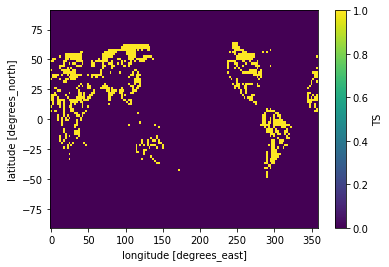

In [72]:
(warm_maxTS_01.where(warm_maxTS_03==0,0)).plot.imshow();plt.show();plt.close()

In [422]:
dark_dry = dry_dark.where((dry_dark == 1) & (dry_light == 0),0) # places where darkening caused switch to net-evaporative

In [423]:
dark_warm = warm_maxTS_dark.where((warm_maxTS_dark == 1) & (warm_maxTS_light == 0), 0) # places where darkening caused switch to warm

In [425]:
area_dark_warm = ((dark_warm*area_grid).where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5, 0)).sum('lat').sum('lon')/(area_grid).where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5, 0).sum('lat').sum('lon')

area_dark_warm.values

array(0.26129295)

In [429]:
print((((warm_maxTS_light*area_grid).where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5)).sum('lat').sum('lon').values/(area_grid.where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5).sum('lat').sum('lon'))).values - (((warm_maxTS_dark*area_grid).where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5)).sum('lat').sum('lon').values/(area_grid.where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5).sum('lat').sum('lon'))).values)

-0.23765360194628166


In [435]:
print((((~dry_light*area_grid).where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5)).sum('lat').sum('lon').values/(area_grid.where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5).sum('lat').sum('lon'))).values)
print((((~dry_dark*area_grid).where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5)).sum('lat').sum('lon').values/(area_grid.where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5).sum('lat').sum('lon'))).values)

0.5696327001190344
0.5387222245726034


In [410]:
da_Tmax.where(da_Tmax['co2']== 50).dropna(dim = 'co2')[-1].values[-1] - da_Tmax.where(da_Tmax['co2']== 50).dropna(dim = 'co2')[-1][0]

<xarray.DataArray ()>
array(23.76536019)
Coordinates:
    co2      int64 50
    albedo   float64 0.4
    rad_co2  float64 0.0
    rad_alb  float64 -2.0

In [389]:
# How much of all land is land that became warm and became dry?

all_land_area_dryoutwarm_mechanism = (dryoutwarm_mechanism*area_grid).where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5).sum('lat').sum('lon')/(area_grid).where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5).sum('lat').sum('lon')
all_land_area_dryoutwarm_mechanism.values

array(0.09015646)

In [388]:
dryoutwarm_mechanism = dark_warm.where(dark_dry == 1, 0)

In [436]:
# how much of the land that became warm dry and then became wet?

wetten_mechanism = area_grid.where((dry_light == 0) & (dry_dark ==0), 0)

wetten_mechanism.values
# all_land_area_wettening_mech = (wetten_mechanism*area_grid).where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5).sum('lat').sum('lon')/(area_grid).where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5).sum('lat').sum('lon')
# all_land_area_wettening_mech.values

array([[[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]],

       [[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]],

       [[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]],

       ...,

       [[-2, -2, -2, ..., -2, -2, -2],
        [-2, -2, -2, ..., -2, -2, -2],
        [-2, -2, -2, ..., -2, -2, -2],
        ...,
        [-2, -2, -2, ..., -2, -2, -2],
        [-2, -2, -2, ..., -2, -2, -2],
        [-2, -2, -2, ..., -2, -2

In [382]:
area_dryoutwarm_mechanism = (dryoutwarm_mechanism*area_grid).where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5).sum('lat').sum('lon')/(dark_warm*area_grid).where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5).sum('lat').sum('lon')
area_dryoutwarm_mechanism.values

array(0.34503977)

In [384]:
albedo_mechanism = dark_warm.where((wet_light ==0), 0)
albedo_mechanism

<xarray.DataArray 'TS' (lat: 96, lon: 144)>
dask.array<where, shape=(96, 144), dtype=float64, chunksize=(96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [391]:
all_land_area_albedo_mechanism = (albedo_mechanism*area_grid).where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5).sum('lat').sum('lon')/(area_grid).where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5).sum('lat').sum('lon')
all_land_area_albedo_mechanism.values

array(0.14693336)

In [386]:
area_albedo_mechanism =  (albedo_mechanism*area_grid).where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5).sum('lat').sum('lon')/(dark_warm*area_grid).where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5).sum('lat').sum('lon')
area_albedo_mechanism.values

array(0.5623319)

In [392]:
other_mechanism = dark_warm.where((dry_dark == 0) & (wet_light == 1)) #places where we go from net precip to net precip
other_mechanism


<xarray.DataArray 'TS' (lat: 96, lon: 144)>
dask.array<where, shape=(96, 144), dtype=float64, chunksize=(96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [394]:
area_other_mechanism =  (other_mechanism*area_grid).where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5).sum('lat').sum('lon')/(dark_warm*area_grid).where(ds_atm[runlist[0]]['LANDFRAC'][0]>0.5).sum('lat').sum('lon')
area_other_mechanism.values

array(0.09262833)

In [396]:
(area_other_mechanism + area_albedo_mechanism + area_dryoutwarm_mechanism).values

array(1.)

In [187]:
temperature = [
    [0, 4, 2, 9],
    [np.nan, np.nan, np.nan, np.nan],
    [4, np.nan, 2, 0],
    [3, 1, 0, 0],]
da = xr.DataArray(
    data=temperature,
    dims=["Y", "X"],
    coords=dict(
        lat=("Y", np.array([-20.0, -20.25, -20.50, -20.75])),
        lon=("X", np.array([10.0, 10.25, 10.5, 10.75])),
    ),
)
da

<xarray.DataArray (Y: 4, X: 4)>
array([[ 0.,  4.,  2.,  9.],
       [nan, nan, nan, nan],
       [ 4., nan,  2.,  0.],
       [ 3.,  1.,  0.,  0.]])
Coordinates:
    lat      (Y) float64 -20.0 -20.25 -20.5 -20.75
    lon      (X) float64 10.0 10.25 10.5 10.75
Dimensions without coordinates: Y, X

In [206]:
for y in da.Y:
    print(da.where(da.Y == y,drop = True).dropna(dim = 'X'))

<xarray.DataArray (Y: 1, X: 4)>
array([[0., 4., 2., 9.]])
Coordinates:
    lat      (Y) float64 -20.0
    lon      (X) float64 10.0 10.25 10.5 10.75
Dimensions without coordinates: Y, X
<xarray.DataArray (Y: 1, X: 0)>
array([], shape=(1, 0), dtype=float64)
Coordinates:
    lat      (Y) float64 -20.25
    lon      (X) float64 
Dimensions without coordinates: Y, X
<xarray.DataArray (Y: 1, X: 3)>
array([[4., 2., 0.]])
Coordinates:
    lat      (Y) float64 -20.5
    lon      (X) float64 10.0 10.5 10.75
Dimensions without coordinates: Y, X
<xarray.DataArray (Y: 1, X: 4)>
array([[3., 1., 0., 0.]])
Coordinates:
    lat      (Y) float64 -20.75
    lon      (X) float64 10.0 10.25 10.5 10.75
Dimensions without coordinates: Y, X


In [173]:
rad_alb_range

array([-2.  , -1.19,  0.  ,  1.21,  2.44])

In [174]:
rad_co2_range

array([-4.11, -2.05,  0.  ,  1.97,  4.33])

In [25]:

def gm(run, var):
    gm = np.sum(np.sum((ds_atm[run][var].mean('time')*area_grid/total_area),0),0)
    return gm

In [189]:
data_xr_TS = data_xr_TS.assign_coords(rad_co2=("co2", rad_co2_range))

<xarray.DataArray (co2: 5, albedo: 5)>
array([[235.56410403,          nan, 236.45349793,          nan,
        237.85388073],
       [         nan,          nan, 237.87494797,          nan,
                 nan],
       [237.10662915, 237.82110586, 238.44735517, 238.96171792,
        238.69692093],
       [237.93159226,          nan, 239.14278891,          nan,
                 nan],
       [238.66745602,          nan, 239.20464928,          nan,
        240.10800459]])
Coordinates:
  * co2      (co2) int64 10 25 50 100 200
  * albedo   (albedo) float64 0.4 0.35 0.3 0.25 0.2
    rad_co2  (co2) float64 -4.11 -2.05 0.0 1.97 4.33

In [190]:
data_xr_TS = data_xr_TS.assign_coords(rad_alb=("albedo", rad_alb_range))

In [79]:
for run in runlist:
    print(run, np.round(gm(run, 'TS').values-273.15, 1))

010co2_0.1alb_91tsi_bl99 -35.3
010co2_0.2alb_91tsi_bl99 -36.7
010co2_0.3alb_91tsi_bl99 -37.6
025co2_0.2alb_91tsi_bl99 -35.3
050co2_0.1alb_91tsi_bl99 -34.5
050co2_0.15alb_91tsi_bl99 -34.2
050co2_0.2alb_91tsi_bl99 -34.7
050co2_0.25alb_91tsi_bl99 -35.3
050co2_0.3alb_91tsi_bl99 -36.0
100co2_0.2alb_91tsi_bl99 -34.0
100co2_0.3alb_91tsi_bl99 -35.2
200co2_0.1alb_91tsi_bl99 -33.0
200co2_0.2alb_91tsi_bl99 -33.9
200co2_0.3alb_91tsi_bl99 -34.5


In [147]:
(-34.0072119467535--34.70264571155539)/3.7

0.18795507156807856

In [27]:
for run in runlist:
    print(run, np.rint(gm(run, 'TS').values-273.15))

010co2_0.1alb_91tsi_bl99 -35.0
010co2_0.2alb_91tsi_bl99 -37.0
010co2_0.3alb_91tsi_bl99 -38.0
025co2_0.2alb_91tsi_bl99 -35.0
050co2_0.1alb_91tsi_bl99 -34.0
050co2_0.15alb_91tsi_bl99 -34.0
050co2_0.2alb_91tsi_bl99 -35.0
050co2_0.25alb_91tsi_bl99 -35.0
050co2_0.3alb_91tsi_bl99 -36.0
100co2_0.2alb_91tsi_bl99 -34.0
100co2_0.3alb_91tsi_bl99 -35.0
200co2_0.1alb_91tsi_bl99 -33.0
200co2_0.2alb_91tsi_bl99 -34.0
200co2_0.3alb_91tsi_bl99 -34.0


In [186]:
(-34.5 - -36.0)/3

0.5

In [185]:
(-33.9 - -36.7)/7

0.40000000000000063

In [ ]:
albedo = 0.4
co2 = 50

# Plot incresaing co2 points
data = data_xr_T_PET[surface,:,2]
data_xr_T_PET[surface,:,2].plot(x = 'rad_co2', ax=ax, marker = 's', markersize = 5, label = 'constant albedo (0.2/0.4), changing CO$_{2}$', color = 'k')
std_dev_co2 = warm_land_std[:,2]*100
plt.fill_between(data.rad_co2, y1 = data+std_dev_co2, y2 = data-std_dev_co2, alpha = 0.2)

# Plot increasing albedo points
data_xr_T_PET[surface,2,:].dropna('albedo').plot(x = 'rad_alb', ax=ax, marker = 'o', markersize = 5, label = 'constant CO$_{2}$ (50 ppm), changing albedo', color = 'r')
std_dev_alb = warm_land_std[2,:]*100
plt.fill_between(data_xr_T_PET[surface,2,:].rad_alb, y1 = data_xr_T_PET[surface,2,:]+std_dev_alb, y2 = data_xr_T_PET[surface,2,:]-std_dev_alb, alpha = 0.2)

# Annotate first co2 points
for i in range(data_xr_T_PET[surface,:,2].shape[0])[:-2]:
    text = ax.text(
        data_xr_T_PET[surface,:,2].rad_co2[i] - (ax.get_xlim()[1] - ax.get_xlim()[0])*.01,
        data_xr_T_PET[surface,:,2][i] + (ax.get_ylim()[1] - ax.get_ylim()[0])*.01,
        "%s" % data_xr_T_PET[surface,:,2].co2.values[i],
        ha="right", va="bottom", 
        color="k", fontsize=10)
# Annotate second co2 points
for i in range(data_xr_T_PET[surface,:,2].shape[0])[-2:]:
    text = ax.text(
        data_xr_T_PET[surface,:,2].rad_co2[i] - (ax.get_xlim()[1] - ax.get_xlim()[0])*.01,
        data_xr_T_PET[surface,:,2][i] - (ax.get_ylim()[1] - ax.get_ylim()[0])*.02,
        "%s" % data_xr_T_PET[surface,:,2].co2.values[i],
        ha="left", va="top", 
        color="k", fontsize=10)

# Annotate albedo points
for i in range(data_xr_T_PET[surface,2,:].dropna('albedo').shape[0])[:-2]:
    text = ax.text(
        data_xr_T_PET[surface,2,:].dropna('albedo').rad_alb[i] + (ax.get_xlim()[1] - ax.get_xlim()[0])*.01,
        data_xr_T_PET[surface,2,:].dropna('albedo')[i] - (ax.get_ylim()[1] - ax.get_ylim()[0])*.01,
        "%s" % data_xr_T_PET[surface,2,:].dropna('albedo').albedo.values[i],
        ha="left", va="top", 
        color="k", fontsize=10)
for i in range(data_xr_T_PET[surface,2,:].dropna('albedo').shape[0])[-2:]:
    text = ax.text(
        data_xr_T_PET[surface,2,:].dropna('albedo').rad_alb[i] + (ax.get_xlim()[1] - ax.get_xlim()[0])*.01,
        data_xr_T_PET[surface,2,:].dropna('albedo')[i] + (ax.get_ylim()[1] - ax.get_ylim()[0])*.01,
        "%s" % data_xr_T_PET[surface,2,:].dropna('albedo').albedo.values[i],
        ha="right", va="bottom", 
        color="k", fontsize=10)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),frameon=False)
ax.set_xlim(extend_axes(ax)[0])
ax.set_ylim(extend_axes(ax)[1])

# Set title
title = 'Percent Land with T$_{max}$ > 0°C'
ax.set_title('%s' % (title))
ax.set_xlabel('Radiative forcing (W/m$^{2}$) \n relative to broadband albedo = 0.3, CO$_{2}$ = 50 ppm')
ax.set_ylabel('percent %s' % (data_xr_T_PET.surface[surface].values))
filepath = '/glade/u/home/greshum/Analysis/Snowball/figures/surface_response_10ppm_%s' % surface
fig.savefig(filepath+'.png', dpi=300,facecolor=None,edgecolor=None,bbox_inches='tight',transparent=True,pad_inches=0.01)
plt.show()
plt.close()

In [ ]:
surf_alb_orig = (ds_atm[runlist[2]]['FSDS'].mean('time') - ds_atm[runlist[2]]['FSNS'].mean('time'))/ds_atm[runlist[2]]['FSDS'].mean('time')
surf_alb_firn = (ds_atm_firn[runlist[2]]['FSDS'].mean('time') - ds_atm_firn[runlist[2]]['FSNS'].mean('time'))/ds_atm_firn[runlist[2]]['FSDS'].mean('time')

NameError: name 'ds_atm_firn' is not defined

#### Albedo of snowfree ice

In [20]:
ds_atm[runlist[2]].LANDFRAC

<xarray.DataArray 'LANDFRAC' (time: 120, lat: 96, lon: 144)>
dask.array<concatenate, shape=(120, 96, 144), dtype=float32, chunksize=(1, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 0010-01-17 00:00:00 ... 0019-12-17 00:00:00
Attributes:
    units:         fraction
    long_name:     Fraction of sfc area covered by land
    cell_methods:  time: mean

In [18]:
# Calculate surface albedo

alb_dEdd_orig =  (ds_atm[runlist[2]]['FSDS'] - ds_atm[runlist[2]]['FSNS'])/ds_atm[runlist[2]]['FSDS']

alb_ccsm3_new =  (ds_atm_firn[runlist[2]]['FSDS'] - ds_atm_firn[runlist[2]]['FSNS'])/ds_atm_firn[runlist[2]]['FSDS']

NameError: name 'ds_atm_firn' is not defined

In [22]:
alb_dEdd_orig

<xarray.DataArray (time: 120, lat: 96, lon: 144)>
dask.array<truediv, shape=(120, 96, 144), dtype=float32, chunksize=(1, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 0010-01-17 00:00:00 ... 0019-12-17 00:00:00

In [19]:
run = runlist[2]

# Calculate surface albedo of BARE ice:
icealb_bare_dEdd_orig =  ((ds_atm[run]['FSDS'] - ds_atm[run]['FSNS'])/ds_atm[run]['FSDS']).where(ds_atm[run]['ICEFRAC'] > 0.9).where(ds_atm[run]['SNOWHICE'] < 0.01)
icealb_bare_ccsm3_new = ((ds_atm_firn[run]['FSDS'] - ds_atm_firn[run]['FSNS'])/ds_atm_firn[run]['FSDS']).where(ds_atm_firn[run]['ICEFRAC'] > 0.9).where(ds_atm_firn[runlist[2]]['SNOWHICE'] < .01)

# Calculate surface albedo of ALL ice:
icealb_all_dEdd_orig = ((ds_atm[run]['FSDS'] - ds_atm[run]['FSNS'])/ds_atm[run]['FSDS']).where(ds_atm[run]['ICEFRAC'] > 0.9)
icealb_all_ccsm3_new = ((ds_atm_firn[run]['FSDS'] - ds_atm_firn[run]['FSNS'])/ds_atm_firn[run]['FSDS']).where(ds_atm_firn[run]['ICEFRAC'] > 0.9)

NameError: name 'ds_atm_firn' is not defined

In [23]:
# Calcluate BARE ice surface temp
ts_bare_ccsm3_new = ds_atm_firn[runlist[2]]['TS'].where(ds_atm_firn[runlist[2]]['ICEFRAC'] >.9).where(ds_atm_firn[runlist[2]]['SNOWHICE'] < .01)
ts_bare_dEdd_orig = ds_atm[runlist[2]]['TS'].where(ds_atm[runlist[2]]['ICEFRAC'] >.9).where(ds_atm[runlist[2]]['SNOWHICE'] < .01)

# Calcluate ALL ice surface temp
ts_all_ccsm3_new = ds_atm_firn[runlist[2]]['TS'].where(ds_atm_firn[runlist[2]]['ICEFRAC'] >.9)
ts_all_dEdd_orig = ds_atm[runlist[2]]['TS'].where(ds_atm[runlist[2]]['ICEFRAC'] >.9)

In [26]:
# Make a data array of BARE ice surface temperature and BARE surface albedo

ts_icealb_bare_new = xr.DataArray([ts_bare_ccsm3_new, icealb_bare_ccsm3_new], dims=["var", "time", "lat", "lon"])
ts_icealb_bare_orig = xr.DataArray([ts_bare_dEdd_orig, icealb_bare_dEdd_orig], dims=["var", "time", "lat", "lon"])

# Make a data array of BARE ice surface temperature and BARE surface albedo

ts_icealb_all_new = xr.DataArray([ts_all_ccsm3_new, icealb_all_ccsm3_new], dims=["var", "time", "lat", "lon"])
ts_icealb_all_orig = xr.DataArray([ts_all_dEdd_orig, icealb_all_dEdd_orig], dims=["var", "time", "lat", "lon"])

In [29]:
# Calculate BARE ice snow depth
snowhice_bare_ccsm3_new = ds_atm_firn[runlist[2]]['SNOWHICE'].where(ds_atm_firn[runlist[2]]['SNOWHICE'] < .01).where(ds_atm_firn[runlist[2]]['ICEFRAC'] >.5)
snowhice_bare_dEdd_orig = ds_atm[runlist[2]]['SNOWHICE'].where(ds_atm[runlist[2]]['SNOWHICE'] < .01).where(ds_atm[runlist[2]]['ICEFRAC'] >.5)

# Calculate ALL ice snow depth
snowhice_all_ccsm3_new = ds_atm_firn[runlist[2]]['SNOWHICE'].where(ds_atm_firn[runlist[2]]['ICEFRAC'] >.5)
snowhice_all_dEdd_orig = ds_atm[runlist[2]]['SNOWHICE'].where(ds_atm[runlist[2]]['ICEFRAC'] >.5)

In [30]:
# make data array of BARE ice albedo and snow depth (should be less than .01 m)

snowhice_icealb_bare_new = xr.DataArray([snowhice_bare_ccsm3_new, icealb_bare_ccsm3_new], dims=["var", "time", "lat", "lon"])
snowhice_icealb_bare_orig = xr.DataArray([snowhice_bare_dEdd_orig, icealb_bare_dEdd_orig], dims=["var", "time", "lat", "lon"])

In [31]:
# make data array of ALL ice albedo (for ALL snow cover) and snow depth (for ALL snow cover)

snowhice_icealb_all_new = xr.DataArray([snowhice_all_ccsm3_new, icealb_all_ccsm3_new],dims=["var", "time", "lat", "lon"])
snowhice_icealb_all_orig = xr.DataArray([snowhice_all_dEdd_orig, icealb_all_dEdd_orig],dims=["var", "time", "lat", "lon"])

In [145]:
prec_orig = (ds_atm[runlist[2]]['PRECC'].mean('time') + ds_atm[runlist[2]]['PRECL'].mean('time'))
prec_firn = (ds_atm_firn[runlist[2]]['PRECC'].mean('time') + ds_atm_firn[runlist[2]]['PRECL'].mean('time'))
# snowhice_orig = (ds_atm[runlist[2]]['SNOWHICE'].mean('time'))
# snowhice_firn = (ds_atm_firn[runlist[2]]['SNOWHICE'].mean('time'))

In [62]:
run_name

{'010co2_0.1alb_91tsi_bl99': '10 ppm, 0.1/0.3 albedo',
 '025co2_0.1alb_91tsi_bl99': '25 ppm, 0.1/0.3 albedo',
 '050co2_0.1alb_91tsi_bl99': '50 ppm, 0.1/0.3 albedo',
 '100co2_0.1alb_91tsi_bl99': '100 ppm, 0.1/0.3 albedo',
 '200co2_0.1alb_91tsi_bl99': '200 ppm, 0.1/0.3 albedo',
 '010co2_0.2alb_91tsi_bl99': '10 ppm, 0.2/0.4 albedo',
 '025co2_0.2alb_91tsi_bl99': '25 ppm, 0.2/0.4 albedo',
 '050co2_0.2alb_91tsi_bl99': '50 ppm, 0.2/0.4 albedo',
 '100co2_0.2alb_91tsi_bl99': '100 ppm, 0.2/0.4 albedo',
 '200co2_0.2alb_91tsi_bl99': '200 ppm, 0.2/0.4 albedo',
 '010co2_0.3alb_91tsi_bl99': '10 ppm, 0.3/0.5 albedo',
 '025co2_0.3alb_91tsi_bl99': '25 ppm, 0.3/0.5 albedo',
 '050co2_0.3alb_91tsi_bl99': '50 ppm, 0.3/0.5 albedo',
 '100co2_0.3alb_91tsi_bl99': '100 ppm, 0.3/0.5 albedo',
 '200co2_0.3alb_91tsi_bl99': '200 ppm, 0.3/0.5 albedo',
 '010co2_0.6alb_91tsi_bl99': '10 ppm, 0.6/0.6 albedo',
 '025co2_0.6alb_91tsi_bl99': '25 ppm, 0.6/0.6 albedo',
 '050co2_0.6alb_91tsi_bl99': '50 ppm, 0.6/0.6 albedo',
 '10

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, dpi = 100, figsize = (15,5),)

run = runlist[2]

ax1 = plt.subplot(projection=ccrs.Robinson())
im = snowhice_orig.plot(
    transform = ccrs.PlateCarree(),
    vmin = 0, vmax = 3.4, 
    cmap = sns.color_palette("light:b", as_cmap=True), levels = 21,
    subplot_kws={"projection": ccrs.Robinson()},
    cbar_kwargs={"label": "%s" % ds_atm[run]['SNOWHICE'].units, "orientation": "horizontal", "shrink": .9,},
                   )
plt.title('orig (dEdd) \n Snow depth on ice')
ax.gridlines(alpha = .5)
ax.coastlines()
plt.show();plt.close()

fig = plt.figure(dpi = 120)
ax = plt.subplot(projection=ccrs.Robinson())
im = snowhice_new.plot(
    transform = ccrs.PlateCarree(),
    vmin = 0, vmax = 3.4, 
    cmap = sns.color_palette("light:b", as_cmap=True), levels = 21,
    subplot_kws={"projection": ccrs.Robinson()},
    cbar_kwargs={"label": "%s" % ds_atm[run]['SNOWHICE'].units, "orientation": "horizontal", "shrink": .9,},)
plt.title('new (ccsm3) \n Snow depth on ice')
ax.gridlines(alpha = .5)
ax.coastlines()
plt.show();plt.close()

fig = plt.figure(dpi = 120)
ax = plt.subplot(projection=ccrs.Robinson())
im = (snowhice_new - snowhice_orig).plot(
    transform = ccrs.PlateCarree(),
    center = 0,                         
    cmap = sns.color_palette("vlag_r", as_cmap=True), 
    levels = 21,
    subplot_kws={"projection": ccrs.Robinson()},
    cbar_kwargs={"label": "%s" % ds_atm[run]['SNOWHICE'].units, "orientation": "horizontal", "shrink": .9,},)
plt.title('new (ccsm3) - orig (dEdd) \n Snow depth on ice')
ax.gridlines(alpha = .5)
ax.coastlines()
plt.show();plt.close()

### P - PET

In [157]:
# Define function

mmperm = 1000
sperday=60*60*24

Lv = 2260
Ls = 2838

def percent_with_water(run):

    PET = xr.DataArray(PETcalc(run = run, latent = ))
    print('PET calculated')
    # PET
    
    #     land
    land_PET = PET.where(ds_atm[run]['LANDFRAC'][0,:,:] > 0.5 )
    land_PmPET = (((ds_atm[run]['PRECC'].mean('time')+ds_atm[run]['PRECL'].mean('time'))*mmperm*sperday).where(ds_atm[run]['LANDFRAC'][0,:,:] > 0.5 )) - land_PET
    f_land = np.sum(np.sum(~np.isnan(land_PET) * area_grid/total_area, 0),0).values

    # area of wet land:
    f_wet_land = np.sum(np.sum(~np.isnan(land_PmPET.where(land_PmPET > 0)) * area_grid/total_area, 0),0).values

    # area of dry land:
    f_dry_land = np.sum(np.sum(~np.isnan(land_PmPET.where(land_PmPET < 0)) * area_grid/total_area, 0),0).values

    #     ocean
    ocean_PET = PET.where(ds_atm[run]['LANDFRAC'][0,:,:] < 0.5 )
    ocean_PmPET = (((ds_atm[run]['PRECC'].mean('time')+ds_atm[run]['PRECL'].mean('time'))*mmperm*sperday).where(ds_atm[run]['LANDFRAC'][0,:,:] < 0.5 )) - ocean_PET
    f_ocean = np.sum(np.sum(~np.isnan(ocean_PET) * area_grid/total_area, 0),0).values

    # area of wet ocean:
    f_wet_ocean = np.sum(np.sum(~np.isnan(ocean_PmPET.where(ocean_PmPET > 0)) * area_grid/total_area, 0),0).values
    
    # area of dry ocean:
    f_dry_ocean = np.sum(np.sum(~np.isnan(ocean_PmPET.where(ocean_PmPET < 0)) * area_grid/total_area, 0),0).values
    
    print('Do all the PET fractions add to 1?', f_wet_land + f_dry_land + f_wet_ocean + f_dry_ocean, np.round(f_wet_land+f_dry_land+f_wet_ocean + f_dry_ocean,3 ) == 1)

    percent_land_wet = 100* f_wet_land/f_land
    print(run_name[run], ': ', np.round(percent_land_wet,1), '% of land is wet')
    percent_land_dry = 100* f_dry_land/f_land
    print(run_name[run], ': ', np.round(percent_land_dry,1), '% of land is dry')
    percent_ocean_wet = 100* f_wet_ocean/f_ocean
    print(run_name[run], ': ', np.round(percent_ocean_wet,1), '% of ocean is wet')
    percent_ocean_dry = 100* f_dry_ocean/f_ocean
    print(run_name[run], ': ', np.round(percent_ocean_dry,1), '% of ocean is dry')
    print('Do the ocean P-PET percents add to 100%?', percent_ocean_wet + percent_ocean_dry, percent_ocean_wet + percent_ocean_dry == 100)
    
    return percent_land_dry, percent_ocean_dry

In [30]:
# Define function for collocation using MAX ANNUAL TEMPERATURE

sperday=60*60*24
mmperm = 1000
def percent_warm_wet(run):
    SHFLX = ds_atm[run]['SHFLX'].mean('time'); print(np.shape(SHFLX))
    LHFLX = ds_atm[run]['LHFLX'].mean('time'); print(np.shape(LHFLX))
    T = ds_atm[run]['T'][:,-1,:,:].mean('time'); print(np.shape(T))
    RELHUM = ds_atm[run]['RELHUM'][:,-1,:,:].mean('time'); print(np.shape(RELHUM))
    UU = ds_atm[run]['UU'][:,-1,:,:].mean('time'); print(np.shape(UU))
    VV = ds_atm[run]['VV'][:,-1,:,:].mean('time'); print(np.shape(VV))
    PS = ds_atm[run]['PS'].mean('time'); print(np.shape(PS))

    PET = xr.DataArray(PETcalc(SHFLX = SHFLX, LHFLX = LHFLX, T = T, RELHUM = RELHUM, UU = UU, VV = VV, PS = PS))
    print('PET calculated')
    # PET
    
    #     land
    land_PET = PET.where(ds_atm[run]['LANDFRAC'][0,:,:] > 0.5 )
    land_PmPET = (((ds_atm[run]['PRECC'].mean('time')+ds_atm[run]['PRECL'].mean('time'))*mmperm*sperday).where(ds_atm[run]['LANDFRAC'][0,:,:] > 0.5 )) - land_PET
    f_land = np.sum(np.sum(~np.isnan(land_PET) * area_grid/total_area, 0),0).values

    # area of wet land:
    wet_land = ~np.isnan(land_PET.where(land_PmPET > 0))
    f_wet_land = np.sum(np.sum(~np.isnan(land_PmPET.where(land_PmPET > 0)) * area_grid/total_area, 0),0).values

    # area of dry land:
    dry_land = ~np.isnan(land_PET.where(land_PmPET < 0))
    f_dry_land = np.sum(np.sum(~np.isnan(land_PmPET.where(land_PmPET < 0)) * area_grid/total_area, 0),0).values

    # ocean
    ocean_PET = PET.where(ds_atm[run]['LANDFRAC'][0,:,:] < 0.5 )
    ocean_PmPET = (((ds_atm[run]['PRECC'].mean('time')+ds_atm[run]['PRECL'].mean('time'))*mmperm*sperday).where(ds_atm[run]['LANDFRAC'][0,:,:] < 0.5 )) - ocean_PET
    f_ocean = np.sum(np.sum(~np.isnan(ocean_PET) * area_grid/total_area, 0),0).values

    # area of wet ocean:
    wet_ocean = ~np.isnan(ocean_PET.where(ocean_PmPET > 0))
    f_wet_ocean = np.sum(np.sum(~np.isnan(ocean_PmPET.where(ocean_PmPET > 0)) * area_grid/total_area, 0),0).values
    
    # area of dry ocean:
    dry_ocean = ~np.isnan(ocean_PET.where(ocean_PmPET < 0))
    f_dry_ocean = np.sum(np.sum(~np.isnan(ocean_PmPET.where(ocean_PmPET < 0)) * area_grid/total_area, 0),0).values
    
    print('Do all the PET fractions add to 1?', f_wet_land + f_dry_land + f_wet_ocean + f_dry_ocean, np.round(f_wet_land+f_dry_land+f_wet_ocean + f_dry_ocean,3 ) == 1)

    percent_land_wet = 100* f_wet_land/f_land
    print(run_name[run], ': ', np.round(percent_land_wet,1), '% of land is wet')
    percent_land_dry = 100* f_dry_land/f_land
    print(run_name[run], ': ', np.round(percent_land_dry,1), '% of land is dry')
    percent_ocean_wet = 100* f_wet_ocean/f_ocean
    print(run_name[run], ': ', np.round(percent_ocean_wet,1), '% of ocean is wet')
    percent_ocean_dry = 100* f_dry_ocean/f_ocean
    print(run_name[run], ': ', np.round(percent_ocean_dry,1), '% of ocean is dry')
    print('Do the ocean P-PET percents add to 100%?', percent_ocean_wet + percent_ocean_dry, percent_ocean_wet + percent_ocean_dry == 100)


    # TS
    land_TS = ds_atm[run]['TS'].groupby(ds_atm[run]['TS'].time.dt.month).mean().max('month').where(ds_atm[run]['LANDFRAC'][0,:,:] > 0.5 )
    # area of warm land:
    warm_land = ~np.isnan(land_TS.where(land_TS > 273))
    f_warm_land = np.sum(np.sum(warm_land * area_grid/total_area, 0),0).values
    print('f_warm_land = ', f_warm_land)

    cold_land = ~np.isnan(land_TS.where(land_TS < 273))
    f_cold_land = np.sum(np.sum(cold_land * area_grid/total_area, 0),0).values
    print('f_cold_land = ', f_cold_land)

    ocean_TS = ds_atm[run]['TS'].groupby(ds_atm[run]['TS'].time.dt.month).mean().max('month').where(ds_atm[run]['LANDFRAC'][0,:,:] < 0.5 )
    # area of warm ocean
    warm_ocean = ~np.isnan(ocean_TS.where(ocean_TS > 273))
    f_warm_ocean = np.sum(np.sum(warm_ocean * area_grid/total_area, 0),0).values
    print('f_warm_ocean = ', f_warm_ocean)

    cold_ocean = ~np.isnan(ocean_TS.where(ocean_TS < 273))
    f_cold_ocean = np.sum(np.sum(cold_ocean * area_grid/total_area, 0),0).values
    print('f_cold_ocean = ', f_cold_ocean)
    print('Do all the TS fractions add to 1?', f_warm_land + f_cold_land + f_warm_ocean + f_cold_ocean, np.round(f_warm_land+f_cold_land+f_warm_ocean + f_cold_ocean,3 ) == 1)

    f_land = np.sum(np.sum(~np.isnan(land_TS) * area_grid/total_area, 0),0).values
    percent_land_warm = 100* f_warm_land/f_land
    percent_land_cold = 100* f_cold_land/f_land
    print(run_name[run], ': ', np.round(percent_land_warm,1), '% of land is above freezing')
    print('Do the land TS percents add to 100%?', percent_land_warm + percent_land_cold, percent_land_warm + percent_land_cold == 100)
    
    f_ocean = np.sum(np.sum(~np.isnan(ocean_TS) * area_grid/total_area, 0),0).values
    percent_ocean_warm = 100* f_warm_ocean/f_ocean
    percent_ocean_cold = 100* f_cold_ocean/f_ocean
    print(run_name[run], ': ', np.round(percent_ocean_warm,1), '% of ocean above freezing')
    print('Do the ocean TS percents add to 100%?', percent_ocean_warm + percent_ocean_cold, percent_ocean_warm + percent_ocean_cold == 100)


    # COLLOCATION

    # area of warmwet land:
    warmwet_land = warm_land * wet_land
    f_warmwet_land = np.sum(np.sum(warmwet_land * area_grid/total_area, 0),0).values
    print('fraction warmwet land = ', f_warmwet_land)
    # area of colddry land:
    colddry_land = cold_land * dry_land
    f_colddry_land = np.sum(np.sum(colddry_land * area_grid/total_area, 0),0).values
    print('fraction colddry land = ', f_colddry_land)

    # area of warmdry land:
    warmdry_land = warm_land * dry_land
    f_warmdry_land = np.sum(np.sum(warmdry_land * area_grid/total_area, 0),0).values
    print('fraction warmdry land = ', f_warmdry_land)
    # area of coldwet land:
    coldwet_land = cold_land * wet_land
    f_coldwet_land = np.sum(np.sum(coldwet_land * area_grid/total_area, 0),0).values
    print('fraction coldwet land = ', f_coldwet_land)
    
    f_land = np.sum(np.sum(~np.isnan(land_PmPET) * area_grid/total_area, 0),0).values
    percent_land_warmwet = 100* f_warmwet_land/f_land
    percent_land_warmdry = 100* f_warmdry_land/f_land
    percent_land_coldwet = 100* f_coldwet_land/f_land
    percent_land_colddry = 100* f_colddry_land/f_land
    print(run_name[run], ': ', np.round(percent_land_warmwet,1), '% of land is warm and wet')
    print(run_name[run], ': ', np.round(percent_land_warmdry,1), '% of land is warm and dry')
    print(run_name[run], ': ', np.round(percent_land_coldwet,1), '% of land is cold and wet')
    print(run_name[run], ': ', np.round(percent_land_colddry,1), '% of land is cold and dry') 
    print('Do the land TS & P-PET percents add to 100%?', percent_land_warmwet + percent_land_warmdry + percent_land_coldwet + percent_land_colddry, percent_land_warmwet + percent_land_warmdry + percent_land_coldwet + percent_land_colddry == 100)
    
    # area of warmwet ocean:
    warmwet_ocean = warm_ocean * wet_ocean
    f_warmwet_ocean = np.sum(np.sum(warmwet_ocean * area_grid/total_area, 0),0).values
    print('fraction warmwet ocean = ', f_warmwet_ocean)
    # area of colddry ocean:
    colddry_ocean = cold_ocean * dry_ocean
    f_colddry_ocean = np.sum(np.sum(colddry_ocean * area_grid/total_area, 0),0).values
    print('fraction colddry ocean = ', f_colddry_ocean)

    # area of warmdry ocean:
    warmdry_ocean = warm_ocean * dry_ocean
    f_warmdry_ocean = np.sum(np.sum(warmdry_ocean * area_grid/total_area, 0),0).values
    print('fraction warmdry ocean = ', f_warmdry_ocean)
    # area of coldwet ocean:
    coldwet_ocean = cold_ocean * wet_ocean
    f_coldwet_ocean = np.sum(np.sum(coldwet_ocean * area_grid/total_area, 0),0).values
    print('fraction coldwet ocean = ', f_coldwet_ocean)
    

    f_ocean = np.sum(np.sum(~np.isnan(ocean_PmPET) * area_grid/total_area, 0),0).values
    percent_ocean_warmwet = 100* f_warmwet_ocean/f_ocean
    percent_ocean_warmdry = 100* f_warmdry_ocean/f_ocean
    percent_ocean_coldwet = 100* f_coldwet_ocean/f_ocean
    percent_ocean_colddry = 100* f_colddry_ocean/f_ocean
    print(run_name[run], ': ', np.round(percent_ocean_warmwet,1), '% of ocean is warm and wet')
    print(run_name[run], ': ', np.round(percent_ocean_warmdry,1), '% of ocean is warm and dry')
    print(run_name[run], ': ', np.round(percent_ocean_coldwet,1), '% of ocean is cold and wet')
    print(run_name[run], ': ', np.round(percent_ocean_colddry,1), '% of ocean is cold and dry') 
    print('Do the ocean TS & P-PET percents add to 100%?', percent_ocean_warmwet + percent_ocean_warmdry + percent_ocean_coldwet + percent_ocean_colddry, percent_ocean_warmwet + percent_ocean_warmdry + percent_ocean_coldwet + percent_ocean_colddry == 100)
        
    print('Do all the TS & PET fractions add to 1?', f_warmwet_land + f_coldwet_land + f_warmdry_land + f_colddry_land + f_warmwet_ocean + f_coldwet_ocean + f_warmdry_ocean + f_colddry_ocean, np.round(f_warmwet_land + f_coldwet_land + f_warmdry_land + f_colddry_land + f_warmwet_ocean + f_coldwet_ocean + f_warmdry_ocean + f_colddry_ocean,3 ) == 1)

    return percent_land_warmdry, percent_land_warmwet, percent_land_warm, percent_ocean_warm, percent_land_dry, percent_ocean_dry

In [36]:
# Define function for collocation using MEAN ANNUAL TEMPERATURE

sperday=60*60*24
mmperm = 1000
def percent_warm_wet(run):
    SHFLX = ds_atm[run]['SHFLX'].mean('time'); print(np.shape(SHFLX))
    LHFLX = ds_atm[run]['LHFLX'].mean('time'); print(np.shape(LHFLX))
    T = ds_atm[run]['T'][:,-1,:,:].mean('time'); print(np.shape(T))
    RELHUM = ds_atm[run]['RELHUM'][:,-1,:,:].mean('time'); print(np.shape(RELHUM))
    UU = ds_atm[run]['UU'][:,-1,:,:].mean('time'); print(np.shape(UU))
    VV = ds_atm[run]['VV'][:,-1,:,:].mean('time'); print(np.shape(VV))
    PS = ds_atm[run]['PS'].mean('time'); print(np.shape(PS))

    PET = xr.DataArray(PETcalc(SHFLX = SHFLX, LHFLX = LHFLX, T = T, RELHUM = RELHUM, UU = UU, VV = VV, PS = PS))
    print('PET calculated')
    # PET
    
    #     land
    land_PET = PET.where(ds_atm[run]['LANDFRAC'][0,:,:] > 0.5 )
    land_PmPET = (((ds_atm[run]['PRECC'].mean('time')+ds_atm[run]['PRECL'].mean('time'))*mmperm*sperday).where(ds_atm[run]['LANDFRAC'][0,:,:] > 0.5 )) - land_PET
    f_land = np.sum(np.sum(~np.isnan(land_PET) * area_grid/total_area, 0),0).values

    # area of wet land:
    wet_land = ~np.isnan(land_PET.where(land_PmPET > 0))
    f_wet_land = np.sum(np.sum(~np.isnan(land_PmPET.where(land_PmPET > 0)) * area_grid/total_area, 0),0).values

    # area of dry land:
    dry_land = ~np.isnan(land_PET.where(land_PmPET < 0))
    f_dry_land = np.sum(np.sum(~np.isnan(land_PmPET.where(land_PmPET < 0)) * area_grid/total_area, 0),0).values

    # ocean
    ocean_PET = PET.where(ds_atm[run]['LANDFRAC'][0,:,:] < 0.5 )
    ocean_PmPET = (((ds_atm[run]['PRECC'].mean('time')+ds_atm[run]['PRECL'].mean('time'))*mmperm*sperday).where(ds_atm[run]['LANDFRAC'][0,:,:] < 0.5 )) - ocean_PET
    f_ocean = np.sum(np.sum(~np.isnan(ocean_PET) * area_grid/total_area, 0),0).values

    # area of wet ocean:
    wet_ocean = ~np.isnan(ocean_PET.where(ocean_PmPET > 0))
    f_wet_ocean = np.sum(np.sum(~np.isnan(ocean_PmPET.where(ocean_PmPET > 0)) * area_grid/total_area, 0),0).values
    
    # area of dry ocean:
    dry_ocean = ~np.isnan(ocean_PET.where(ocean_PmPET < 0))
    f_dry_ocean = np.sum(np.sum(~np.isnan(ocean_PmPET.where(ocean_PmPET < 0)) * area_grid/total_area, 0),0).values
    
    print('Do all the PET fractions add to 1?', f_wet_land + f_dry_land + f_wet_ocean + f_dry_ocean, np.round(f_wet_land+f_dry_land+f_wet_ocean + f_dry_ocean,3 ) == 1)

    percent_land_wet = 100* f_wet_land/f_land
    print(run_name[run], ': ', np.round(percent_land_wet,1), '% of land is wet')
    percent_land_dry = 100* f_dry_land/f_land
    print(run_name[run], ': ', np.round(percent_land_dry,1), '% of land is dry')
    percent_ocean_wet = 100* f_wet_ocean/f_ocean
    print(run_name[run], ': ', np.round(percent_ocean_wet,1), '% of ocean is wet')
    percent_ocean_dry = 100* f_dry_ocean/f_ocean
    print(run_name[run], ': ', np.round(percent_ocean_dry,1), '% of ocean is dry')
    print('Do the ocean P-PET percents add to 100%?', percent_ocean_wet + percent_ocean_dry, percent_ocean_wet + percent_ocean_dry == 100)


    # TS
    land_TS = ds_atm[run]['TS'].mean('time').where(ds_atm[run]['LANDFRAC'][0,:,:] > 0.5 )
    # area of warm land:
    warm_land = ~np.isnan(land_TS.where(land_TS > 273))
    f_warm_land = np.sum(np.sum(warm_land * area_grid/total_area, 0),0).values
    print('f_warm_land = ', f_warm_land)

    cold_land = ~np.isnan(land_TS.where(land_TS < 273))
    f_cold_land = np.sum(np.sum(cold_land * area_grid/total_area, 0),0).values
    print('f_cold_land = ', f_cold_land)

    ocean_TS = ds_atm[run]['TS'].mean('time').where(ds_atm[run]['LANDFRAC'][0,:,:] < 0.5 )
    # area of warm ocean
    warm_ocean = ~np.isnan(ocean_TS.where(ocean_TS > 273))
    f_warm_ocean = np.sum(np.sum(warm_ocean * area_grid/total_area, 0),0).values
    print('f_warm_ocean = ', f_warm_ocean)

    cold_ocean = ~np.isnan(ocean_TS.where(ocean_TS < 273))
    f_cold_ocean = np.sum(np.sum(cold_ocean * area_grid/total_area, 0),0).values
    print('f_cold_ocean = ', f_cold_ocean)
    print('Do all the TS fractions add to 1?', f_warm_land + f_cold_land + f_warm_ocean + f_cold_ocean, np.round(f_warm_land+f_cold_land+f_warm_ocean + f_cold_ocean,3 ) == 1)

    f_land = np.sum(np.sum(~np.isnan(land_TS) * area_grid/total_area, 0),0).values
    percent_land_warm = 100* f_warm_land/f_land
    percent_land_cold = 100* f_cold_land/f_land
    print(run_name[run], ': ', np.round(percent_land_warm,1), '% of land is above freezing')
    print('Do the land TS percents add to 100%?', percent_land_warm + percent_land_cold, percent_land_warm + percent_land_cold == 100)
    
    f_ocean = np.sum(np.sum(~np.isnan(ocean_TS) * area_grid/total_area, 0),0).values
    percent_ocean_warm = 100* f_warm_ocean/f_ocean
    percent_ocean_cold = 100* f_cold_ocean/f_ocean
    print(run_name[run], ': ', np.round(percent_ocean_warm,1), '% of ocean above freezing')
    print('Do the ocean TS percents add to 100%?', percent_ocean_warm + percent_ocean_cold, percent_ocean_warm + percent_ocean_cold == 100)


    # COLLOCATION

    # area of warmwet land:
    warmwet_land = warm_land * wet_land
    f_warmwet_land = np.sum(np.sum(warmwet_land * area_grid/total_area, 0),0).values
    print('fraction warmwet land = ', f_warmwet_land)
    # area of colddry land:
    colddry_land = cold_land * dry_land
    f_colddry_land = np.sum(np.sum(colddry_land * area_grid/total_area, 0),0).values
    print('fraction colddry land = ', f_colddry_land)

    # area of warmdry land:
    warmdry_land = warm_land * dry_land
    f_warmdry_land = np.sum(np.sum(warmdry_land * area_grid/total_area, 0),0).values
    print('fraction warmdry land = ', f_warmdry_land)
    # area of coldwet land:
    coldwet_land = cold_land * wet_land
    f_coldwet_land = np.sum(np.sum(coldwet_land * area_grid/total_area, 0),0).values
    print('fraction coldwet land = ', f_coldwet_land)
    
    f_land = np.sum(np.sum(~np.isnan(land_PmPET) * area_grid/total_area, 0),0).values
    percent_land_warmwet = 100* f_warmwet_land/f_land
    percent_land_warmdry = 100* f_warmdry_land/f_land
    percent_land_coldwet = 100* f_coldwet_land/f_land
    percent_land_colddry = 100* f_colddry_land/f_land
    print(run_name[run], ': ', np.round(percent_land_warmwet,1), '% of land is warm and wet')
    print(run_name[run], ': ', np.round(percent_land_warmdry,1), '% of land is warm and dry')
    print(run_name[run], ': ', np.round(percent_land_coldwet,1), '% of land is cold and wet')
    print(run_name[run], ': ', np.round(percent_land_colddry,1), '% of land is cold and dry') 
    print('Do the land TS & P-PET percents add to 100%?', percent_land_warmwet + percent_land_warmdry + percent_land_coldwet + percent_land_colddry, percent_land_warmwet + percent_land_warmdry + percent_land_coldwet + percent_land_colddry == 100)
    
    # area of warmwet ocean:
    warmwet_ocean = warm_ocean * wet_ocean
    f_warmwet_ocean = np.sum(np.sum(warmwet_ocean * area_grid/total_area, 0),0).values
    print('fraction warmwet ocean = ', f_warmwet_ocean)
    # area of colddry ocean:
    colddry_ocean = cold_ocean * dry_ocean
    f_colddry_ocean = np.sum(np.sum(colddry_ocean * area_grid/total_area, 0),0).values
    print('fraction colddry ocean = ', f_colddry_ocean)

    # area of warmdry ocean:
    warmdry_ocean = warm_ocean * dry_ocean
    f_warmdry_ocean = np.sum(np.sum(warmdry_ocean * area_grid/total_area, 0),0).values
    print('fraction warmdry ocean = ', f_warmdry_ocean)
    # area of coldwet ocean:
    coldwet_ocean = cold_ocean * wet_ocean
    f_coldwet_ocean = np.sum(np.sum(coldwet_ocean * area_grid/total_area, 0),0).values
    print('fraction coldwet ocean = ', f_coldwet_ocean)
    

    f_ocean = np.sum(np.sum(~np.isnan(ocean_PmPET) * area_grid/total_area, 0),0).values
    percent_ocean_warmwet = 100* f_warmwet_ocean/f_ocean
    percent_ocean_warmdry = 100* f_warmdry_ocean/f_ocean
    percent_ocean_coldwet = 100* f_coldwet_ocean/f_ocean
    percent_ocean_colddry = 100* f_colddry_ocean/f_ocean
    print(run_name[run], ': ', np.round(percent_ocean_warmwet,1), '% of ocean is warm and wet')
    print(run_name[run], ': ', np.round(percent_ocean_warmdry,1), '% of ocean is warm and dry')
    print(run_name[run], ': ', np.round(percent_ocean_coldwet,1), '% of ocean is cold and wet')
    print(run_name[run], ': ', np.round(percent_ocean_colddry,1), '% of ocean is cold and dry') 
    print('Do the ocean TS & P-PET percents add to 100%?', percent_ocean_warmwet + percent_ocean_warmdry + percent_ocean_coldwet + percent_ocean_colddry, percent_ocean_warmwet + percent_ocean_warmdry + percent_ocean_coldwet + percent_ocean_colddry == 100)
        
    print('Do all the TS & PET fractions add to 1?', f_warmwet_land + f_coldwet_land + f_warmdry_land + f_colddry_land + f_warmwet_ocean + f_coldwet_ocean + f_warmdry_ocean + f_colddry_ocean, np.round(f_warmwet_land + f_coldwet_land + f_warmdry_land + f_colddry_land + f_warmwet_ocean + f_coldwet_ocean + f_warmdry_ocean + f_colddry_ocean,3 ) == 1)

    return percent_land_warmdry, percent_land_warmwet, percent_land_warm, percent_ocean_warm, percent_land_dry, percent_ocean_dry

In [28]:
# rad_co2_range = np.array([-5.156730036074526, -3.1300704538828406, -1.591339851176306, 0, 1.6142121731494186]) - -5.156730036074526
# rad_alb_range = np.array([-5.281044928929354, 0, 4.929450834755084]) - -5.281044928929354
# print(rad_co2_range)
# print(rad_alb_range)

In [153]:
rad_co2_range = np.array([11.24, 13.3, 15.35, 17.32, 19.68]) - 15.35 
rad_alb_range = np.array([11.78, 12.59, 13.78, 14.99, 16.22, ]) - 13.78
print(rad_co2_range)
print(rad_alb_range)

[-4.11 -2.05  0.    1.97  4.33]
[-2.   -1.19  0.    1.21  2.44]


In [154]:
rad_co2_range = np.array([11.24, 13.3, 15.35, 17.32, 19.68]) - 15.35 
rad_alb_range = np.array([11.78, 12.59, 13.78, 14.99, 16.22, ]) - 13.78
print(rad_co2_range)
print(rad_alb_range)

co2_range = np.array([10, 25, 50, 100, 200])
albedo_range = np.array([0.4, 0.35, 0.3, 0.25, 0.2])

rad_co2={}
for i in range(len(co2_range)):
    rad_co2[co2_range[i]] = rad_co2_range[i]
print(rad_co2)

rad_alb={}
for i in range(len(albedo_range)):
    rad_alb[albedo_range[i]] = rad_alb_range[i]
print(rad_alb)

{10: -4.109999999999999, 25: -2.049999999999999, 50: 0.0, 100: 1.9700000000000006, 200: 4.33}
{0.4: -2.0, 0.35: -1.1899999999999995, 0.3: 0.0, 0.25: 1.2100000000000009, 0.2: 2.4399999999999995}


In [34]:
surface_range = ['land warmdry', 'ocean warmdry', 'land warm', 'ocean warm', 'land dry', 'ocean dry']
for s, surface in enumerate(surface_range):
    print(s, surface)

0 land warmdry
1 ocean warmdry
2 land warm
3 ocean warm
4 land dry
5 ocean dry


In [ ]:
def warm_land_mean_std(run):
    landfrac = ds_atm[runlist[2]]['LANDFRAC']
    temp = ds_atm[run]['TS'].isel(time = slice(0,120))
    land_TS = temp.where(landfrac > 0.5).groupby(temp.time.dt.year).max('time')
    f_land = np.sum(np.sum(~np.isnan(land_TS) * area_grid/total_area, 1),1).values
    warm_land = ~np.isnan(land_TS.where(land_TS > 273))
    f_warm_land = np.sum(np.sum(warm_land* area_grid/total_area, 1),1).values/f_land
    mean_percent = f_warm_land.mean()*100
    std_percent =  f_warm_land.std(ddof = 5)*100
    return mean_percent, std_percent

In [47]:
def warm_land_mean_std(run):
    landfrac = ds_atm[runlist[2]]['LANDFRAC']
    temp = ds_atm[run]['TS'].isel(time = slice(0,120))
    land_TS = temp.where(landfrac > 0.5).mean('time')
    f_land = np.sum(np.sum(~np.isnan(land_TS) * area_grid/total_area, 1),1).values
    warm_land = ~np.isnan(land_TS.where(land_TS > 273))
    f_warm_land = np.sum(np.sum(warm_land* area_grid/total_area, 1),1).values/f_land
    mean_percent = f_warm_land.mean()*100
    std_percent =  f_warm_land.std(ddof = 5)*100
    return mean_percent, std_percent

In [479]:
run = runlist[2]

landfrac = ds_atm[runlist[2]]['LANDFRAC']
temp = ds_atm[run]['TS'].isel(time = slice(0,120))
land_TS = temp.where(landfrac > 0.5).groupby(temp.time.dt.year).max('time')
f_land = np.sum(np.sum(~np.isnan(land_TS) * area_grid/total_area, 1),1).values
warm_land = ~np.isnan(land_TS.where(land_TS > 273))
f_warm_land = np.sum(np.sum(warm_land* area_grid/total_area, 1),1).values/f_land

In [482]:
print(f_warm_land.mean()*100, f_warm_land.std(ddof = 5)*100)

4.925874446344151 1.532766559120075


In [51]:
warm_land_mean = warm_land_mean.assign_coords({"logco2": (np.log(data_xr_T_PET.co2))})
warm_land_mean = warm_land_mean.assign_coords(rad_co2=("co2", rad_co2_range))
warm_land_mean = warm_land_mean.assign_coords(rad_alb=("albedo", rad_alb_range))
warm_land_std = warm_land_std.assign_coords({"logco2": (np.log(data_xr_T_PET.co2))})
warm_land_std = warm_land_std.assign_coords(rad_co2=("co2", rad_co2_range))
warm_land_std = warm_land_std.assign_coords(rad_alb=("albedo", rad_alb_range))

In [52]:
warm_land_std

<xarray.DataArray (co2: 5, albedo: 5)>
array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]])
Coordinates:
  * co2      (co2) int64 10 25 50 100 200
  * albedo   (albedo) float64 0.4 0.35 0.3 0.25 0.2
    logco2   (co2) float64 2.303 3.219 3.912 4.605 5.298
    rad_co2  (co2) float64 -4.11 -2.05 0.0 1.97 4.33
    rad_alb  (albedo) float64 -2.0 -1.19 0.0 1.21 2.44

In [128]:
def rad_to_co2(x):
    return dict((co2, rad) for rad, co2 in rad_co2.items())[x]
def rad_to_co2_inv(x):
    return rad_co2[x]

rad_to_co2_inv(10)

-4.109999999999999

In [95]:
rad_co2_abr = np.array([data_xr_T_PET.rad_co2.values[0], data_xr_T_PET.rad_co2.values[2],data_xr_T_PET.rad_co2.values[4]])

In [42]:
def extend_axes(ax):
    orig_xlim = ax.get_xlim()
    new_xlim = (orig_xlim[0] - ((orig_xlim[1] - orig_xlim[0])*.01), orig_xlim[1] + ((orig_xlim[1] - orig_xlim[0])*.01))
    
    orig_ylim = ax.get_ylim()
    new_ylim = (orig_ylim[0] - ((orig_ylim[1] - orig_ylim[0])*.01), orig_ylim[1] + ((orig_ylim[1] - orig_ylim[0])*.01))
    return new_xlim, new_ylim

In [55]:
label_alb = {
    0.4 : '0.4 broadband albedo',
    0.3 : '0.3 broadband albedo',
    0.2 : '0.2 broadband albedo',
}
label_co2 = {
    10 : '10 ppm',
    50 : '50 ppm',
    200 : '200 ppm'
}

In [54]:
co2_colorlist = [
    '#a6bddb',
    '#74a9cf', 
    '#3690c0', '#0570b0','#034e7b']
alb_colorlist = [
    '#fdbb84', '#fc8d59', 
    '#ef6548', '#d7301f', '#990000']

In [50]:
land_area = np.sum(np.sum(area_grid.where(ctl['LANDFRAC'][0,:,:]>0.5),0),0)


In [51]:
land_area = np.sum(np.sum(area_grid.where(ctl['LANDFRAC'][0]>0.5),0),0).values
land_area

array(1.47690981e+14)

In [62]:
# Rad CO2
alb_colorlist = [
    '#fdbb84', '#fc8d59', 
    '#ef6548', '#d7301f', '#990000']
# cmap_alb = mpl.colors.ListedColormap(alb_colorlist)
# custom_cycler_alb = cycler(color=cmap_alb.colors) #or simply color=colorlist
# ax.set_prop_cycle(custom_cycler_alb)


# # Rad Albedo
co2_colorlist = [
    '#a6bddb',
    '#74a9cf', 
    '#3690c0', '#0570b0','#034e7b']
# cmap_co2 = mpl.colors.ListedColormap(co2_colorlist)
# custom_cycler_co2 = cycler(color=cmap_co2.colors) #or simply color=colorlist
# ax.set_prop_cycle(custom_cycler_co2)

In [176]:
print(runlist[8]); print(runlist[4])
print(runlist[1], runlist[12])

050co2_0.3alb_91tsi_bl99
050co2_0.1alb_91tsi_bl99
010co2_0.2alb_91tsi_bl99 200co2_0.2alb_91tsi_bl99


In [361]:
mapb = np.sum(np.sum((ds_atm[runlist[0]].LANDFRAC[0,:,:].where(mapdata_b>0))*area_grid/area_grid.where(ds_atm[runlist[0]].LANDFRAC[0,:,:]>0),0),0).values

In [362]:
land = np.sum(np.sum((ds_atm[runlist[0]].LANDFRAC[0,:,:])*area_grid/area_grid.where(ds_atm[runlist[0]].LANDFRAC[0,:,:]>0),0),0).values

In [506]:
print(((((area_grid*ds_atm[runlist[0]].LANDFRAC[0,:,:]).where(mapdata_0 >0)).sum('lat').sum('lon').values)/area_grid.where(ds_atm[runlist[0]].LANDFRAC[0,:,:]>0).sum('lat').sum('lon')).values)
print(((((area_grid*ds_atm[runlist[0]].LANDFRAC[0,:,:]).where(mapdata_a >0)).sum('lat').sum('lon').values)/area_grid.where(ds_atm[runlist[0]].LANDFRAC[0,:,:]>0).sum('lat').sum('lon')).values)
print(((((area_grid*ds_atm[runlist[0]].LANDFRAC[0,:,:]).where(mapdata_b >0)).sum('lat').sum('lon').values)/area_grid.where(ds_atm[runlist[0]].LANDFRAC[0,:,:]>0).sum('lat').sum('lon')).values)
print(((((area_grid*ds_atm[runlist[0]].LANDFRAC[0,:,:]).where(mapdata_c >0)).sum('lat').sum('lon').values)/area_grid.where(ds_atm[runlist[0]].LANDFRAC[0,:,:]>0).sum('lat').sum('lon')).values)
print(((((area_grid*ds_atm[runlist[0]].LANDFRAC[0,:,:]).where(mapdata_d >0)).sum('lat').sum('lon').values)/area_grid.where(ds_atm[runlist[0]].LANDFRAC[0,:,:]>0).sum('lat').sum('lon')).values)
# print(((area_grid*ds_atm[runlist[0]].LANDFRAC[0,:,:]).where(mapdata_a >0).sum('lat').sum('lon').values)/(area_grid*ds_atm[runlist[0]].LANDFRAC[0,:,:]).sum('lat').sum('lon').values)
# print(((area_grid*ds_atm[runlist[0]].LANDFRAC[0,:,:]).where(mapdata_b >0).sum('lat').sum('lon').values)/(area_grid*ds_atm[runlist[0]].LANDFRAC[0,:,:]).sum('lat').sum('lon').values)
# print(((area_grid*ds_atm[runlist[0]].LANDFRAC[0,:,:]).where(mapdata_c >0).sum('lat').sum('lon').values)/(area_grid*ds_atm[runlist[0]].LANDFRAC[0,:,:]).sum('lat').sum('lon').values)
# print(((area_grid*ds_atm[runlist[0]].LANDFRAC[0,:,:]).where(mapdata_d >0).sum('lat').sum('lon').values)/(area_grid*ds_atm[runlist[0]].LANDFRAC[0,:,:]).sum('lat').sum('lon').values)

0.21350457969449274
0.09814479371482422
0.10758584950499335
0.006655705195034885
0.007773936474675167


### Contour plots of PET and T

In [56]:
def area_grid(lat, lon):
    """
    Calculate the area of each grid cell
    Area is in square meters
    
    Input
    -----------
    lat: vector of latitude in degrees
    lon: vector of longitude in degrees
    
    Output
    -----------
    area: grid-cell area in square-meters with dimensions, [lat,lon]
    
    Notes
    -----------
    Based on the function in
    https://github.com/chadagreene/CDT/blob/master/cdt/cdtarea.m
    """
    from numpy import cos, deg2rad, gradient, meshgrid
    from xarray import DataArray

    xlon, ylat = meshgrid(lon, lat)
    R = earth_radius(ylat)

    dlat = deg2rad(gradient(ylat, axis=0))
    dlon = deg2rad(gradient(xlon, axis=1))

    dy = dlat * R
    dx = dlon * R * cos(deg2rad(ylat))

    area = dy * dx

    xda = DataArray(
        area,
        dims=["latitude", "longitude"],
        coords={"latitude": lat, "longitude": lon},
        attrs={
            "long_name": "area_per_pixel",
            "description": "area per pixel",
            "units": "m^2",
        },
    )
    return xda
# view rawarea_grid.py hosted with ❤ by GitHub
def earth_radius(lat):
    '''
    calculate radius of Earth assuming oblate spheroid
    defined by WGS84
    
    Input
    ---------
    lat: vector or latitudes in degrees  
    
    Output
    ----------
    r: vector of radius in meters
    
    Notes
    -----------
    WGS84: https://earth-info.nga.mil/GandG/publications/tr8350.2/tr8350.2-a/Chapter%203.pdf
    '''
    from numpy import cos, deg2rad, sin

    # define oblate spheroid from WGS84
    a = 6378137
    b = 6356752.3142
    e2 = 1 - (b**2/a**2)
    
    # convert from geodecic to geocentric
    # see equation 3-110 in WGS84
    lat = deg2rad(lat)
    lat_gc = np.arctan( (1-e2)*np.tan(lat) )

    # radius equation
    # see equation 3-107 in WGS84
    r = (
        (a * (1 - e2)**0.5) 
         / (1 - (e2 * np.cos(lat_gc)**2))**0.5 
        )

    return r
# view rawearth_radius.py hosted with ❤ by GitHub

In [19]:
# area dataArray
da_area = area_grid(lat = ds_rad[rad_runlist[0]]['lat'], lon = ds_rad[rad_runlist[0]]['lon'])
# total area
total_area = da_area.sum(['lat','lon'])
rad_weighted_base = rad_weighted = ((ds_rad[rad_runlist[0]]['FSNS'][-480:].mean('time')-ds_rad[rad_runlist[0]]['FLNS'][-480:].mean('time'))*da_area) / total_area
rad_weighted_mean_base = rad_weighted_base.sum(['lat','lon'])
for run in rad_runlist:
    # temperature weighted by grid-cell area
    rad_weighted = ((ds_rad[run]['FSNS'][-480:].mean('time')-ds_rad[run]['FLNS'][-480:].mean('time'))*da_area) / total_area
    # area-weighted mean temperature
    rad_weighted_mean = rad_weighted.sum(['lat','lon'])
    print("%s Radiative Forcing = %s" % (rad_runname[run], rad_weighted_mean.values))
    print("Change in Radiative Forcing %s - base = %s" %(rad_runname[run], rad_weighted_mean.values - rad_weighted_mean_base.values))

NameError: name 'ds_rad' is not defined

In [64]:
rad_runlist

NameError: name 'rad_runlist' is not defined

In [47]:
for run in rad_runlist[1:]:
    base_rad = ds_rad[rad_runlist[0]]['FSNR'][-480:].mean('time') - ds_rad[rad_runlist[0]]['FLNR'][-480:].mean('time')
    case_rad = ds_rad[run]['FSNR'][-480:].mean('time') - ds_rad[run]['FLNR'][-480:].mean('time')
    base_rad_avg = (weights * (base_rad).mean('lon')).mean('lat')
    case_rad_avg = (weights * (case_rad).mean('lon')).mean('lat')
    print(rad_runname[run])
    print((case_rad_avg - base_rad_avg).values)

10 ppm, 0.2 albedo
-3.3894342992402615
25 ppm, 0.2 albedo
-2.1241741640133203
50 ppm, 0.2 albedo
-1.0826613942395884
200 ppm, 0.2 albedo
1.0725559182762985
100 ppm, 0.1 albedo
2.8009589664848127
100 ppm, 0.3 albedo
-3.0004882507074786


In [57]:
for run in rad_runlist[1:]:
    base_rad = ds_rad[rad_runlist[0]]['FSNR'][-480:].mean('time') - ds_rad[rad_runlist[0]]['FLNR'][-480:].mean('time')
    case_rad = ds_rad[run]['FSNR'][-480:].mean('time') - ds_rad[run]['FLNR'][-480:].mean('time')
    base_rad_avg = np.sum(np.sum((base_rad * area_grid)/total_area,0),0)
    case_rad_avg = np.sum(np.sum((case_rad * area_grid)/total_area,0),0)
    print(rad_runname[run])
    print((case_rad_avg - base_rad_avg).values)

10 ppm, 0.2 albedo
-5.380644486486568
25 ppm, 0.2 albedo
-3.3720749230934297
50 ppm, 0.2 albedo
-1.7186986447572528
200 ppm, 0.2 albedo
1.7026564960742734
100 ppm, 0.1 albedo
4.446454316303102
100 ppm, 0.3 albedo
-4.763202048323195


### Surface Temperature

In [118]:
def percent_landarea_above_freezing_zonal(run):
    land = gridcell_area['area'].where(ds_atm[run]['LANDFRAC'][0,:,:] > 0.5 )
    # area of warm land
    f_warm_land = np.sum(~np.isnan(land.where(ds_atm[run]['TS'].groupby(ds_atm[run]['TS'].time.dt.month).mean('time').max('month') > 273.15)),1)
    f_land = np.sum(~np.isnan(land),1)
    return f_warm_land/f_land 

def percent_oceanarea_above_freezing_zonal(run):
    ocean = gridcell_area['area'].where(ds_atm[run]['LANDFRAC'][0,:,:] < 0.5 )
    # area of warm land
    f_warm_ocean = np.sum(~np.isnan(ocean.where(ds_atm[run]['TS'].groupby(ds_atm[run]['TS'].time.dt.month).mean('time').max('month') > 273.15)),1)
    f_ocean = np.sum(~np.isnan(ocean),1)
    return f_warm_ocean/f_ocean

def percent_globearea_above_freezing_zonal(run):
    globe = gridcell_area['area']
    # area of warm land
    f_warm_globe = np.sum(~np.isnan(globe.where(ds_atm[run]['TS'].groupby(ds_atm[run]['TS'].time.dt.month).mean('time').max('month') > 273.15)),1)
    f_globe = np.sum(~np.isnan(globe),1)
    return f_warm_globe/f_globe

In [55]:
def landarea_above_freezing_zonal(run):
    land = area_grid.where(ds_atm[run]['LANDFRAC'][0,:,:] > 0.1 )
    land_warm = land.where(ds_atm[run]['TS'].groupby(ds_atm[run]['TS'].time.dt.year).max('time').mean('year') > 273.15)
    zonal_land_warm = np.sum(land_warm,1)
    zonal_land_warm_km2 = (zonal_land_warm/(1000**2))
    return zonal_land_warm_km2

def oceanarea_above_freezing_zonal(run):
    ocean = area_grid.where(ds_atm[run]['LANDFRAC'][0,:,:] < 0.1 )
    ocean_warm = ocean.where(ds_atm[run]['TS'].groupby(ds_atm[run]['TS'].time.dt.year).max('time').mean('year') > 273.15)
    zonal_ocean_warm = np.sum(ocean_warm,1)
    zonal_ocean_warm_km2 = (zonal_ocean_warm/(1000**2))
    return zonal_ocean_warm_km2

def globearea_above_freezing_zonal(run):
    globe = area_grid
    globe_warm = globe.where(ds_atm[run]['TS'].groupby(ds_atm[run]['TS'].time.dt.year).max('time').mean('year') > 273.15)
    zonal_globe_warm = np.sum(globe_warm,1)
    zonal_globe_warm_km2 = (zonal_globe_warm/(1000**2))
    return zonal_globe_warm_km2

In [58]:
def landarea(run):
    # land = gridcell_area['area'].where(ds_atm[run]['LANDFRAC'][0,:,:] > 0.5 )
    land = gridcell_area['area'].where(ds_atm[run]['LANDFRAC'][0,:,:]>0.1)
    # area of warm land
    f_warm_land = np.sum(~np.isnan(land.where(ds_atm[run]['TS'].groupby(ds_atm[run]['TS'].time.dt.month).mean('time').max('month') > 273.15)),1)
    # f_land = np.sum(~np.isnan(land),1)
    f_land = np.sum(land,1)
    return f_land/(1000**2)  #km2

def oceanarea(run):
    # ocean = gridcell_area['area'].where(ds_atm[run]['LANDFRAC'][0,:,:] < 0.5 )
    land = gridcell_area['area']*(1-ds_atm[run]['LANDFRAC'][0,:,:]).values
    # area of warm land
    f_warm_ocean = np.sum(~np.isnan(ocean.where(ds_atm[run]['TS'].groupby(ds_atm[run]['TS'].time.dt.month).mean('time').max('month') > 273.15)),1)
    f_ocean = np.sum(ocean,1)
    return f_ocean/(1000**2) #km2

def globearea(run):
    globe = gridcell_area['area']
    # area of warm land
    f_warm_globe = np.sum(~np.isnan(globe.where(ds_atm[run]['TS'].groupby(ds_atm[run]['TS'].time.dt.month).mean('time').max('month') > 273.15)),1)
    f_globe = np.sum(globe,1)
    return f_globe/(1000**2) #km2

In [44]:
def percent_area_above_freezing(run):
    land = ds_atm[run]['TS'].max('time').where(ds_atm[run]['LANDFRAC'][0,:,:] > 0.5 )
    # area of warm land
    f_warm_land = np.sum(np.sum(~np.isnan(land.where(land > 273)) * area_grid/total_area, 0),0).values
    # print('fraction warm land = ', f_warm_land)
    f_cold_land = np.sum(np.sum(~np.isnan(land.where(land < 273)) * area_grid/total_area, 0),0).values
    # print('fraction cold land = ', f_cold_land)
    
    f_land = np.sum(np.sum(~np.isnan(land) * area_grid/total_area, 0),0).values
    print(run_name[run], ': ', np.round(100* f_warm_land/f_land), '% of land above freezing')
    percent_land_above_freezing = 100* f_warm_land/f_land

    ocean = ds_atm[run]['TS'].max('time').where(ds_atm[run]['LANDFRAC'][0,:,:] < 0.5 )
    f_warm_ocean = np.sum(np.sum(~np.isnan(ocean.where(ocean > 273)) * area_grid/total_area, 0),0).values
    # print('fraction warm ocean = ', f_warm_ocean)
    f_cold_ocean = np.sum(np.sum(~np.isnan(ocean.where(ocean < 273)) * area_grid/total_area, 0),0).values
    # print('fraction cold ocean = ', f_cold_ocean)
    
    f_ocean = np.sum(np.sum(~np.isnan(ocean) * area_grid/total_area, 0),0).values
    print(run_name[run], ': ', np.round(100* f_warm_ocean/f_ocean,2), '% of ocean above freezing')
    percent_ocean_above_freezing = 100* f_warm_ocean/f_ocean
    
    return percent_land_above_freezing, percent_ocean_above_freezing

### Radiation (PORT Runs)

In [470]:
ls /glade/scratch/greshum/archive/ -larth

total 221K
drwxr-xr-x  10 greshum ncar 4.0K Aug 17  2022 100co2_0.6alb_91tsi_bl99_newslim_albsiorig/
drwxr-xr-x  10 greshum ncar 4.0K Aug 17  2022 025co2_0.6alb_91tsi_bl99_newslim_albsiorig/
drwxr-xr-x  10 greshum ncar 4.0K Aug 17  2022 200co2_0.6alb_91tsi_bl99_newslim_albsiorig/
drwxr-xr-x  10 greshum ncar 4.0K Aug 17  2022 010co2_0.6alb_91tsi_bl99_newslim_albsiorig/
drwxr-xr-x  10 greshum ncar 4.0K Aug 17  2022 050co2_0.6alb_91tsi_bl99_newslim_albsiorig/
drwxr-xr-x   5 greshum ncar 4.0K Oct  8  2022 200co2_0.2alb_91tsi_bl99_newslim_albsiorig/
drwxr-xr-x   5 greshum ncar 4.0K Oct  8  2022 200co2_0.1alb_91tsi_bl99_newslim_albsiorig/
drwxr-xr-x   5 greshum ncar 4.0K Oct  8  2022 200co2_0.3alb_91tsi_bl99_newslim_albsiorig/
drwxr-xr-x   5 greshum ncar 4.0K Oct  8  2022 050co2_0.3alb_91tsi_bl99_newslim_albsiorig/
drwxr-xr-x   5 greshum ncar 4.0K Oct  8  2022 050co2_0.2alb_91tsi_bl99_newslim_albsiorig/
drwxr-xr-x   5 greshum ncar 4.0K Oct  8  2022 050co2_0.1alb_91tsi_bl99_newslim_albsiorig/

In [42]:
rad_runlist = ['moderncam4b_050p20p40b_port_base',
               'moderncam4b_050p20p40b_port_p20p40alb_case',
               'moderncam4b_050p20p40b_port_0.2xco2_case',
               'moderncam4b_050p20p40b_port_0.5xco2_case',
               'moderncam4b_050p20p40b_port_2.0xco2_case',
               'moderncam4b_050p20p40b_port_4.0xco2_case',
               'moderncam4b_050p20p40b_port_p10p30alb_case',
               'moderncam4b_050p20p40b_port_p15p35alb_case',
               'moderncam4b_050p20p40b_port_p25p45alb_case',
               'moderncam4b_050p20p40b_port_p30p50alb_case',
              ]

In [43]:
rad_runname = {
    'moderncam4b_050p20p40b_port_base': 'base: 50 ppm, 0.2/0.4 alb',
    'moderncam4b_050p20p40b_port_p20p40alb_case': '50 ppm, 0.2/0.4 alb',
    'moderncam4b_050p20p40b_port_0.2xco2_case': '10 ppm, 0.2/0.4 alb',
    'moderncam4b_050p20p40b_port_0.5xco2_case': '25 ppm, 0.2/0.4 alb',
    'moderncam4b_050p20p40b_port_2.0xco2_case': '100 ppm, 0.2/0.4 alb',
    'moderncam4b_050p20p40b_port_4.0xco2_case': '200 ppm, 0.2/0.4 alb',
    'moderncam4b_050p20p40b_port_p10p30alb_case': '50 ppm, 0.1/0.3 alb',
    'moderncam4b_050p20p40b_port_p15p35alb_case': '50 ppm, 0.15/0.35 alb',
    'moderncam4b_050p20p40b_port_p25p45alb_case': '50 ppm, 0.25/0.45 alb',
    'moderncam4b_050p20p40b_port_p30p50alb_case': '50 ppm, 0.3/0.5 alb',
}

In [44]:
## pull in rad forcing
files_rad = {}
ds_rad = {}
for run in rad_runlist:
    print('loading', rad_runname[run])
    if run == 'moderncam4b_050p20p40b_port_base':
        files_rad[run] = '/glade/scratch/greshum/archive/%s/atm/hist/%s.cam.h1.000*.nc' % (run, run)
    else:
        files_rad[run] = '/glade/scratch/greshum/archive/%s/atm/hist/%s.cam.h1.*.nc' % (run, run)
    ds_rad[run] = xr.open_mfdataset(files_rad[run])
    print(rad_runname[run])

loading base: 50 ppm, 0.2/0.4 alb
base: 50 ppm, 0.2/0.4 alb
loading 50 ppm, 0.2/0.4 alb
50 ppm, 0.2/0.4 alb
loading 10 ppm, 0.2/0.4 alb
10 ppm, 0.2/0.4 alb
loading 25 ppm, 0.2/0.4 alb
25 ppm, 0.2/0.4 alb
loading 100 ppm, 0.2/0.4 alb
100 ppm, 0.2/0.4 alb
loading 200 ppm, 0.2/0.4 alb
200 ppm, 0.2/0.4 alb
loading 50 ppm, 0.1/0.3 alb
50 ppm, 0.1/0.3 alb
loading 50 ppm, 0.15/0.35 alb
50 ppm, 0.15/0.35 alb
loading 50 ppm, 0.25/0.45 alb
50 ppm, 0.25/0.45 alb
loading 50 ppm, 0.3/0.5 alb
50 ppm, 0.3/0.5 alb


In [472]:
FLNR = {}
FSNR = {}
for run in rad_runlist:
    FLNR[run] = ds_rad[run]['FLNR'][-480:].mean('time')
    FSNR[run] = ds_rad[run]['FSNR'][-480:].mean('time')

In [ ]:
for run in rad_runlist[6:]:
    ((FSNR[run]-FLNR[run]) - (FSNR[rad_runlist[1]]-FLNR[rad_runlist[1]])).plot.imshow(vmin = -50, vmax = 50, cmap = 'RdBu_r');plt.title('%s - %s' % (rad_runname[run], rad_runname[rad_runlist[1]]));plt.show();plt.close

In [476]:
area_grid.sum(['lat','lon'])

<xarray.DataArray 'area' ()>
array(5.10017988e+14)

In [480]:
# area dataArray
da_area = area_grid(lat = ds_rad[rad_runlist[0]]['lat'], lon = ds_rad[rad_runlist[0]]['lon'])
# total area
total_area = da_area.sum(['lat','lon'])
for run in rad_runlist:
    # temperature weighted by grid-cell area
    rad_weighted = ((ds_rad[run]['FSNS'][-480:].mean('time')-ds_rad[run]['FLNS'][-480:].mean('time'))*da_area) / total_area
    # area-weighted mean temperature
    rad_weighted_mean = rad_weighted.sum(['lat','lon'])
    print("%s Radiative Forcing = %s" % (rad_runname[run], rad_weighted_mean.values))

TypeError: 'DataArray' object is not callable

In [ ]:
# area dataArray
da_area = area_grid(lat = ds_rad[rad_runlist[0]]['lat'], lon = ds_rad[rad_runlist[0]]['lon'])
# total area
total_area = da_area.sum(['lat','lon'])
rad_weighted_base = rad_weighted = ((ds_rad[rad_runlist[0]]['FSNS'][-480:].mean('time')-ds_rad[rad_runlist[0]]['FLNS'][-480:].mean('time'))*da_area) / total_area
rad_weighted_mean_base = rad_weighted_base.sum(['lat','lon'])
for run in rad_runlist:
    # temperature weighted by grid-cell area
    rad_weighted = ((ds_rad[run]['FSNS'][-480:].mean('time')-ds_rad[run]['FLNS'][-480:].mean('time'))*da_area) / total_area
    # area-weighted mean temperature
    rad_weighted_mean = rad_weighted.sum(['lat','lon'])
    print("%s Radiative Forcing = %s" % (rad_runname[run], rad_weighted_mean.values))
    print("Change in Radiative Forcing %s - base = %s" %(rad_runname[run], rad_weighted_mean.values - rad_weighted_mean_base.values))

In [484]:
gmts = lambda run : ((ds_atm[run]['TS'].mean('time')*area_grid) / total_area).sum(['lat','lon']).values

In [481]:
rf = lambda run : (((ds_rad[run]['FLNR'][-480:]-ds_rad[run]['FSNR'][-480:]).mean('time')*area_grid) / total_area).sum(['lat','lon']).values

In [482]:
for run in rad_runlist:
    print(rad_runname[run])
    print(rf(run))

base: 50 ppm, 0.2/0.4 alb
15.701022239002395
50 ppm, 0.2/0.4 alb
11.253733313683236
10 ppm, 0.2/0.4 alb
18.743288106616895
100 ppm, 0.2/0.4 alb
14.491951284260953
200 ppm, 0.2/0.4 alb
13.18068752868324
50 ppm, 0.1/0.3 alb
9.538968930334324
50 ppm, 0.15/0.35 alb
10.391810093350664
50 ppm, 0.25/0.45 alb
12.125060013188797
50 ppm, 0.3/0.5 alb
13.00612645441326


In [485]:
for run in runlist:
    print(run_name[run])
    print(gmts(run))

10 ppm, 0.1/0.3 albedo
208.81146909752292
10 ppm, 0.2/0.4 albedo
206.2722872081601
10 ppm, 0.4 albedo
203.77905183128135
25 ppm, 0.2/0.4 albedo
207.01018836122148
50 ppm, 0.1/0.3 albedo
210.31317882279308
50 ppm, 0.15/0.35 albedo
208.96833808355336
50 ppm, 0.3 albedo
207.66970254757666
50 ppm, 0.25/0.45 albedo
206.35760163932156
50 ppm, 0.3/0.5 albedo
205.07972727802255
100 ppm, 0.2/0.4 albedo
208.36382633752805
200 ppm, 0.2 albedo
211.84571131684982
200 ppm, 0.2/0.4 albedo
209.09524904994979
200 ppm, 0.3/0.5 albedo
206.45174682938972


In [486]:
for run in runlist:
    print(run_name[run])
    print(gmts(run)-273.15)

10 ppm, 0.1/0.3 albedo
-64.33853090247706
10 ppm, 0.2/0.4 albedo
-66.87771279183988
10 ppm, 0.4 albedo
-69.37094816871863
25 ppm, 0.2/0.4 albedo
-66.1398116387785
50 ppm, 0.1/0.3 albedo
-62.8368211772069
50 ppm, 0.15/0.35 albedo
-64.18166191644661
50 ppm, 0.3 albedo
-65.48029745242332
50 ppm, 0.25/0.45 albedo
-66.79239836067842
50 ppm, 0.3/0.5 albedo
-68.07027272197743
100 ppm, 0.2/0.4 albedo
-64.78617366247192
200 ppm, 0.2 albedo
-61.30428868315016
200 ppm, 0.2/0.4 albedo
-64.05475095005019
200 ppm, 0.3/0.5 albedo
-66.69825317061026


In [502]:
for run in rad_runlist:
    print('%s (FLNR - FSNR) - %s (FLNR - FSNR)'%(rad_runname[run], rad_runname[rad_runlist[0]]))
    print(rf(run) - rf(rad_runlist[0]))

base: 50 ppm, 0.2/0.4 alb (FLNR - FSNR) - base: 50 ppm, 0.2/0.4 alb (FLNR - FSNR)
0.0
50 ppm, 0.2/0.4 alb (FLNR - FSNR) - base: 50 ppm, 0.2/0.4 alb (FLNR - FSNR)
-2.059225936834057
10 ppm, 0.2/0.4 alb (FLNR - FSNR) - base: 50 ppm, 0.2/0.4 alb (FLNR - FSNR)
3.3435480652626897
25 ppm, 0.2/0.4 alb (FLNR - FSNR) - base: 50 ppm, 0.2/0.4 alb (FLNR - FSNR)
1.5533304592530932
100 ppm, 0.2/0.4 alb (FLNR - FSNR) - base: 50 ppm, 0.2/0.4 alb (FLNR - FSNR)
-1.3142491781396561
200 ppm, 0.2/0.4 alb (FLNR - FSNR) - base: 50 ppm, 0.2/0.4 alb (FLNR - FSNR)
-2.757890553425959
50 ppm, 0.1/0.3 alb (FLNR - FSNR) - base: 50 ppm, 0.2/0.4 alb (FLNR - FSNR)
-3.7739903201829694
50 ppm, 0.15/0.35 alb (FLNR - FSNR) - base: 50 ppm, 0.2/0.4 alb (FLNR - FSNR)
-2.9211491571666297
50 ppm, 0.25/0.45 alb (FLNR - FSNR) - base: 50 ppm, 0.2/0.4 alb (FLNR - FSNR)
-1.1878992373284962
50 ppm, 0.3/0.5 alb (FLNR - FSNR) - base: 50 ppm, 0.2/0.4 alb (FLNR - FSNR)
-0.30683279610403247


In [504]:
for run in rad_runlist:
    print('%s (FLNR - FSNR) - %s (FLNR - FSNR)'%(rad_runname[run], rad_runname[rad_runlist[1]]))
    print(rf(run) - rf(rad_runlist[1]))

base: 50 ppm, 0.2/0.4 alb (FLNR - FSNR) - 50 ppm, 0.2/0.4 alb (FLNR - FSNR)
2.059225936834057
50 ppm, 0.2/0.4 alb (FLNR - FSNR) - 50 ppm, 0.2/0.4 alb (FLNR - FSNR)
0.0
10 ppm, 0.2/0.4 alb (FLNR - FSNR) - 50 ppm, 0.2/0.4 alb (FLNR - FSNR)
5.402774002096747
25 ppm, 0.2/0.4 alb (FLNR - FSNR) - 50 ppm, 0.2/0.4 alb (FLNR - FSNR)
3.6125563960871503
100 ppm, 0.2/0.4 alb (FLNR - FSNR) - 50 ppm, 0.2/0.4 alb (FLNR - FSNR)
0.7449767586944009
200 ppm, 0.2/0.4 alb (FLNR - FSNR) - 50 ppm, 0.2/0.4 alb (FLNR - FSNR)
-0.6986646165919019
50 ppm, 0.1/0.3 alb (FLNR - FSNR) - 50 ppm, 0.2/0.4 alb (FLNR - FSNR)
-1.7147643833489123
50 ppm, 0.15/0.35 alb (FLNR - FSNR) - 50 ppm, 0.2/0.4 alb (FLNR - FSNR)
-0.8619232203325726
50 ppm, 0.25/0.45 alb (FLNR - FSNR) - 50 ppm, 0.2/0.4 alb (FLNR - FSNR)
0.8713266995055609
50 ppm, 0.3/0.5 alb (FLNR - FSNR) - 50 ppm, 0.2/0.4 alb (FLNR - FSNR)
1.7523931407300246


In [550]:
area_grid(lat = ds_rad[rad_runlist[0]]['lat'], lon = ds_rad[rad_runlist[0]]['lon'])

TypeError: 'DataArray' object is not callable

In [548]:
# area dataArray
da_area = area_grid(lat = ds_rad[rad_runlist[0]]['lat'], lon = ds_rad[rad_runlist[0]]['lon'])
# total area
total_area = da_area.sum(['lat','lon'])
for run in rad_runlist:
    # temperature weighted by grid-cell area
    rad_weighted = ((ds_rad[run]['FSNS'][-480:].mean('time')-ds_rad[run]['FLNS'][-480:].mean('time'))*da_area) / total_area
    # area-weighted mean temperature
    rad_weighted_mean = rad_weighted.sum(['lat','lon'])
    print("%s Radiative Forcing = %s" % (rad_runname[run], rad_weighted_mean.values))

TypeError: 'DataArray' object is not callable

In [547]:
# area dataArray
da_area = area_grid(lat = ds_rad[rad_runlist[0]]['lat'], lon = ds_rad[rad_runlist[0]]['lon'])
# total area
total_area = da_area.sum(['lat','lon'])
rad_weighted_base = rad_weighted = ((ds_rad[rad_runlist[0]]['FSNS'][-480:].mean('time')-ds_rad[rad_runlist[0]]['FLNS'][-480:].mean('time'))*da_area) / total_area
rad_weighted_mean_base = rad_weighted_base.sum(['lat','lon'])
for run in rad_runlist:
    # temperature weighted by grid-cell area
    rad_weighted = ((ds_rad[run]['FSNS'][-480:].mean('time')-ds_rad[run]['FLNS'][-480:].mean('time'))*da_area) / total_area
    # area-weighted mean temperature
    rad_weighted_mean = rad_weighted.sum(['lat','lon'])
    print("%s Radiative Forcing = %s" % (rad_runname[run], rad_weighted_mean.values))
    print("Change in Radiative Forcing %s - base = %s" %(rad_runname[run], rad_weighted_mean.values - rad_weighted_mean_base.values))

TypeError: 'DataArray' object is not callable

Change in RF 10 ppm, 0.2 albedo - base = -5.380644486486568
Change in RF 25 ppm, 0.2 albedo - base = -3.3720749230934297
Change in RF 50 ppm, 0.2 albedo - base = -1.7186986447572528
Change in RF 200 ppm, 0.2 albedo - base = 1.7026564960742734
Change in RF 100 ppm, 0.1 albedo - base = 4.446454316303102
Change in RF 100 ppm, 0.3 albedo - base = -4.763202048323195

In [545]:
rf = lambda run : (((ds_rad[run]['FSNS'][-240:].mean('time')-ds_rad[run]['FLNS'][-240:].mean('time'))*da_area) / total_area).sum(['lat','lon']).values

In [551]:
rf = lambda run : (((ds_rad[run]['FSNS'][-240:].mean('time')-ds_rad[run]['FLNS'][-240:].mean('time'))*area_grid) / total_area).sum(['lat','lon']).values

In [44]:
for run in rad_runlist:
    print(rad_runname[run])
    print(rf(run))

base, 100 ppm, 0.2 albedo
13.25820162932322
10 ppm, 0.2 albedo
8.101471593248695
25 ppm, 0.2 albedo
10.12813117544038
50 ppm, 0.2 albedo
11.666861778146915
200 ppm, 0.2 albedo
14.87241380247264
100 ppm, 0.1 albedo
18.187652464078305
100 ppm, 0.3 albedo
7.977156700393866


In [552]:
for run in rad_runlist:
    print(rad_runname[run])
    print(rf(run))

base: 50 ppm, 0.2/0.4 alb
12.839924973660473
50 ppm, 0.2/0.4 alb
15.483532502548009
10 ppm, 0.2/0.4 alb
9.95736488633479
25 ppm, 0.2/0.4 alb
11.810500440828163
100 ppm, 0.2/0.4 alb
14.628557586606552
200 ppm, 0.2/0.4 alb
16.031242145057412
50 ppm, 0.1/0.3 alb
17.16681166391556
50 ppm, 0.15/0.35 alb
16.329621117131378
50 ppm, 0.25/0.45 alb
14.628229954517124
50 ppm, 0.3/0.5 alb
13.763375258740293


In [554]:
# 10 - 50 = 
print(12.839924973660473 - 9.95736488633479, '10 to 50')
print(15.483532502548009 - 13.763375258740293, '.4 to .3')

2.8825600873256825 10 to 50
1.7201572438077157 .4 to .3


In [605]:
co2mmr = ds_rad['moderncam4b_050p20p40b_port_base']['rad_CO2'].isel(lat = 40).isel(lon = 40).values

In [129]:
# j = sigma T**4
# T = (j/sigma)**1/4

# run = 'moderncam4b_010p30p50a'
for run in ['moderncam4b_010p20p40a','moderncam4b_200p20p40a']:
    print(run_name[run])
    
    sigma = 5.67e-8
    FSNT = ds_atm[run]['FSNS'].mean('time')
    meanFSNT = (FSNT*(area_grid/area_grid.sum(('lat','lon')))).sum(('lat','lon'))
    Te = (meanFSNT/sigma)**(1/4)
    print('Te = ',Te.values)
    
    Ts = (ds_atm[run]['TS'].mean('time')*(area_grid/area_grid.sum(('lat','lon')))).sum(('lat','lon'))
    print('Ts = ',Ts.values)
    
    print('Ts-Te = ',(Ts-Te).values)

10 ppm, 0.2/0.4 albedo
Te =  189.71806335608596
Ts =  206.27228720816004
Ts-Te =  16.554223852074074
200 ppm, 0.2/0.4 albedo
Te =  189.50668962635095
Ts =  209.09524904994973
Ts-Te =  19.58855942359878


In [152]:
ds_rad[run]['FLNR'].time[-240:]

<xarray.DataArray 'time' (time: 240)>
array([cftime.DatetimeNoLeap(1, 5, 1, 3, 30, 0, 0),
       cftime.DatetimeNoLeap(1, 5, 2, 16, 0, 0, 0),
       cftime.DatetimeNoLeap(1, 5, 4, 4, 30, 0, 0), ...,
       cftime.DatetimeNoLeap(2, 4, 26, 14, 0, 0, 0),
       cftime.DatetimeNoLeap(2, 4, 28, 2, 30, 0, 0),
       cftime.DatetimeNoLeap(2, 4, 29, 15, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 0001-05-01 03:30:00 ... 0002-04-29 15:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds

In [138]:
# FLNR-FSNR
TOA = {}
for run in rad_runlist:
    FLNR = (ds_rad[run]['FLNR'][-240:].mean('time')*(area_grid/area_grid.sum(('lat','lon')))).sum(('lat','lon'))
    FSNR = (ds_rad[run]['FSNR'][-240:].mean('time')*(area_grid/area_grid.sum(('lat','lon')))).sum(('lat','lon'))
    
    TOA[run] = (FLNR - FSNR).values
TOA

{'moderncam4b_050p20p40b_port_base': array(12.37213644),
 'moderncam4b_050p20p40b_port_p20p40alb_case': array(10.21689962),
 'moderncam4b_050p20p40b_port_0.2xco2_case': array(15.41589537),
 'moderncam4b_050p20p40b_port_0.5xco2_case': array(13.7314909),
 'moderncam4b_050p20p40b_port_2.0xco2_case': array(11.02909294),
 'moderncam4b_050p20p40b_port_4.0xco2_case': array(9.66479991),
 'moderncam4b_050p20p40b_port_p10p30alb_case': array(8.6246616),
 'moderncam4b_050p20p40b_port_p15p35alb_case': array(9.41659712),
 'moderncam4b_050p20p40b_port_p25p45alb_case': array(11.02586465),
 'moderncam4b_050p20p40b_port_p30p50alb_case': array(11.84380067)}

In [157]:
print('albedo forcing')
print('0.2/0.4 to 0.3/0.5', np.round(TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p30p50alb_case'],2))
print('0.2/0.4 to 0.25/0.45', np.round(TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p25p45alb_case'],2))
print('0.2/0.4 to 0.2/0.4', np.round(TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p20p40alb_case'],2))
print('0.2/0.4 to 0.15/0.35', np.round(TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p15p35alb_case'],2))
print('0.2/0.4 to 0.1/0.3', np.round(TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p10p30alb_case'],2))

print('co2 forcing')
print('50 to 10', np.round(TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_0.2xco2_case'],2))
print('50 to 25', np.round(TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_0.5xco2_case'],2))
print('50 to 50', np.round(TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_base'],2))
print('50 to 100', np.round(TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_2.0xco2_case'],2))
print('50 to 200', np.round(TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_4.0xco2_case'],2))

albedo forcing
0.2/0.4 to 0.3/0.5 -1.63
0.2/0.4 to 0.25/0.45 -0.81
0.2/0.4 to 0.2/0.4 0.0
0.2/0.4 to 0.15/0.35 0.8
0.2/0.4 to 0.1/0.3 1.59
co2 forcing
50 to 10 -3.04
50 to 25 -1.36
50 to 50 0.0
50 to 100 1.34
50 to 200 2.71


In [164]:
runlist

['moderncam4b_010p10p30a',
 'moderncam4b_010p20p40a',
 'moderncam4b_010p30p50a',
 'moderncam4b_025p20p40a',
 'moderncam4b_050p10p30a',
 'moderncam4b_050p15p35a',
 'moderncam4b_050p20p40a',
 'moderncam4b_050p25p45a',
 'moderncam4b_050p30p50a',
 'moderncam4b_100p20p40a',
 'moderncam4b_200p10p30a',
 'moderncam4b_200p20p40a',
 'moderncam4b_200p30p50a']

In [166]:
print('albedo forcing')
rf ={}
rf['0.30/0.50'] = TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p30p50alb_case'] -(TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p30p50alb_case'])
print('0.3/0.5 to 0.3/0.5 = ', np.round(TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p30p50alb_case'] -(TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p30p50alb_case']),2))

rf['0.25/0.45'] = TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p25p45alb_case'] -(TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p30p50alb_case'])
print('0.3/0.5 to 0.25/0.45 = ', np.round(TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p25p45alb_case'] -(TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p30p50alb_case']),2))

rf['0.20/0.40'] = TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p20p40alb_case'] -(TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p30p50alb_case'])
print('0.3/0.5 to 0.2/0.4 = ', np.round(TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p20p40alb_case'] -(TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p30p50alb_case']),2))

rf['0.15/0.35'] = TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p15p35alb_case'] -(TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p30p50alb_case'])
print('0.3/0.5 to 0.15/0.35 = ', np.round(TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p15p35alb_case'] -(TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p30p50alb_case']),2))

rf['0.10/0.30'] = TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p10p30alb_case'] -(TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p30p50alb_case'])
print('0.3/0.5 to 0.1/0.3 = ', np.round(TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p10p30alb_case'] -(TOA['moderncam4b_050p20p40b_port_p20p40alb_case']-TOA['moderncam4b_050p20p40b_port_p30p50alb_case']),2))

print('co2 forcing')
rf['010'] = TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_0.2xco2_case']-(TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_0.2xco2_case'])
print('10 to 10 = ', np.round(TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_0.2xco2_case']-(TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_0.2xco2_case']),2))

rf['025'] = TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_0.5xco2_case']-(TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_0.2xco2_case'])
print('10 to 25 = ', np.round(TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_0.5xco2_case']-(TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_0.2xco2_case']),2))

rf['050'] = TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_base']-(TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_0.2xco2_case'])
print('10 to 50 = ', np.round(TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_base']-(TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_0.2xco2_case']),2))

rf['100'] = TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_2.0xco2_case']-(TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_0.2xco2_case'])
print('10 to 100 = ', np.round(TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_2.0xco2_case']-(TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_0.2xco2_case']),2))

rf['200'] = TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_4.0xco2_case']-(TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_0.2xco2_case'])
print('10 to 200 = ', np.round(TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_4.0xco2_case']-(TOA['moderncam4b_050p20p40b_port_base']-TOA['moderncam4b_050p20p40b_port_0.2xco2_case']),2))

albedo forcing
0.3/0.5 to 0.3/0.5 =  0.0
0.3/0.5 to 0.25/0.45 =  0.82
0.3/0.5 to 0.2/0.4 =  1.63
0.3/0.5 to 0.15/0.35 =  2.43
0.3/0.5 to 0.1/0.3 =  3.22
co2 forcing
10 to 10 =  0.0
10 to 25 =  1.68
10 to 50 =  3.04
10 to 100 =  4.39
10 to 200 =  5.75


In [167]:
rf

{'0.30/0.50': 0.0,
 '0.25/0.45': 0.8179360141634646,
 '0.20/0.40': 1.6269010457242814,
 '0.15/0.35': 2.4272035505544522,
 '0.10/0.30': 3.219139063158636,
 '010': 0.0,
 '025': 1.6844044703728827,
 '050': 3.043758926386417,
 '100': 4.386802425253876,
 '200': 5.751095454793614}

In [615]:
for run in rad_runlist:
    OLR = ((ds_rad[run]['FSNT'][-240:].mean('time')*area_grid)/total_area).sum('lat').sum('lon').values
    Te = ((OLR/5.67e-8)**(1/4))-273.15
    print(run, Te)

moderncam4b_050p20p40b_port_base -58.144035593514644
moderncam4b_050p20p40b_port_p20p40alb_case -57.20133374926144
moderncam4b_050p20p40b_port_0.2xco2_case -58.23996494499252
moderncam4b_050p20p40b_port_0.5xco2_case -58.17868573870555
moderncam4b_050p20p40b_port_2.0xco2_case -58.12381377344735
moderncam4b_050p20p40b_port_4.0xco2_case -58.11686224899148
moderncam4b_050p20p40b_port_p10p30alb_case -56.51466358675407
moderncam4b_050p20p40b_port_p15p35alb_case -56.85538758097263
moderncam4b_050p20p40b_port_p25p45alb_case -57.552698237227986
moderncam4b_050p20p40b_port_p30p50alb_case -57.90969170866168


In [623]:
for run in runlist:
    OLR = ((ds_atm[run]['FSNT'].mean('time')*area_grid)/total_area).sum('lat').sum('lon').values
    Te = ((OLR/5.67e-8)**(1/4))-273.15
    Ts = ((ds_atm[run]['TS'].mean('time')*area_grid)/total_area).sum('lat').sum('lon').values-273.15
    print(run,Ts, Te,  Ts-Te)

moderncam4b_010p10p30a -64.33853090247709 -66.58355611501352 2.245025212536433
moderncam4b_010p20p40a -66.87771279183991 -68.68979358526025 1.8120807934203356
moderncam4b_010p30p50a -69.37094816871863 -70.79276491035213 1.4218167416335064
moderncam4b_025p20p40a -66.13981163877847 -68.48267225975374 2.342860620975273
moderncam4b_050p10p30a -62.8368211772069 -66.18296355734688 3.3461423801399803
moderncam4b_050p15p35a -64.18166191644661 -67.25849547455417 3.076833558107552
moderncam4b_050p20p40a -65.48029745242332 -68.2997628930745 2.819465440651186
moderncam4b_050p25p45a -66.79239836067842 -69.36146837224612 2.569070011567703
moderncam4b_050p30p50a -68.07027272197743 -70.4135480622067 2.343275340229269
moderncam4b_100p20p40a -64.7861736624719 -68.14613067717795 3.3599570147060547
moderncam4b_200p10p30a -61.30428868315016 -65.87407962746792 4.569790944317759
moderncam4b_200p20p40a -64.05475095005022 -68.01540654830532 3.9606555982551015
moderncam4b_200p30p50a -66.69825317061026 -70.11252

In [624]:
for run in runlist:
    OLR = ((ds_atm[run]['FSNT'].mean('time')*area_grid)/total_area).sum('lat').sum('lon').values
    Te = ((OLR/5.67e-8)**(1/4))
    Ts = ((ds_atm[run]['TS'].mean('time')*area_grid)/total_area).sum('lat').sum('lon').values
    print(run,Ts, Te,  Ts-Te)

moderncam4b_010p10p30a 208.8114690975229 206.56644388498646 2.245025212536433
moderncam4b_010p20p40a 206.27228720816007 204.46020641473973 1.8120807934203356
moderncam4b_010p30p50a 203.77905183128135 202.35723508964784 1.4218167416335064
moderncam4b_025p20p40a 207.0101883612215 204.66732774024624 2.342860620975273
moderncam4b_050p10p30a 210.31317882279308 206.9670364426531 3.3461423801399803
moderncam4b_050p15p35a 208.96833808355336 205.8915045254458 3.076833558107552
moderncam4b_050p20p40a 207.66970254757666 204.85023710692548 2.819465440651186
moderncam4b_050p25p45a 206.35760163932156 203.78853162775385 2.569070011567703
moderncam4b_050p30p50a 205.07972727802255 202.73645193779328 2.343275340229269
moderncam4b_100p20p40a 208.36382633752808 205.00386932282203 3.3599570147060547
moderncam4b_200p10p30a 211.84571131684982 207.27592037253206 4.569790944317759
moderncam4b_200p20p40a 209.09524904994976 205.13459345169466 3.9606555982551015
moderncam4b_200p30p50a 206.45174682938972 203.03747

In [600]:
(((ds_atm['moderncam4b_050p20p40a']['TS'][-240:].mean('time')-273.15)*area_grid)/total_area).sum('lat').sum('lon').values

array(-65.48029135)

In [629]:
ds_rad['moderncam4b_050p20p40b_port_base']['rad_CO2'][-240:].mean('time').isel(lat = 40).isel(lon = 40).min().values*1e6*1.4e-4


0.010633156114064768

In [584]:
ds_rad['moderncam4b_050p20p40b_port_base']

<xarray.Dataset>
Dimensions:        (ilev: 27, lat: 96, lev: 26, lon: 144, nbnd: 2, time: 319)
Coordinates:
  * lat            (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon            (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lev            (lev) float64 3.545 7.389 13.97 23.94 ... 929.6 970.6 992.6
  * ilev           (ilev) float64 2.194 4.895 9.882 18.05 ... 956.0 985.1 1e+03
  * time           (time) object 0001-01-01 00:00:00 ... 0002-04-29 15:00:00
Dimensions without coordinates: nbnd
Data variables: (12/84)
    gw             (time, lat) float64 dask.array<chunksize=(5, 96), meta=np.ndarray>
    hyam           (time, lev) float64 dask.array<chunksize=(5, 26), meta=np.ndarray>
    hybm           (time, lev) float64 dask.array<chunksize=(5, 26), meta=np.ndarray>
    P0             (time) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    hyai           (time, ilev) float64 dask.array<chunksize=(5, 27), meta=np.ndarray>
    hybi           (time, ilev) float64 dask.array<chunksize=(5, 27), meta=np.ndarray>
    ...             ...
    rad_temp       (time, lev, lat, lon) float64 dask.array<chunksize=(5, 26, 96, 144), meta=np.ndarray>
    rad_ts         (time, lat, lon) float64 dask.array<chunksize=(5, 96, 144), meta=np.ndarray>
    rad_watice     (time, lev, lat, lon) float64 dask.array<chunksize=(5, 26, 96, 144), meta=np.ndarray>
    rad_watliq     (time, lev, lat, lon) float64 dask.array<chunksize=(5, 26, 96, 144), meta=np.ndarray>
    rad_watvap     (time, lev, lat, lon) float64 dask.array<chunksize=(5, 26, 96, 144), meta=np.ndarray>
    rad_zint       (time, ilev, lat, lon) float64 dask.array<chunksize=(5, 27, 96, 144), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              moderncam4b_050p20p40b_port_base
    logname:           greshum
    host:              cheyenne2
    initial_file:      /glade/scratch/bitz/moderncam4/run/moderncam4.cam.i.00...
    topography_file:   /glade/campaign/cesm/cesmdata/inputdata/atm/cam/topo/f...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  minute_2190